# FIT5149 S2 2020 
# Assessment 1: Monthly Utility Bill Prediction


Student information
- Family Name: LAKSHMANAN
- Given Name: HARI HARASUDHAN
- Student ID: 32374089
- Student email: hlak0001@student.monash.edu

Programming Language: R 3.5.1 in Google Colab

R Libraries used:
- tidyverse
- caret
- MASS
- mltools
- data.table
- modelr
- broom
- rsample
- magrittr
- ranger
- ISLR
- car
- pROC
- psych
- gridExtra
- corrplot
- RColorBrewer
- plotly
- yardstick
- GGally
- Metrics
- randomForest
- mlbench
- ggplot2

In [2]:
# Installing packages
if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org")
if(!require(MASS)) install.packages("MASS", repos = "http://cran.us.r-project.org")
if(!require(mltools)) install.packages("mltools", repos = "http://cran.us.r-project.org")
if(!require(data.table)) install.packages("data.table", repos = "http://cran.us.r-project.org")
if(!require(modelr)) install.packages("modelr", repos = "http://cran.us.r-project.org")
if(!require(broom)) install.packages("broom", repos = "http://cran.us.r-project.org")
if(!require(rsample)) install.packages("rsample", repos = "http://cran.us.r-project.org")
if(!require(magrittr)) install.packages("magrittr", repos = "http://cran.us.r-project.org")
if(!require(ranger)) install.packages("ranger", repos = "http://cran.us.r-project.org")
if(!require(ISLR)) install.packages("ISLR", repos = "http://cran.us.r-project.org")
if(!require(car)) install.packages("car", repos = "http://cran.us.r-project.org")
if(!require(pROC)) install.packages("pROC", repos = "http://cran.us.r-project.org")
if(!require(psych)) install.packages("psych", repos = "http://cran.us.r-project.org")
if(!require(gridExtra)) install.packages("gridExtra", repos = "http://cran.us.r-project.org")
if(!require(corrplot)) install.packages("corrplot", repos = "http://cran.us.r-project.org")
if(!require(RColorBrewer)) install.packages("RColorBrewer", repos = "http://cran.us.r-project.org")
if(!require(plotly)) install.packages("plotly", repos = "http://cran.us.r-project.org")
if(!require(yardstick)) install.packages("yardstick", repos = "http://cran.us.r-project.org")
if(!require(GGally)) install.packages("GGally", repos = "http://cran.us.r-project.org")
if(!require(Metrics)) install.packages("Metrics", repos = "http://cran.us.r-project.org")
if(!require(randomForest)) install.packages("randomForest", repos='http://cran.us.r-project.org')
if(!require(mlbench)) install.packages("mlbench", repos='http://cran.us.r-project.org')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: mltools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mltools’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table


Attaching package: ‘

In [144]:
defaultW <- getOption("warn")
options(warn = -1)


In [145]:
# Importing Libraries
library(tidyverse)
library(caret)
library(MASS)
library(mltools)
library(data.table)
library(modelr)
library(broom)
library(rsample)
library(magrittr)
library(ranger)
library(ISLR)
library(car)
library(pROC)
library(psych)
library(gridExtra)
library(corrplot)
library(RColorBrewer)
library(plotly)
library(yardstick)
library(GGally)
library(Metrics)
library(randomForest)
library(mlbench)
library(ggplot2)

## Table of Contents

1. [Introduction](#sec_1)
3. [Exploratory Data Analysis](#sec_3)
3. [Methodology](#sec_4)
3. [Model Development](#sec_5)
3. [Results and discussion](#sec_6)
3. [Conclusion](#sec_7)
3. [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

A customer engagement team has conducted a survey asking about household and resident information, such as how many people (and children) living in the house/flat(apartment), how many rooms, whether there is an air conditioner (AC), the income of the household and etc. This survey leads to a data set providing 10 predictors, which could be used to understand how they affect the electricity bill.

This exercise is to develop a model with appropriate feature engineering, which estimates the monthly electricity bill based on the given possible predictors. In addition to accurate prediction of monthly electricity bill, a proper  inference generating insights into the relationship between the response variable (i.e., monthly electricity bill) and predictor variables (i.e., the predictors you choose to use in the model) will also be provided.

As part of this exercise, the different predictors of the dataset will be explored and also cleaned when the the data does not make sense. 

## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

EDA is the process of exploring and performing initial investigations in the dataset so as to discover patterns, to spot anomalies to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

As part of the EDA process, both the training and testing dataset need to to be imputed with values if certain columns have negative or zero values. So, after data wrangling, the dataset will be split into training and testing dataset.

In [146]:
# Loading the dataset
df_utility <- read_csv('FIT5149_Assessment1.csv')

Rows: 1000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): num_rooms, num_people, housearea, is_ac, is_tv, is_flat, ave_month...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [147]:
# Displaying the first few rows to understand the dataset
head(df_utility)
tail(df_utility)

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,3,742.57,1,1,1,4837.97,2,0,1,112.0963
1,5,952.99,0,1,0,17532.40,1,1,1,126.6567
3,1,761.44,1,1,1,11146.22,0,0,1,102.3758
0,5,861.32,1,1,0,6069.54,0,0,1,66.5984
1,8,731.61,0,1,0,8615.05,2,1,1,131.6571
0,5,837.24,0,1,1,12330.91,2,1,1,158.6485


num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6,816.30,0,1,1,19897.97,1,0,10,105.6904
3,0,991.31,0,1,0,6343.63,1,1,10,131.1740
2,5,847.97,0,1,0,19751.46,0,0,10,70.8945
2,4,660.94,1,0,0,5072.59,0,1,10,113.7321
1,1,814.75,0,1,1,7767.52,0,1,10,130.6847
1,6,835.43,0,0,0,11102.00,0,1,10,107.5602


In [148]:
# Displaying the Structure of the dataset
str(df_utility)

spec_tbl_df [1,000 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ num_rooms         : num [1:1000] 3 1 3 0 1 0 4 3 2 1 ...
 $ num_people        : num [1:1000] 3 5 1 5 8 5 5 4 4 6 ...
 $ housearea         : num [1:1000] 743 953 761 861 732 ...
 $ is_ac             : num [1:1000] 1 0 1 1 0 0 0 0 1 0 ...
 $ is_tv             : num [1:1000] 1 1 1 1 1 1 1 0 0 0 ...
 $ is_flat           : num [1:1000] 1 0 1 0 0 1 0 1 0 0 ...
 $ ave_monthly_income: num [1:1000] 4838 17532 11146 6070 8615 ...
 $ num_children      : num [1:1000] 2 1 0 0 2 2 1 2 0 2 ...
 $ is_urban          : num [1:1000] 0 1 0 0 1 1 1 1 1 1 ...
 $ month             : num [1:1000] 1 1 1 1 1 1 1 1 1 1 ...
 $ amount_paid       : num [1:1000] 112.1 126.7 102.4 66.6 131.7 ...
 - attr(*, "spec")=
  .. cols(
  ..   num_rooms = col_double(),
  ..   num_people = col_double(),
  ..   housearea = col_double(),
  ..   is_ac = col_double(),
  ..   is_tv = col_double(),
  ..   is_flat = col_double(),
  ..   ave_monthly_income = col_double(

In [149]:
# Displaying the summary of the dataset
summary(df_utility)

   num_rooms        num_people       housearea          is_ac      
 Min.   :-1.000   Min.   :-1.000   Min.   : 244.4   Min.   :0.000  
 1st Qu.: 1.000   1st Qu.: 4.000   1st Qu.: 691.0   1st Qu.:0.000  
 Median : 2.000   Median : 5.000   Median : 790.0   Median :0.000  
 Mean   : 1.962   Mean   : 4.897   Mean   : 794.7   Mean   :0.376  
 3rd Qu.: 3.000   3rd Qu.: 6.000   3rd Qu.: 893.0   3rd Qu.:1.000  
 Max.   : 5.000   Max.   :11.000   Max.   :1189.1   Max.   :1.000  
     is_tv          is_flat      ave_monthly_income  num_children  
 Min.   :0.000   Min.   :0.000   Min.   : -788.2    Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.: 9018.4    1st Qu.:0.000  
 Median :1.000   Median :0.000   Median :12371.3    Median :1.000  
 Mean   :0.798   Mean   :0.477   Mean   :12342.5    Mean   :1.078  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:15701.2    3rd Qu.:2.000  
 Max.   :1.000   Max.   :1.000   Max.   :28265.5    Max.   :4.000  
    is_urban         month       amount_paid    

In [150]:
# Advanced Descriptive Statistics of the dataset
describe(df_utility)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
num_rooms,1,1000,1.9620,1.0303483,2.0000,1.96625,1.48260,-1.0000,5.0000,6.0000,0.0045329066,-0.20188690,0.03258247
num_people,2,1000,4.8970,2.0075909,5.0000,4.90375,1.48260,-1.0000,11.0000,12.0000,-0.0545950519,0.10697287,0.06348560
housearea,3,1000,794.7034,147.7717361,789.9700,794.03155,149.43125,244.4000,1189.1200,944.7200,0.0066745853,-0.13072823,4.67295260
is_ac,4,1000,0.3760,0.4846224,0.0000,0.34500,0.00000,0.0000,1.0000,1.0000,0.5112268979,-1.74038444,0.01532511
is_tv,5,1000,0.7980,0.4016931,1.0000,0.87250,0.00000,0.0000,1.0000,1.0000,-1.4822360158,0.19722383,0.01270265
is_flat,6,1000,0.4770,0.4997206,0.0000,0.47125,0.00000,0.0000,1.0000,1.0000,0.0919593791,-1.99353401,0.01580255
ave_monthly_income,7,1000,12342.4931,4839.1139155,12371.2850,12301.34562,4954.50820,-788.2200,28265.5400,29053.7600,0.0855088879,-0.07057938,153.02621830
num_children,8,1000,1.0780,0.9342317,1.0000,1.00000,1.48260,0.0000,4.0000,4.0000,0.5071176588,-0.45179219,0.02954300
is_urban,9,1000,0.6080,0.4884410,1.0000,0.63500,0.00000,0.0000,1.0000,1.0000,-0.4417811286,-1.80663307,0.01544586


'month' variable also must be converted into a factor, as the values must not be represented as weight or rank of the record.

In [151]:
# Month variable must be converted into a factor
df_utility$month <- as.factor(df_utility$month)

#### Need to check whether the dataset has any missing values

In [152]:
# Checking for missing values in each column of the dataset
cbind(lapply(lapply(df_utility, is.na), sum))

num_rooms,0
num_people,0
housearea,0
is_ac,0
is_tv,0
is_flat,0
ave_monthly_income,0
num_children,0
is_urban,0
month,0
amount_paid,0


There are no missing values in the dataset.

From describing the dataset, there are negative or zero values in **num_rooms, num_people and average_monthly_income** variables.

In [153]:
df_utility[df_utility$num_rooms<=0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
0,5,861.32,1,1,0,6069.54,0,0,1,66.5984
0,5,837.24,0,1,1,12330.91,2,1,1,158.6485
0,3,776.62,0,1,0,16170.65,0,1,1,105.6557
0,9,1009.31,1,1,0,13348.96,2,0,1,143.1148
-1,5,697.17,0,1,1,8902.19,2,1,1,163.5030
0,8,758.00,1,1,0,12383.50,0,0,2,87.9456
-1,2,638.39,0,1,0,13152.88,2,1,2,135.0967
0,5,755.03,0,1,0,9846.59,1,0,2,52.3893
-1,8,801.48,1,1,0,11001.72,2,1,2,192.0626


There are records which shows num_rooms to be 0 and -1. 

The num_rooms cannot be negative or 0. As the mean and median of the num_rooms is ~2, we will impute the values to 2. 

In [154]:
# Imputing the num_rooms with -1 or 0 values to the median value
df_utility[df_utility$num_rooms<=0,]$num_rooms <- 2

Checking out the num_people in the dataset

In [155]:
df_utility[df_utility$num_people==0|df_utility$num_people==-1,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2,0,1042.81,0,0,1,19657.08,0,0,1,47.7800
1,0,878.69,0,1,1,7784.73,2,1,1,164.3288
2,0,549.85,0,0,0,11964.12,2,1,2,122.2516
4,-1,1058.32,1,0,0,8591.38,4,0,2,119.7876
3,0,618.91,1,1,0,9971.60,0,1,3,141.8149
2,0,797.67,1,1,1,9523.97,2,0,5,147.6257
3,0,747.69,0,1,1,13125.62,2,1,7,151.6627
3,0,724.04,1,1,0,15192.62,1,1,7,160.9778
3,-1,673.71,0,1,1,15493.82,0,1,7,102.1382


The num_people cannot be negative or 0 as they have average monthly income populated. As the mean and median of the num_people is ~5, we will impute the values to 5. 

In [156]:
# Imputing the num_people with -1 or 0 values to the median value
df_utility[df_utility$num_people<=0,]$num_people <- 5

Checking out ave_monthly_income in the dataset

In [157]:
# Checking for negative value in ave_monthly_income
df_utility[df_utility$ave_monthly_income<0,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5,670.50,1,0,1,-506.93,2,0,2,105.7306
3,7,981.26,0,1,1,-263.27,3,1,3,156.7051
2,4,835.05,1,1,1,-45.26,0,1,3,158.9228
2,4,828.85,0,1,0,-524.38,2,0,4,76.5258
1,6,889.06,0,1,1,-788.22,1,0,4,61.7679
3,4,854.50,0,1,1,-588.71,2,1,8,138.9072


The ave_monthly_income cannot be negative or 0. As the mean and median of the ave_monthly_income is ~12371.285, we will impute the values to 12371.285. 

In [158]:
# Imputing the ave_monthly_income with negative values to the median value
df_utility[df_utility$ave_monthly_income<=0,]$ave_monthly_income <- 12371.285

### Now we will pre-process num_people and num_children. 
According to the question, num_people should include num_children, so if num_children > num_people, then that record is showing wrong data. So, to optimise this problem without removing the rows, the num_people will be num_people will be num_children + num_people

In [159]:
df_utility[df_utility$num_people<df_utility$num_children,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
3,1,901.33,0,1,1,13545.08,2,1,1,141.5932
3,2,890.69,1,1,1,8674.94,4,1,1,198.9313
4,2,737.62,1,1,1,17721.56,3,1,3,203.7614
3,2,752.36,0,1,1,4685.89,3,0,3,121.8150
1,1,965.07,0,1,1,12952.30,2,0,5,79.3321
2,1,984.80,0,1,0,12124.66,2,1,5,137.4920
2,1,967.37,0,1,0,14372.61,2,1,7,134.4343
3,2,729.58,0,1,1,12074.38,3,1,7,187.0017
3,1,741.72,0,0,0,15243.17,3,0,8,108.1028


According to the question, num_people should include num_children, so if num_children > num_people, then that record is showing wrong data. So, to optimise this problem without removing the rows, the num_people will be  num_children + num_people.

In [160]:
df_utility[df_utility$num_people<df_utility$num_children,]$num_people <- df_utility[df_utility$num_people<df_utility$num_children,]$num_people + df_utility[df_utility$num_people<df_utility$num_children,]$num_children

In [161]:
df_utility[df_utility$num_people<df_utility$num_children,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>


Checking if num_people is equal to num_children

In [162]:
df_utility[df_utility$num_people==df_utility$num_children,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
3,3,750.39,0,1,0,9340.79,3,0,1,112.9702
3,2,662.29,0,1,0,18361.27,2,0,1,85.6024
4,2,755.81,1,1,0,17270.53,2,0,1,140.4517
3,2,875.98,0,1,0,12424.69,2,0,1,106.9224
2,3,700.37,0,1,1,7099.65,3,1,2,167.3379
1,2,984.48,1,1,1,14999.88,2,1,2,168.0542
2,2,638.39,0,1,0,13152.88,2,1,2,135.0967
3,2,929.79,1,0,1,12055.02,2,0,2,130.9986
1,1,878.83,0,1,0,17265.58,1,0,2,74.3423


This should not be possible as children cannot stay alone at a household. So to optimize the data, we are going to add num_people = 1 + num_children. As atleast one adult will be there to manage the household.

In [163]:
df_utility[df_utility$num_people==df_utility$num_children,]$num_people <- df_utility[df_utility$num_people==df_utility$num_children,]$num_children + 1

In [164]:
df_utility[df_utility$num_people==df_utility$num_children,]

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>


### Now we will split the data into training and testing dataset

In [165]:
# Setting seed
set.seed(1234)

# Shuffling the dataset before splitting the data into training and testing dataset
df_utility <- df_utility[sample(1:nrow(df_utility), replace = TRUE),] 

# Splitting the dataset into training and testing dataset with a ratio of 80:20
df_train <- df_utility[1:800,]
df_test <- df_utility[801:1000,]

df_train_data <- df_train[,-11]
df_train_target <- df_train[,11]

# Splitting the testing dataset into data and target variables
df_test_data <- df_test[,-11]
df_test_target <- df_test[,11]


### Exploring the training dataset

The advanced descriptive statistics of the updated dataset is as follows:

In [166]:
# Advanced Descriptive Statistics of the training dataset
round(describe(df_train),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
num_rooms,1,800,2.104,0.851,2.000,2.058,1.483,1.000,5.000,4.00,0.410,-0.343,0.030
num_people,2,800,5.100,1.761,5.000,5.019,1.483,1.000,10.000,9.00,0.356,-0.023,0.062
housearea,3,800,802.958,139.735,792.170,800.091,140.550,443.630,1189.120,745.49,0.205,-0.300,4.940
is_ac,4,800,0.351,0.478,0.000,0.314,0.000,0.000,1.000,1.00,0.622,-1.615,0.017
is_tv,5,800,0.787,0.409,1.000,0.859,0.000,0.000,1.000,1.00,-1.403,-0.032,0.014
is_flat,6,800,0.459,0.499,0.000,0.448,0.000,0.000,1.000,1.00,0.165,-1.975,0.018
ave_monthly_income,7,800,12669.325,4755.559,12648.480,12645.193,5180.501,25.930,28265.540,28239.61,0.064,-0.322,168.134
num_children,8,800,1.060,0.915,1.000,0.989,1.483,0.000,4.000,4.00,0.498,-0.440,0.032
is_urban,9,800,0.586,0.493,1.000,0.608,0.000,0.000,1.000,1.00,-0.350,-1.880,0.017


Some of the observations from the Data Summary and Descriptive Statistics:

__*__ There is big range of 28246 for average monthly income across the samples.

__*__ There are only 10 months in the months column. The months November and December is not part of the dataset.

__*__ All the data with negative or zero values have been imputed with the mean.

### Investigate the  distributaion of variables

Generate a boxplot for all variables, boxplots for variables two by two, and separate boxplots for each variable.

In [167]:
# Function to change the size of the plot
fig <- function(width, height){
     options(repr.plot.width = width, repr.plot.height = height)
}

Using month as id variables



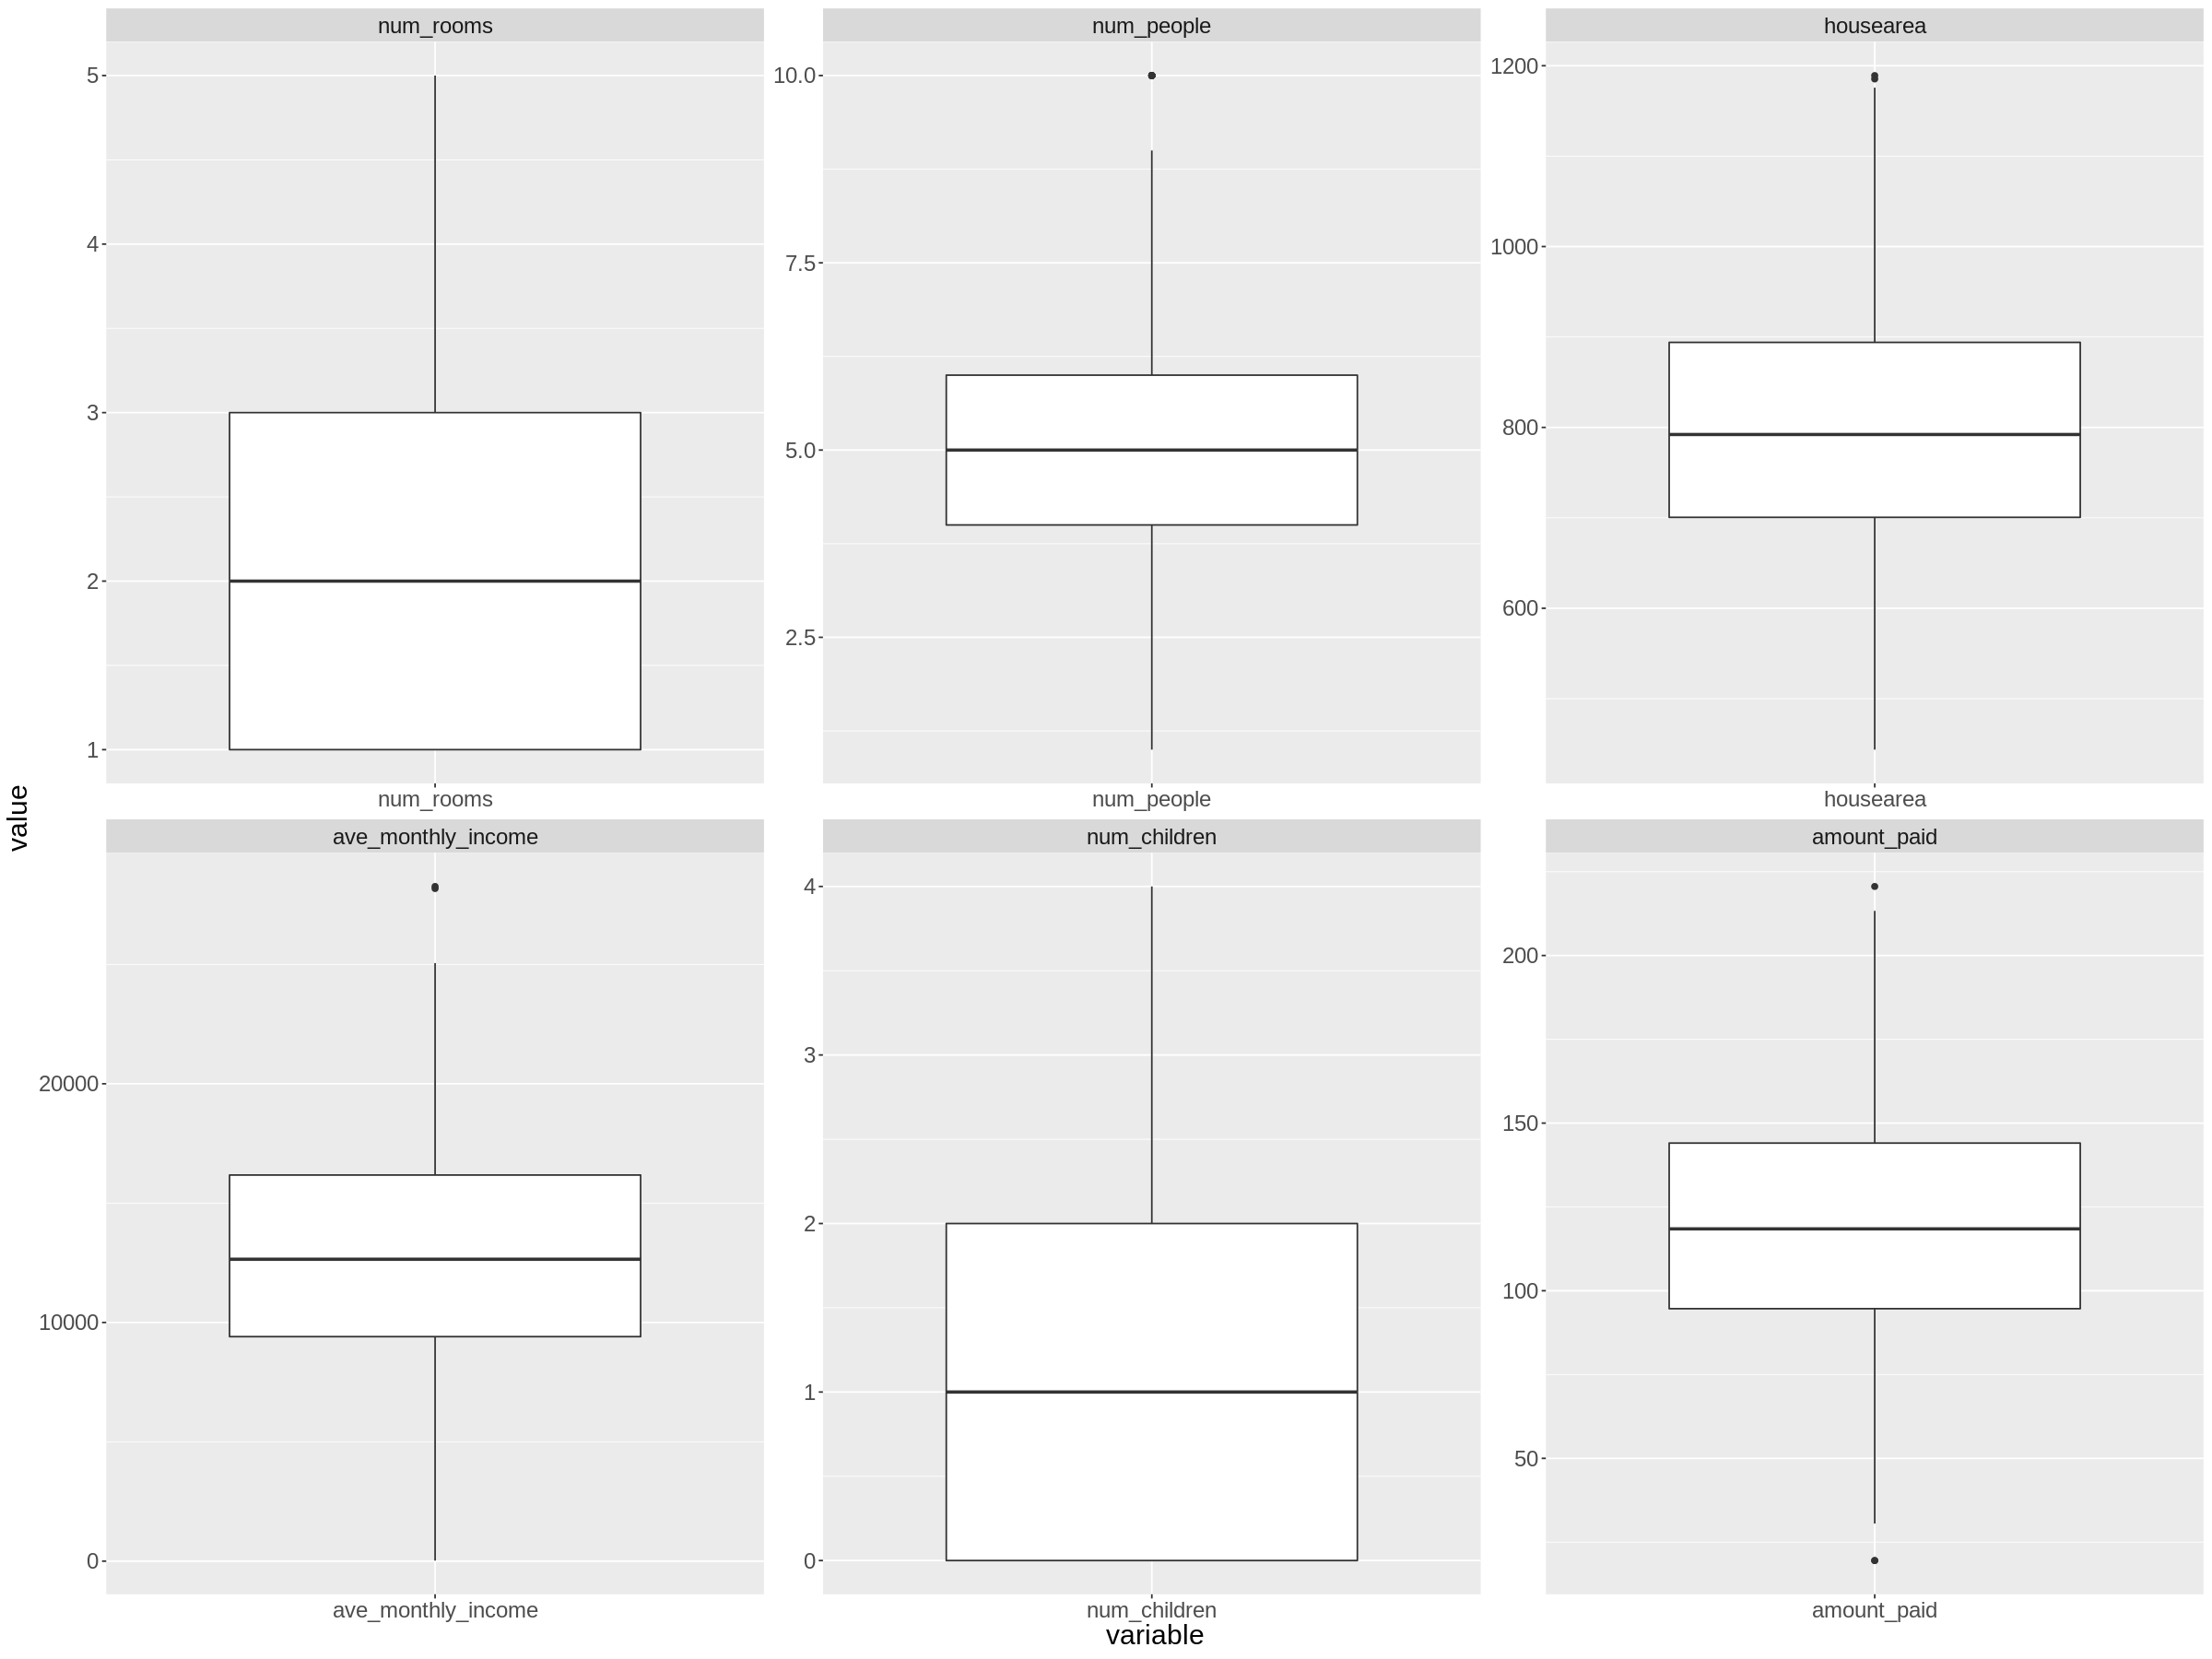

In [168]:
# Reshaping the dataframe for plotting
m1 <- melt(as.data.frame(df_train[c(-4,-5,-6,-9)]))

# Boxplots for the continuous and discrete variables
ggplot(m1,aes(x = variable,y = value)) +
  facet_wrap(~variable, scales="free") +
  geom_boxplot() +
  scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)}) +
  theme(text = element_text(size = 18))
fig(10,15)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



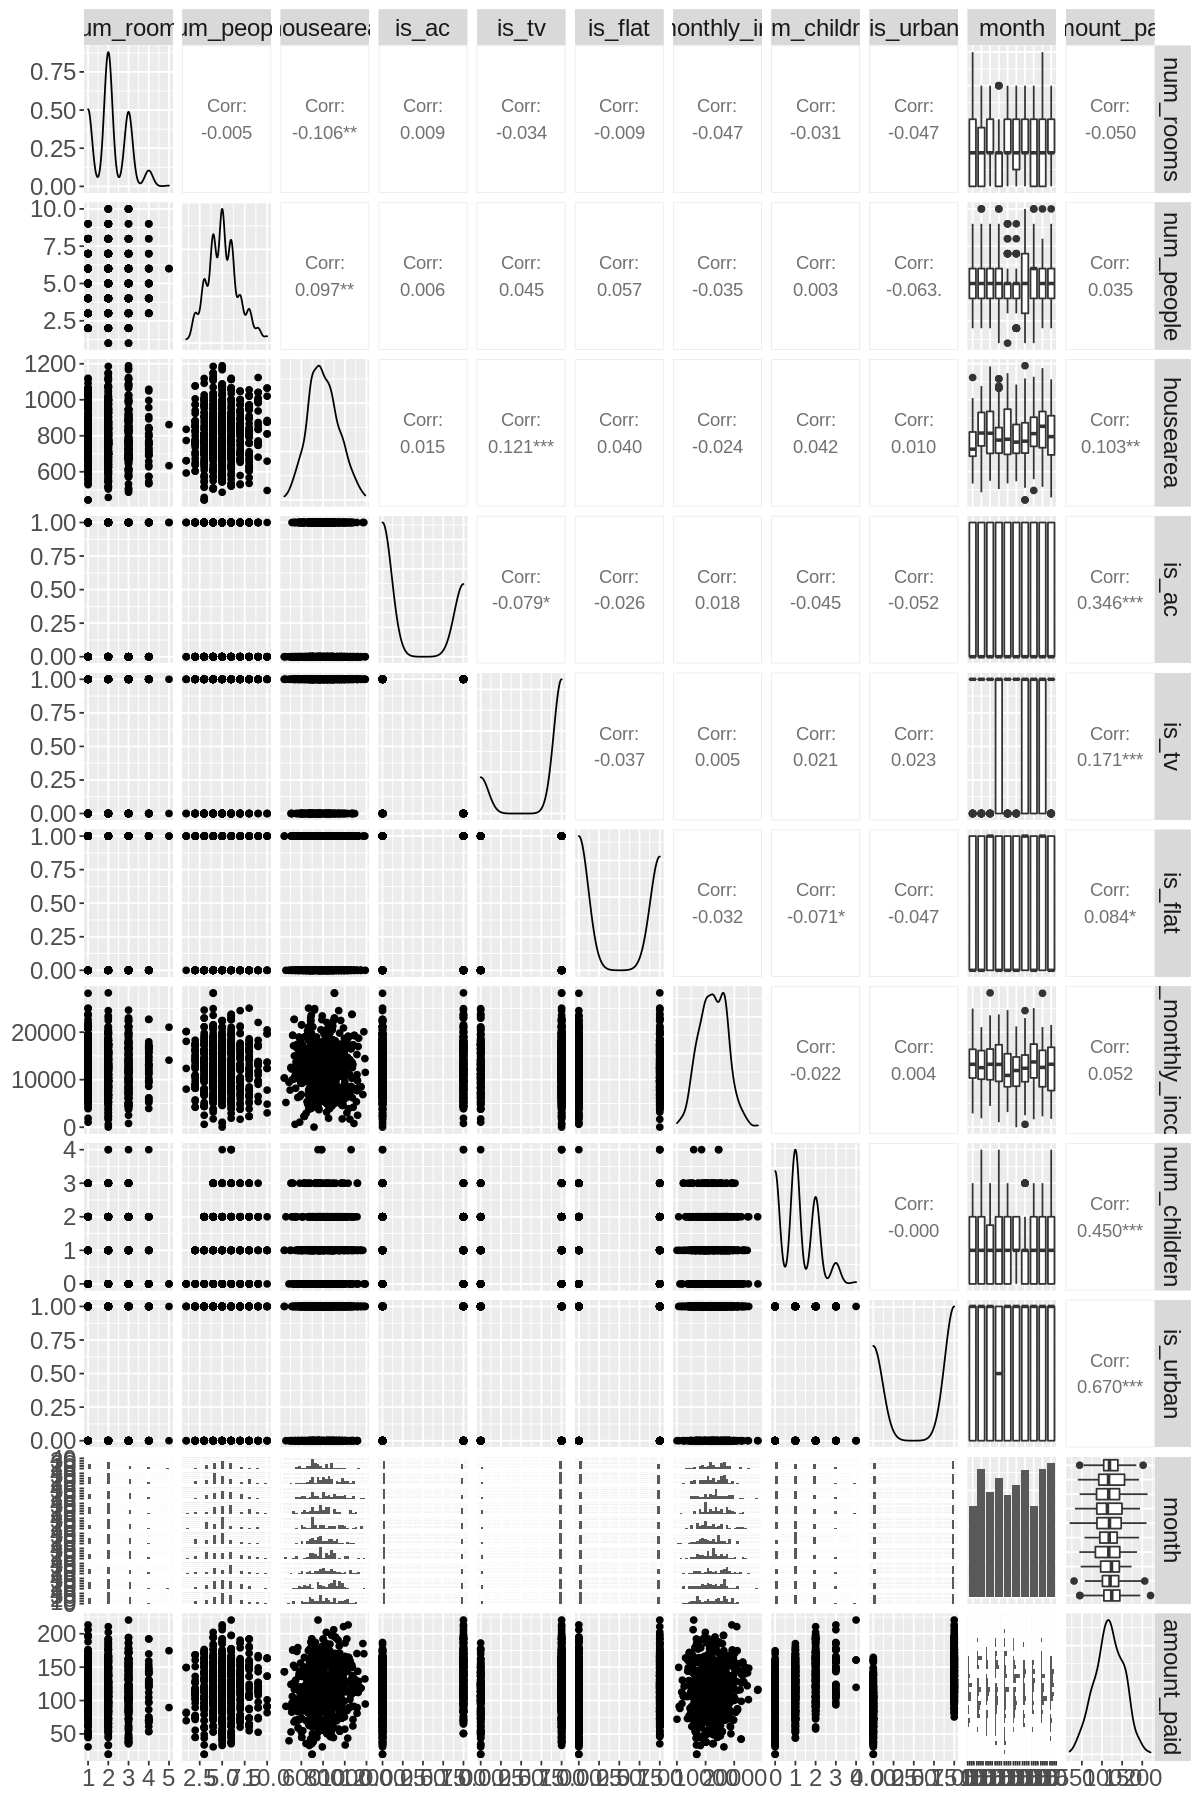

In [169]:
# Using the Pair plot for all the variables
ggpairs(df_train) +
  theme(text = element_text(size = 18))
fig(30,20)

#### __Observations from the Pair Plots:__

__1.__ From the above plot it is clear that the target variable 'Amount Paid' is normally distributed with the categorical variables like 'is_ac', 'is_tv', 'is_flat' & 'is_urban'. 

__2.__ The target variable 'amount_paid' is highly corrolated with 'is_urban',(0.67), 'num_children' (0.450), 'is_ac'(0.346), 'is_tv' (0.171) and 'housearea'(0.103) . This makes the predictor variables highly significant.

__3.__ Incidentally according to the above plots, the target variable 'amount_paid' has no/less correlation with predictors such as 'ave_monthly_income' (0.052) and 'num_rooms'(-0.050). The target variable 'amount_paid' has very low correlation with predictors such as 'num_people'(0.027).

#### __Inference:__

As the predictor variables 'num_people' and 'ave_monthly_income' has very less correlation with the target variable 'amount_paid', the influence of the outliers of the predictor variables has very less/no effect on the target variable. So the outlier data points need not be removed from the dataset.

In [170]:
# Checking the correlation between the variables leaving out the categorical variables
round(cor(df_train[c(-4,-5,-6,-9,-10)]),3)

,num_rooms,num_people,housearea,ave_monthly_income,num_children,amount_paid
num_rooms,1.000,-0.005,-0.106,-0.047,-0.031,-0.050
num_people,-0.005,1.000,0.097,-0.035,0.003,0.035
housearea,-0.106,0.097,1.000,-0.024,0.042,0.103
ave_monthly_income,-0.047,-0.035,-0.024,1.000,-0.022,0.052
num_children,-0.031,0.003,0.042,-0.022,1.000,0.450
amount_paid,-0.050,0.035,0.103,0.052,0.450,1.000


From the abovetable, it is very clear that most of the continuous and discrete variables have weak positive/negative corrolation with each other and with the target variable. Only 'num_children' and 'housearea' have a bit of higher corrolation coefficients compared to other variables.

#### Scatter plots with continuous and discrete variables

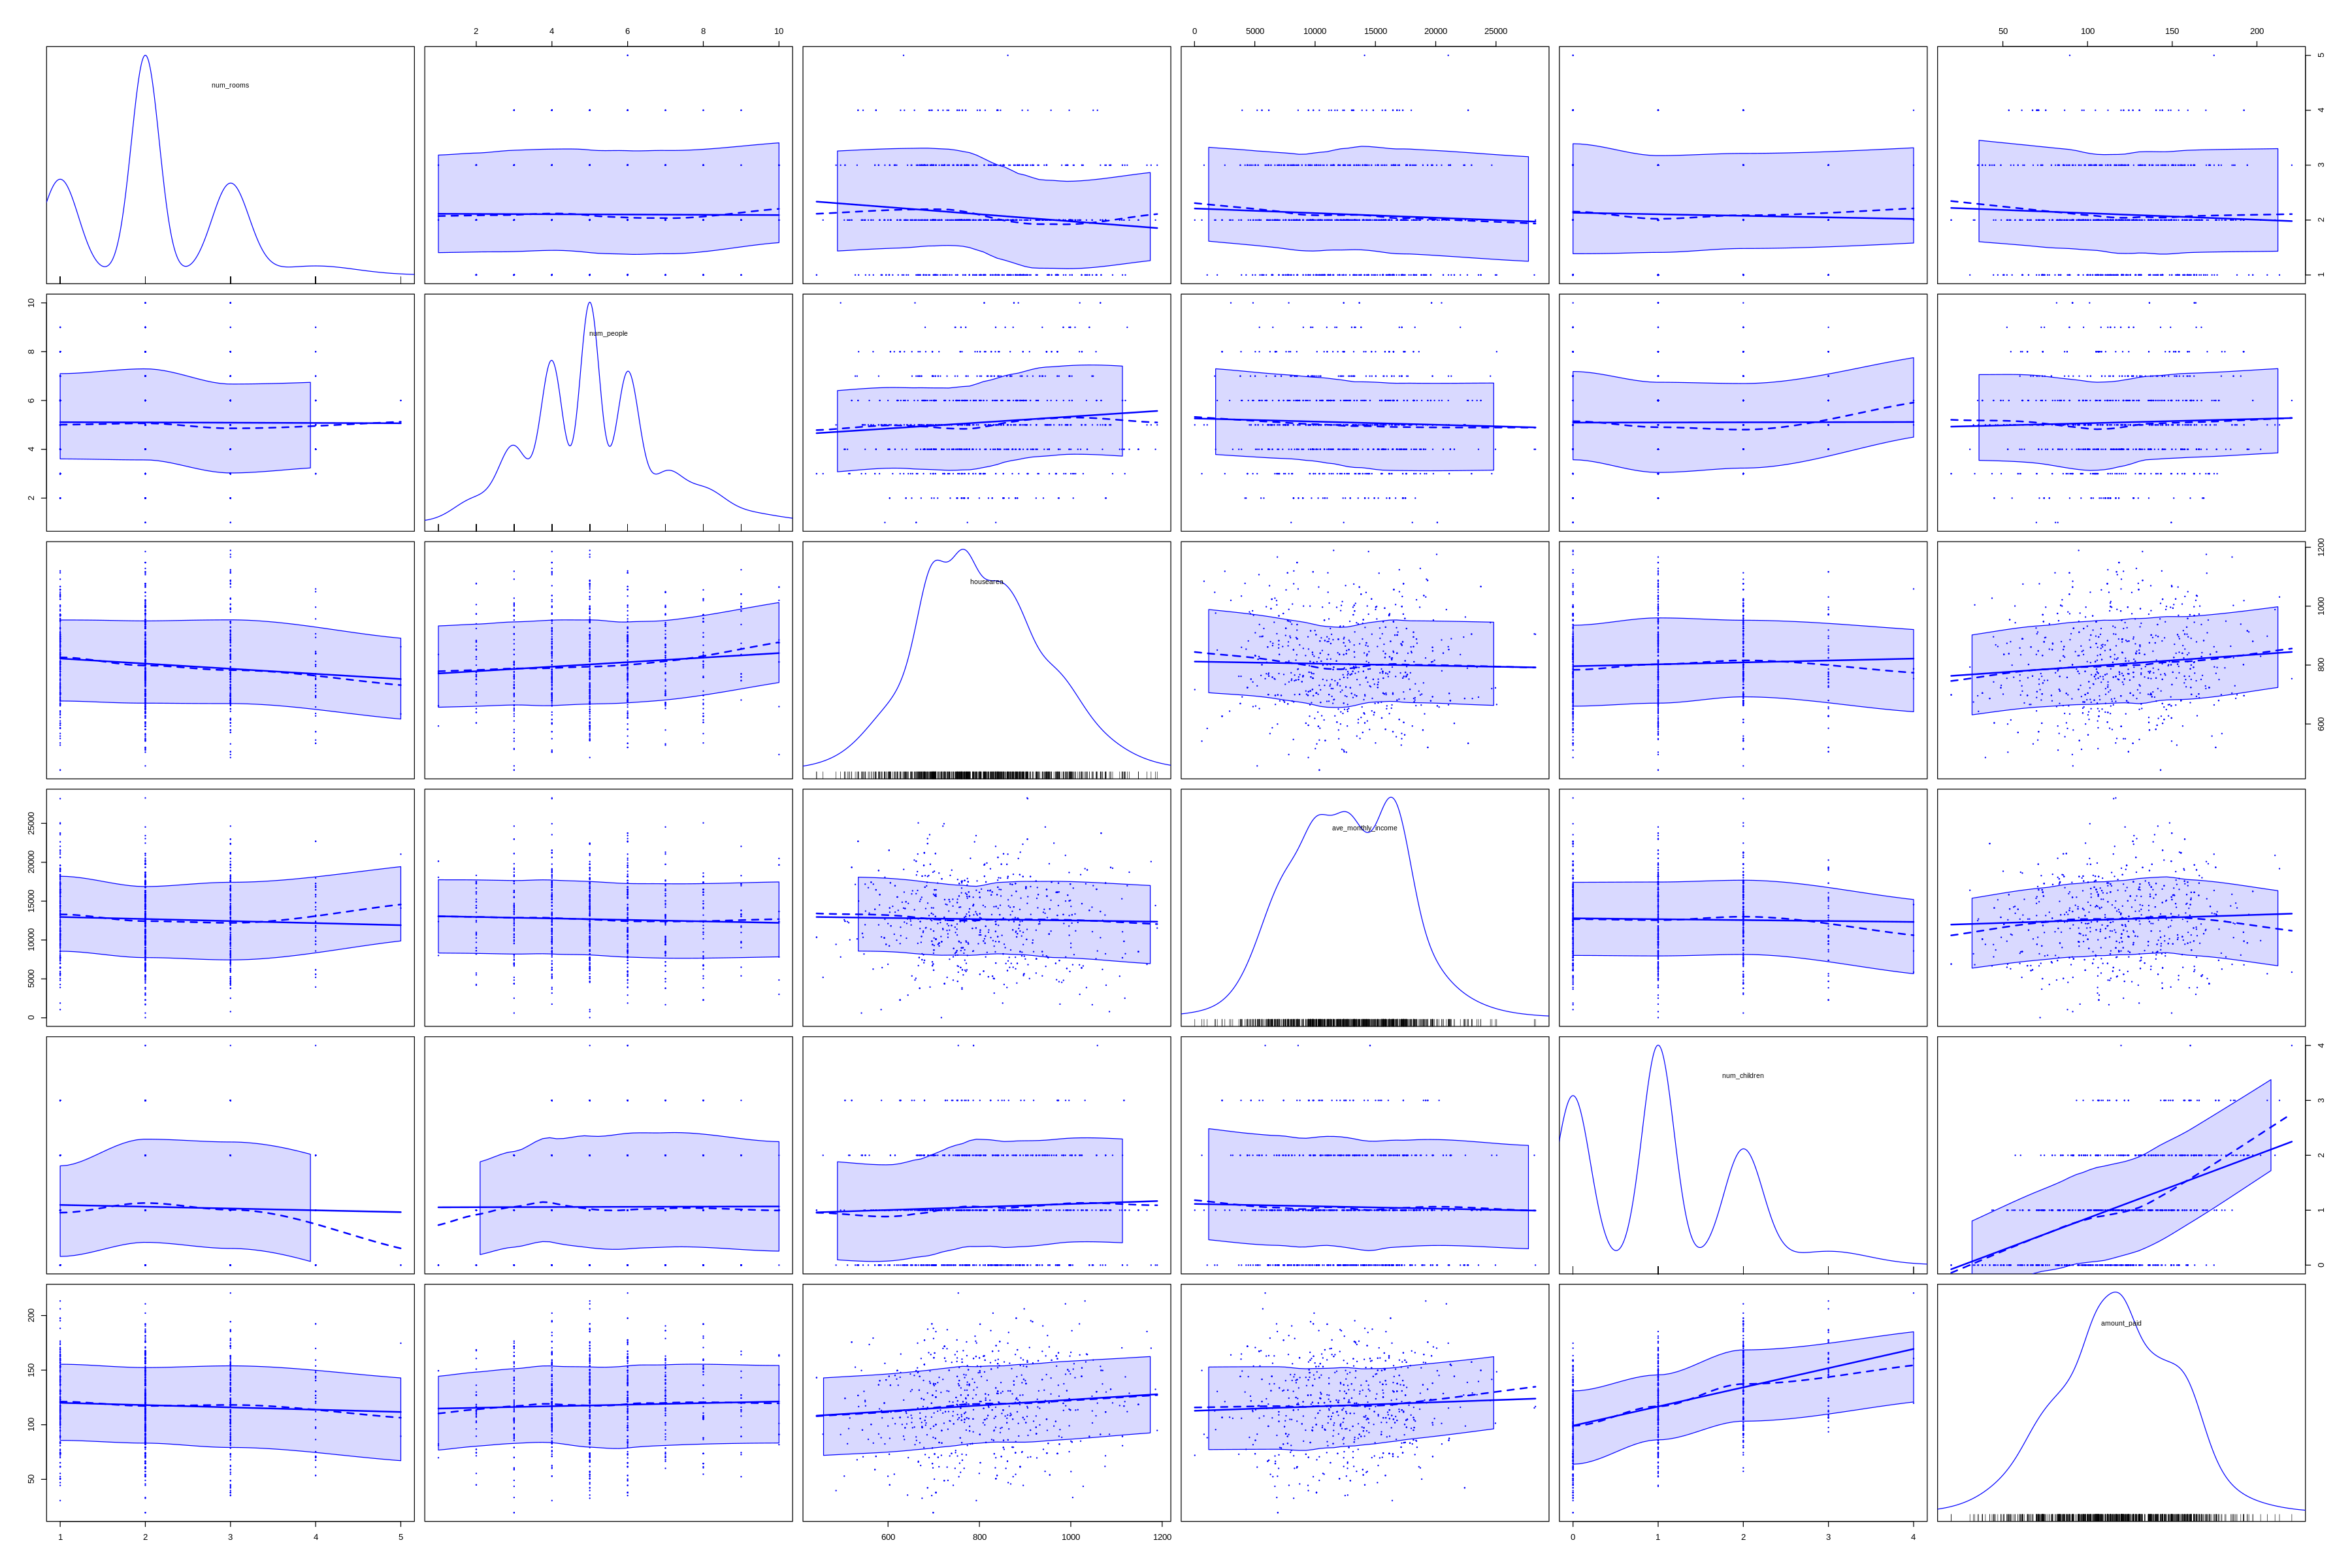

In [171]:
scatterplotMatrix(df_train[c(c(-4,-5,-6,-9,-10))],cex=0.2)
fig(20,15)

The above scatter plots proves that most of the continuous and discrete values have weak corrolation with each other and also with the target variable. As identified before, the variables 'num_children' and 'housearea' have a positive corrolation with the target variable 'amount_paid'.

#### Continuous and Discrete Variables vs. Categorical Variables

4 Variables - is_ac, is_tv, is_flat, is_urban need to convert from numeric to string for easy analysis.

In [172]:
# Changing the categorical values from Double to String in the training dataset
df_train$is_ac <- ifelse(df_train$is_ac == 1, 'Yes', 'No')
df_train$is_tv <- ifelse(df_train$is_tv == 1, 'Yes', 'No')
df_train$is_flat <- ifelse(df_train$is_flat == 1, 'Yes', 'No')
df_train$is_urban <- ifelse(df_train$is_urban == 1, 'Yes', 'No')

# Changing the categorical values from Double to String in the testing dataset
df_test_data$is_ac <- ifelse(df_test_data$is_ac == 1, 'Yes', 'No')
df_test_data$is_tv <- ifelse(df_test_data$is_tv == 1, 'Yes', 'No')
df_test_data$is_flat <- ifelse(df_test_data$is_flat == 1, 'Yes', 'No')
df_test_data$is_urban <- ifelse(df_test_data$is_urban == 1, 'Yes', 'No')

#### is_tv vs. variables

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



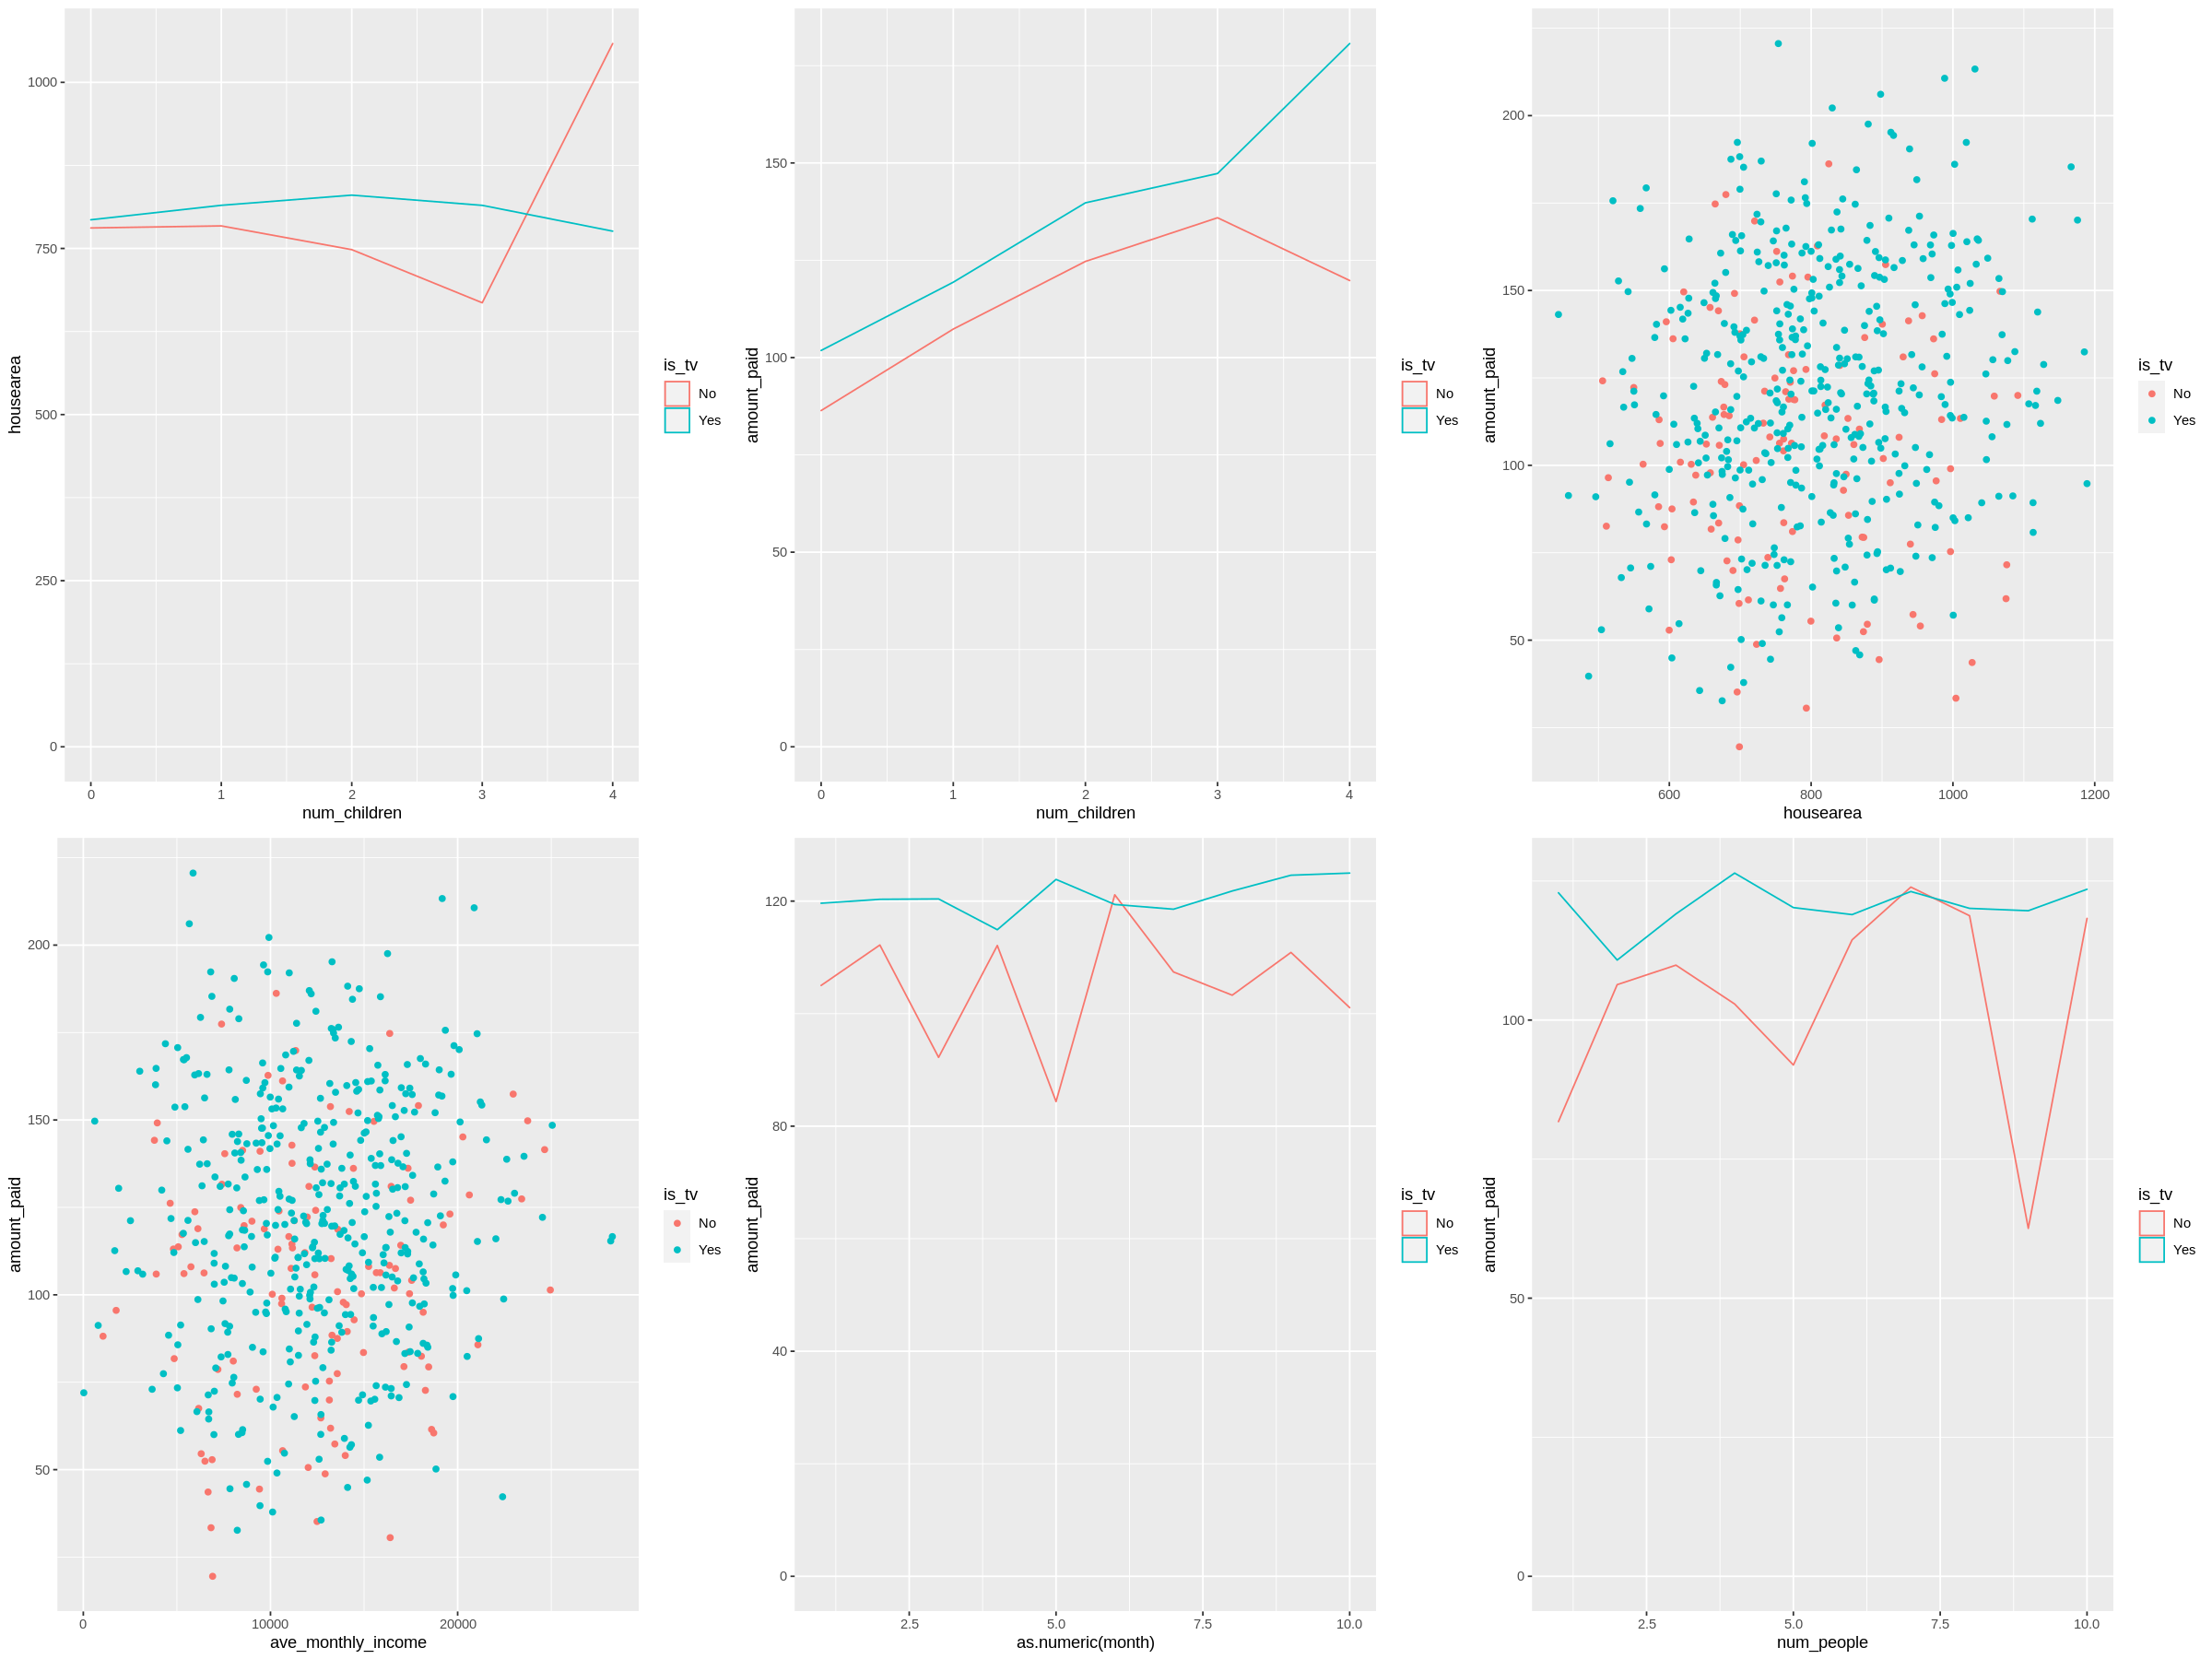

In [173]:
a1<-ggplot(aes(x=num_children,y=housearea), data = df_train) +
    geom_density(aes(color=is_tv),stat='summary',fun.y=median)
 
a2<-ggplot(aes(x=num_children,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_tv),stat='summary',fun.y=median)
  
a3<-ggplot(aes(x=housearea,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_tv),stat='summary',fun.y=median)

a4<-ggplot(aes(x=ave_monthly_income,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_tv),stat='summary',fun.y=median)

a5<-ggplot(aes(x=as.numeric(month),y=amount_paid), data = df_train) +
    geom_density(aes(color=is_tv),stat='summary',fun.y=median)

a6<-ggplot(aes(x=num_people,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_tv),stat='summary',fun.y=median)

grid.arrange(a1,a2,a3,a4,a5,a6,ncol=3)

__Observations from the above plot:__

__1.__ There are TVs present in household which have larger the house area which also increases the utlity bill.

__2.__ Higher the number of children in the household, more is the utlily bills.

__3.__ When number of the children is 4, the house area is also high when there is no tv in the household.

__4.__ The TVs in the household does not depend on the average monthly income of the household as there is no corrolation between these 2 predictors. 

#### is_ac vs. variables

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



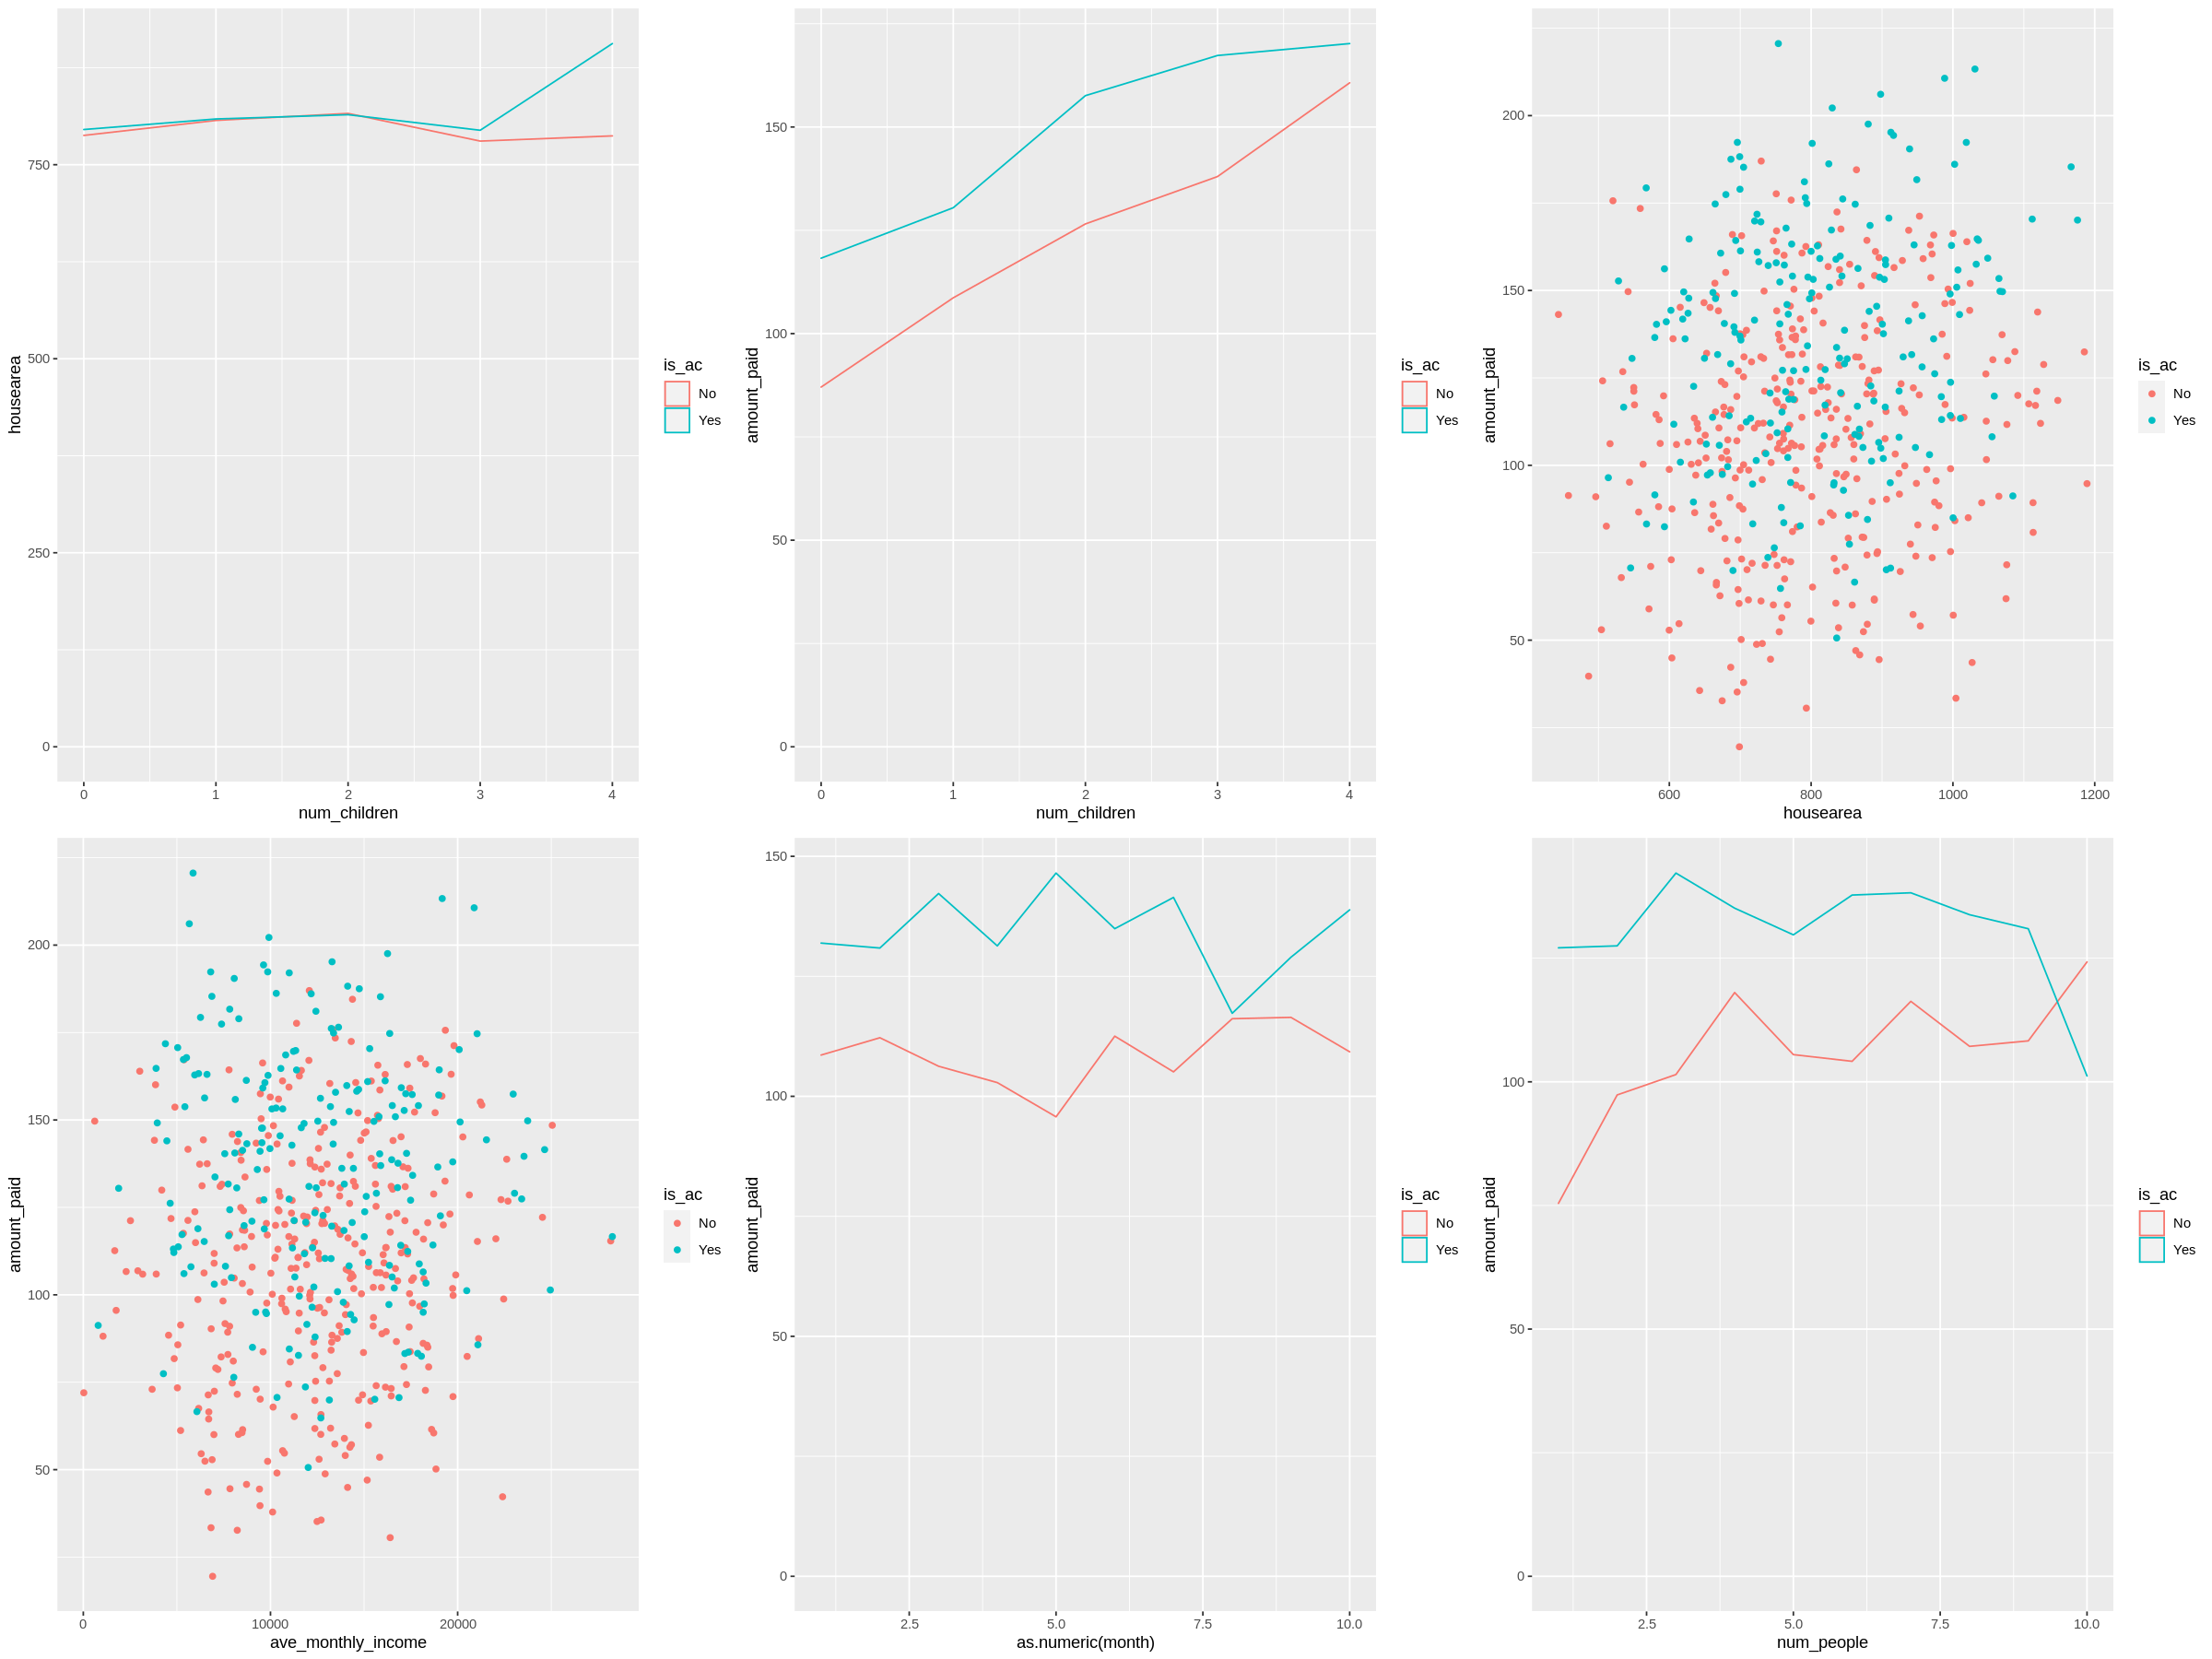

In [174]:
a1<-ggplot(aes(x=num_children,y=housearea), data = df_train) +
    geom_density(aes(color=is_ac),stat='summary',fun.y=median)
 
a2<-ggplot(aes(x=num_children,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_ac),stat='summary',fun.y=median)
  
a3<-ggplot(aes(x=housearea,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_ac),stat='summary',fun.y=median)

a4<-ggplot(aes(x=ave_monthly_income,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_ac),stat='summary',fun.y=median)

a5<-ggplot(aes(x=as.numeric(month),y=amount_paid), data = df_train) +
    geom_density(aes(color=is_ac),stat='summary',fun.y=median)

a6<-ggplot(aes(x=num_people,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_ac),stat='summary',fun.y=median)

grid.arrange(a1,a2,a3,a4,a5,a6,ncol=3)

__Observations from the above plots:__

__1.__ The household with AC pay higher utility bills than the household with no AC.

__2.__ Higher the number of children in the household, more is the utlily bills.

__3.__ The ACs in the household does not depend on the average monthly income of the household as there is no corrolation between these 2 predictor variables.

#### is_flat vs Variables

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



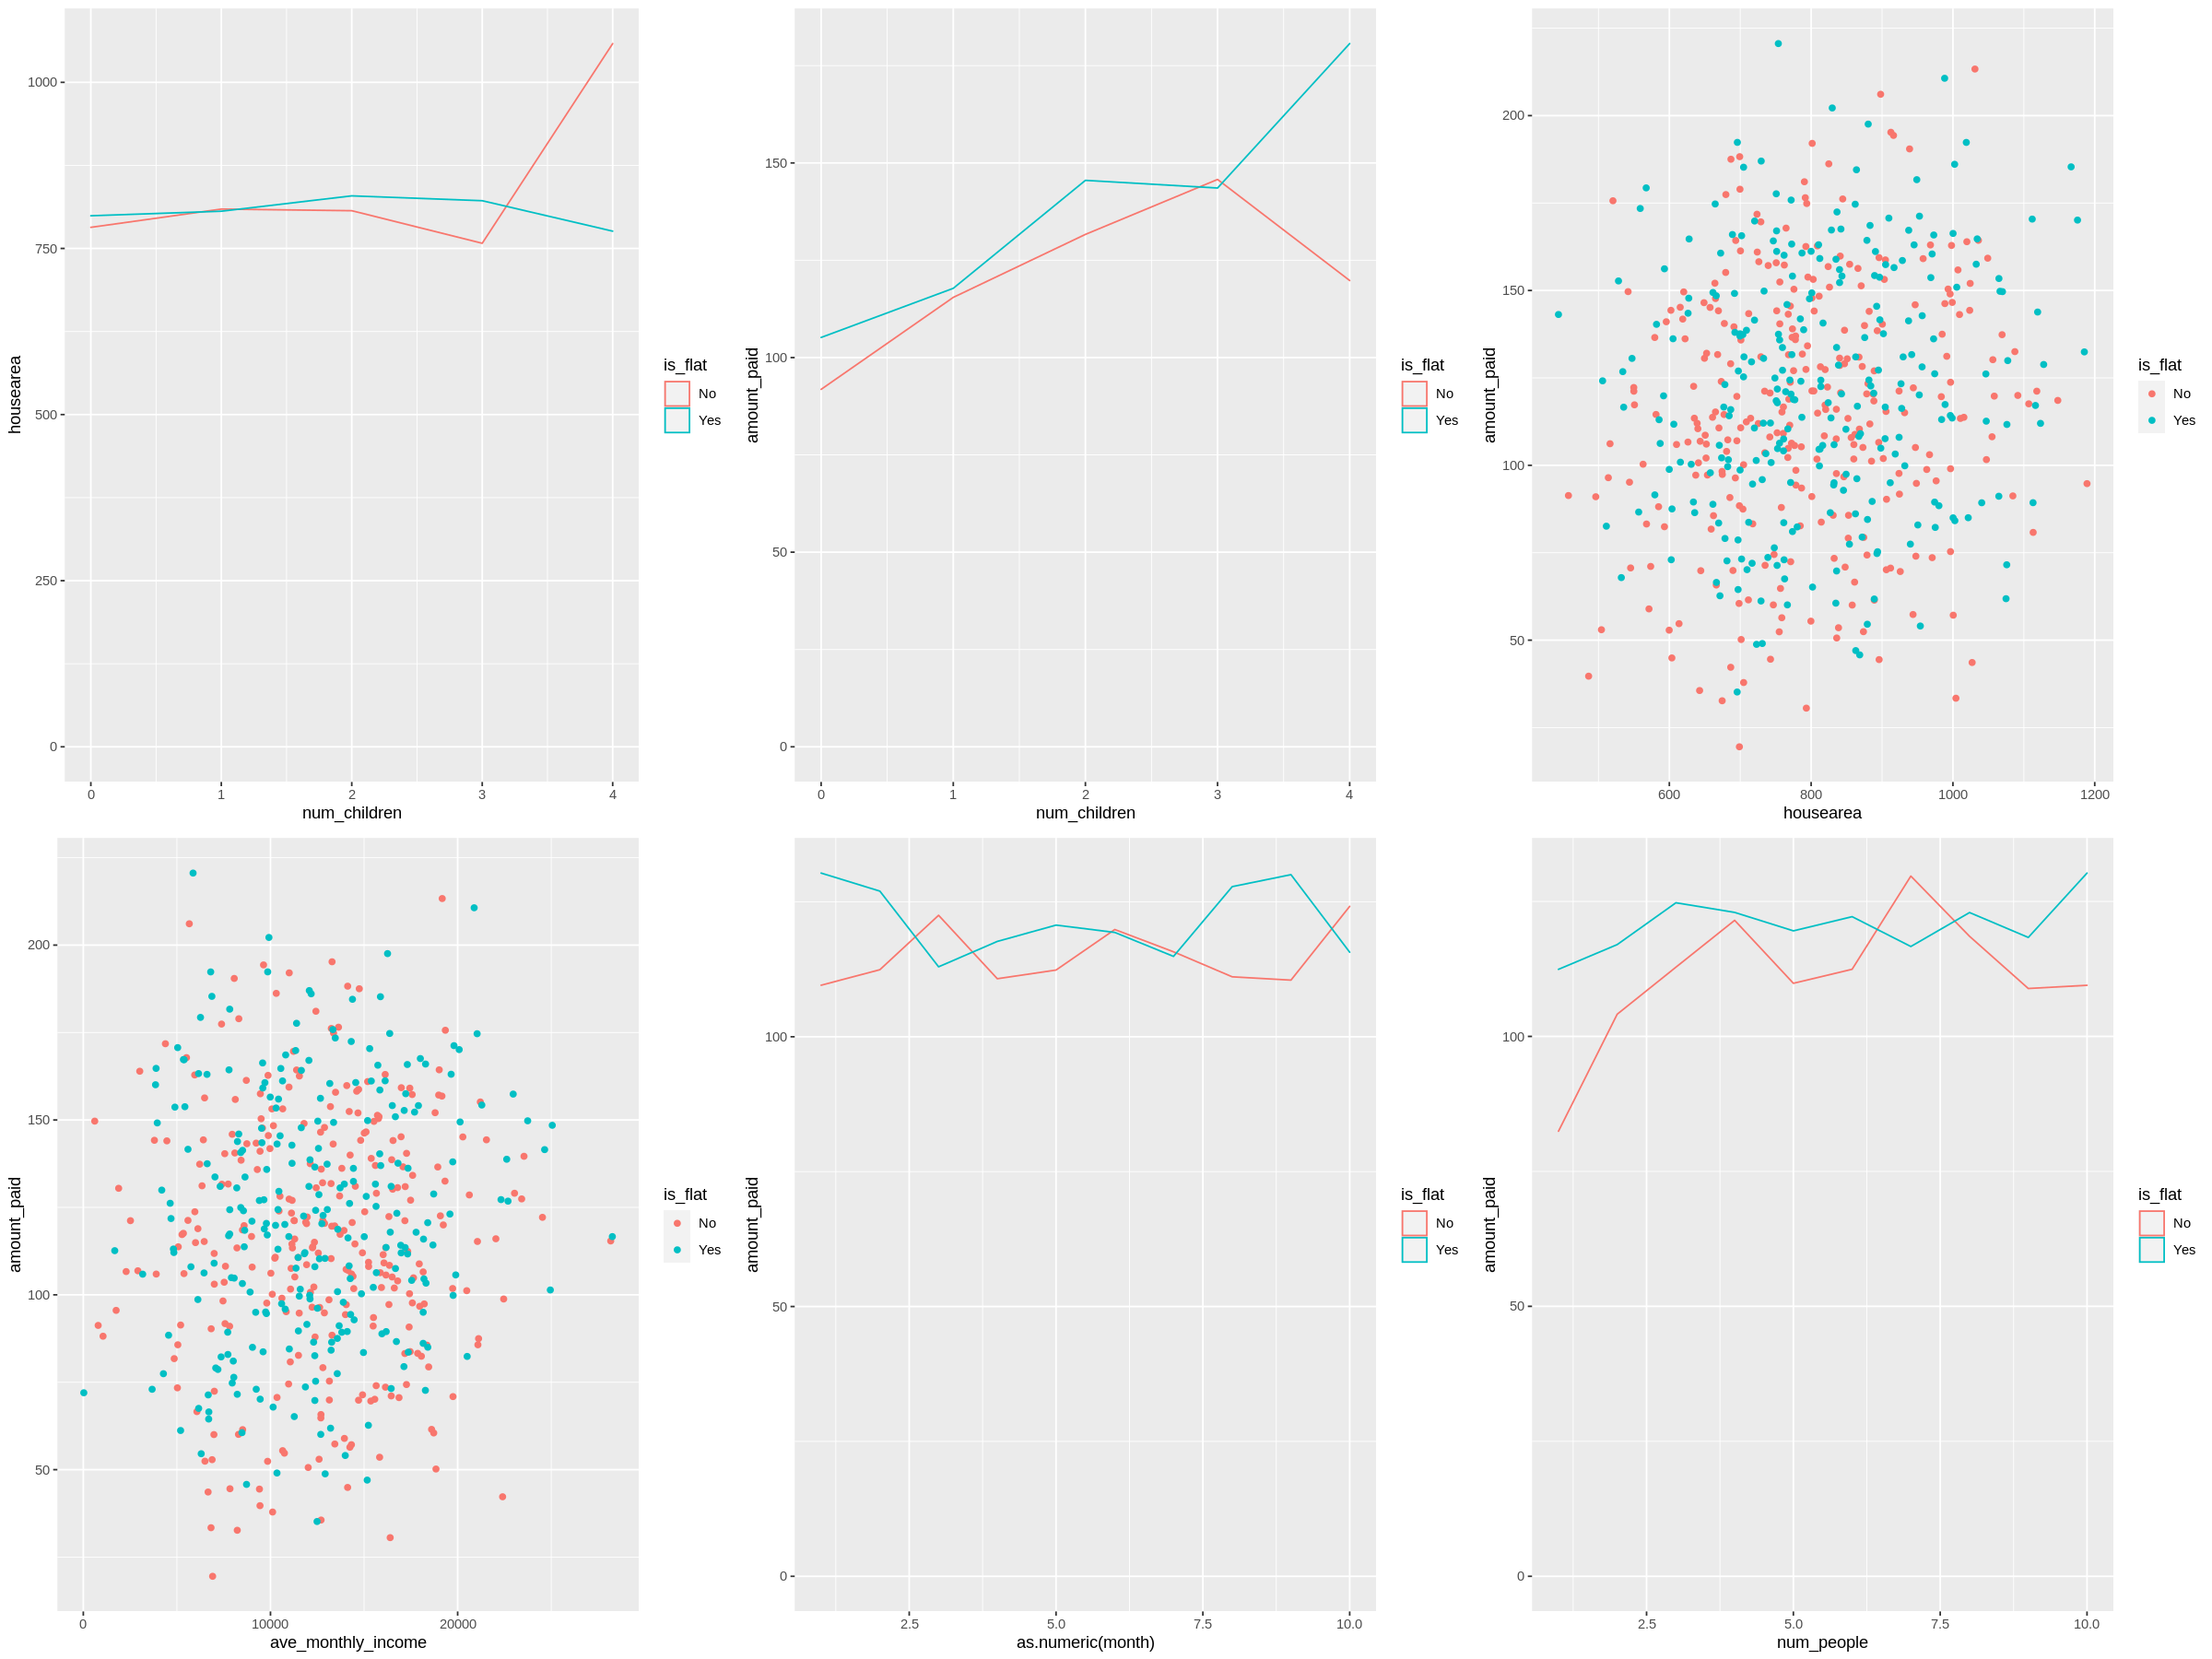

In [175]:
a1<-ggplot(aes(x=num_children,y=housearea), data = df_train) +
    geom_density(aes(color=is_flat),stat='summary',fun.y=median)
 
a2<-ggplot(aes(x=num_children,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_flat),stat='summary',fun.y=median)
  
a3<-ggplot(aes(x=housearea,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_flat),stat='summary',fun.y=median)

a4<-ggplot(aes(x=ave_monthly_income,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_flat),stat='summary',fun.y=median)

a5<-ggplot(aes(x=as.numeric(month),y=amount_paid), data = df_train) +
    geom_density(aes(color=is_flat),stat='summary',fun.y=median)

a6<-ggplot(aes(x=num_people,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_flat),stat='summary',fun.y=median)

grid.arrange(a1,a2,a3,a4,a5,a6,ncol=3)

__Observations from the above plot:__

__1.__ From all the plots above, one thing that is clear is that the predictor 'is_flat' has no corrolation with any of the other predictors like 'amount_paid', 'month', 'average_monthly_income', 'num_people', 'num_children' and 'housearea'.

#### is_urban vs variables

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



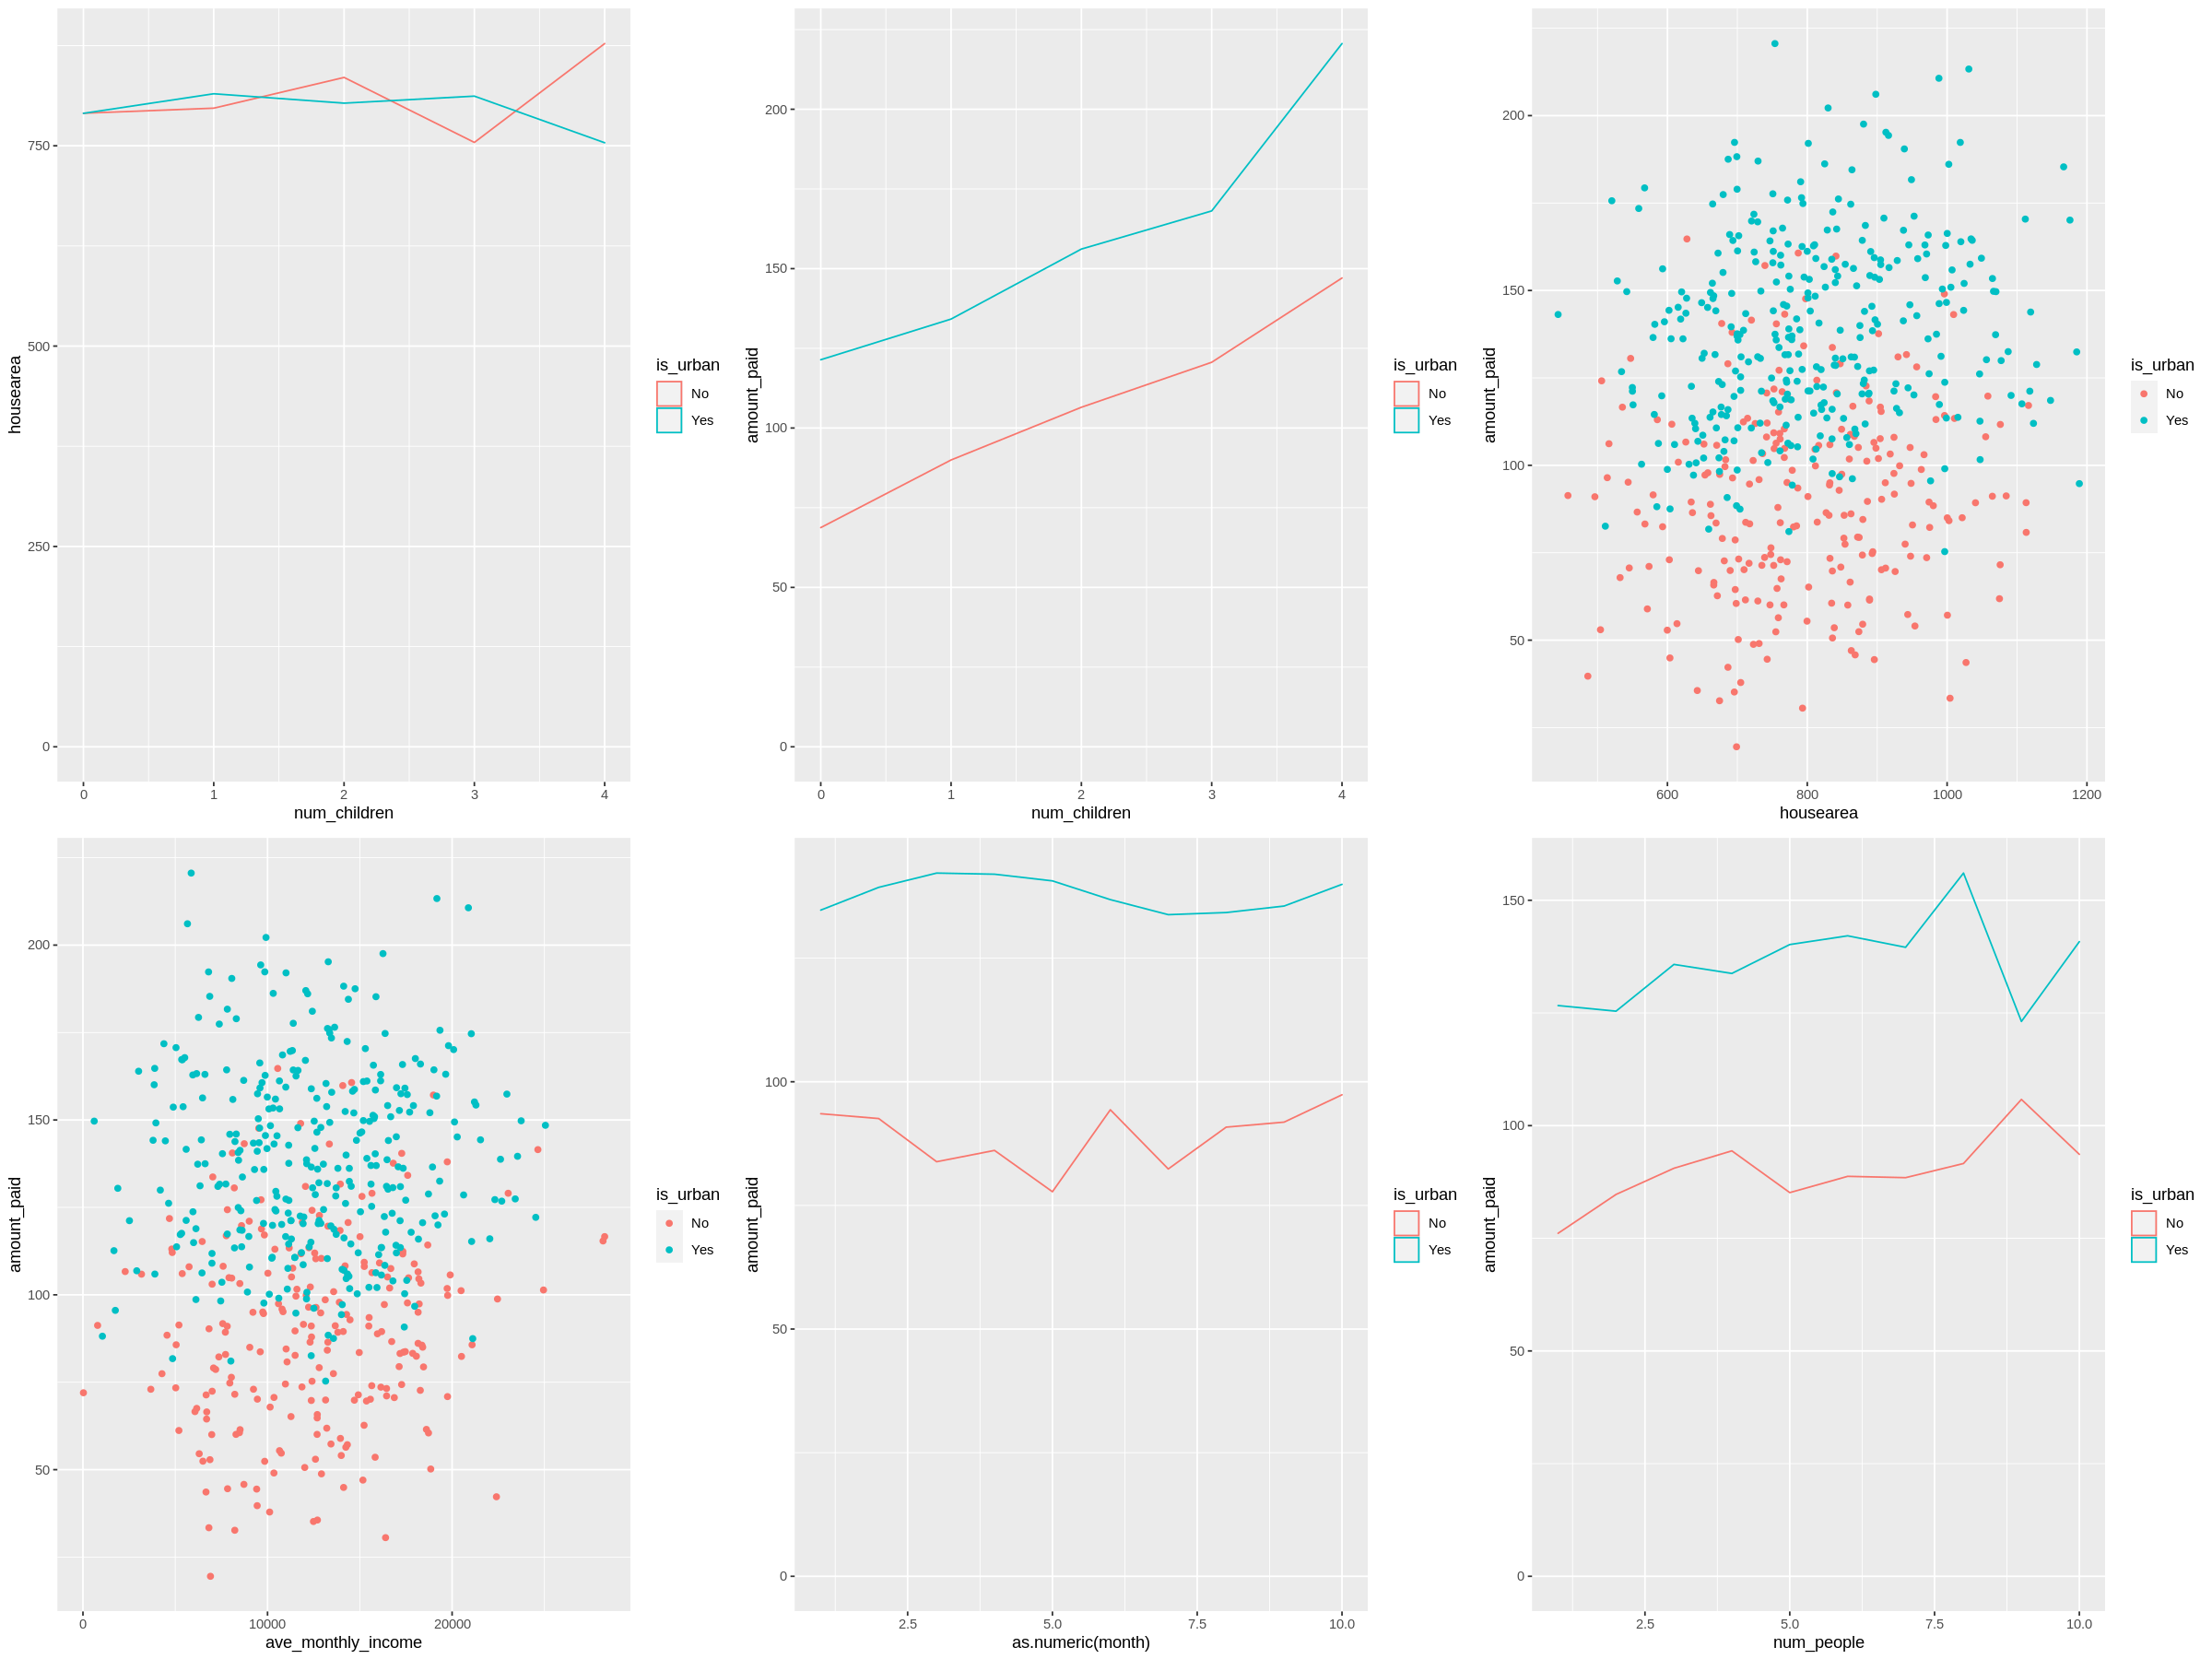

In [176]:
a1<-ggplot(aes(x=num_children,y=housearea), data = df_train) +
    geom_density(aes(color=is_urban),stat='summary',fun.y=median)
 
a2<-ggplot(aes(x=num_children,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_urban),stat='summary',fun.y=median)
  
a3<-ggplot(aes(x=housearea,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_urban),stat='summary',fun.y=median)

a4<-ggplot(aes(x=ave_monthly_income,y=amount_paid), data = df_train) +
    geom_jitter(aes(color=is_urban),stat='summary',fun.y=median)

a5<-ggplot(aes(x=as.numeric(month),y=amount_paid), data = df_train) +
    geom_density(aes(color=is_urban),stat='summary',fun.y=median)

a6<-ggplot(aes(x=num_people,y=amount_paid), data = df_train) +
    geom_density(aes(color=is_urban),stat='summary',fun.y=median)

grid.arrange(a1,a2,a3,a4,a5,a6,ncol=3)

__Observations from the above plots:__

__1.__ There is a clear distinction 'amount_paid' is directly proportional to num_children in an urban or country-side. 

__2.__ 'amount_paid' vs 'housearea' plot shows that the amount paid is higher for a house property in the urban area as compared to house property with similar area on the country-side.

__3.__ 'amount_paid' vs 'ave_monthly_income' plot shows that the amount paid is higher for a average household monthly income in the urban area as compared to average household monthly income with similar income on the country-side.

__4.__ 'amount_paid' is always higher in the urban area compared to the country-side regardless for the number of people. In the country-side, the amount paid increases in the 1st month, then reduces and then peaks again in June for the winter.

__Inference:__

__1.__ The number of children in the household is directly proportional to the increased utlities bills in the household.

__2.__ The amount paid for the utlities are always higher in the urban area than the country-side.

### Categorical Variables

#### 'is_tv' - Whether the household have TV or more


    No    Yes 
64.875 35.125 

,No,Yes
No,57.64706,66.8254
Yes,42.35294,33.1746


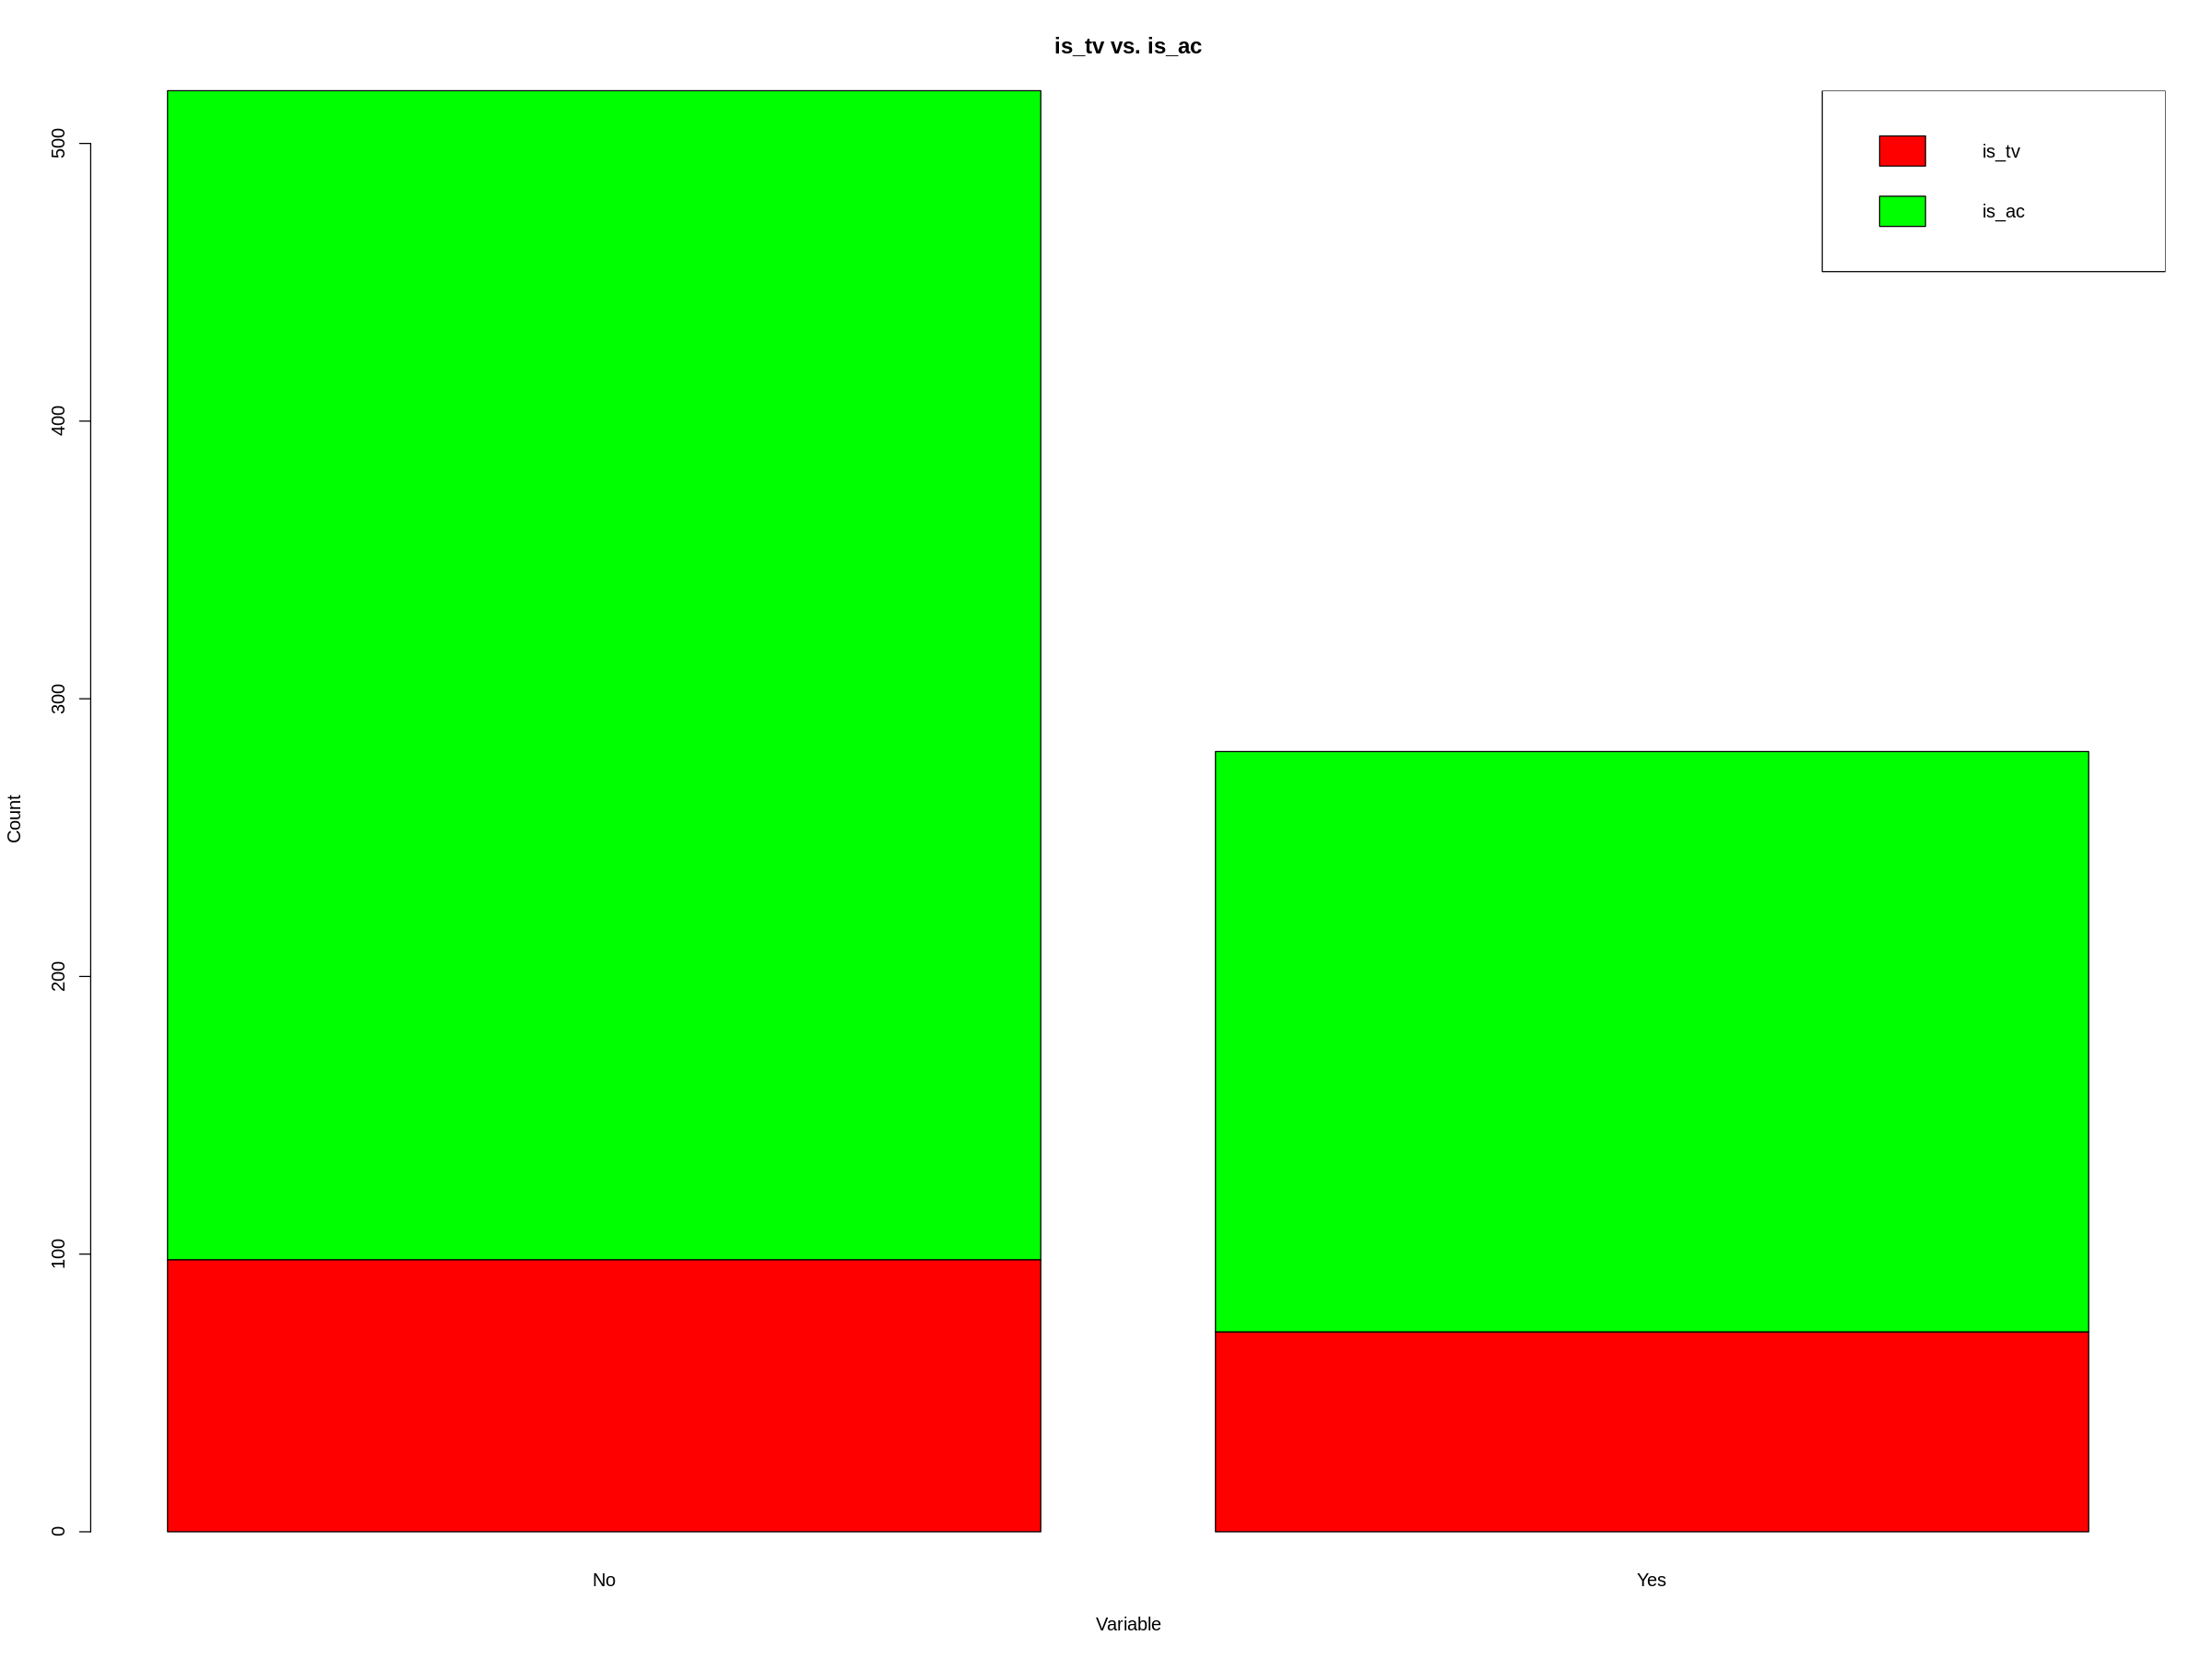

In [177]:
# Calculating the percentages of 'is_ac' & 'is_tv' to plot
table(df_train$is_ac)/nrow(df_train)*100
a <- table(df_train[,c('is_tv','is_ac')])
apply(a, 1, function(x) x/sum(x) * 100)

# Plotting
barplot(a, main='is_tv vs. is_ac', xlab='Variable', ylab='Count', col = c('red','green'))
legend('topright', c('is_tv','is_ac'), fill = c("red","green"))

__Observation from the plot:__

__1.__ Majority of the households neither have TV nor AC.

__2.__ Very less households have both TVs and ACs.



   No   Yes 
21.25 78.75 

,No,Yes
No,50.58824,55.07937
Yes,49.41176,44.92063


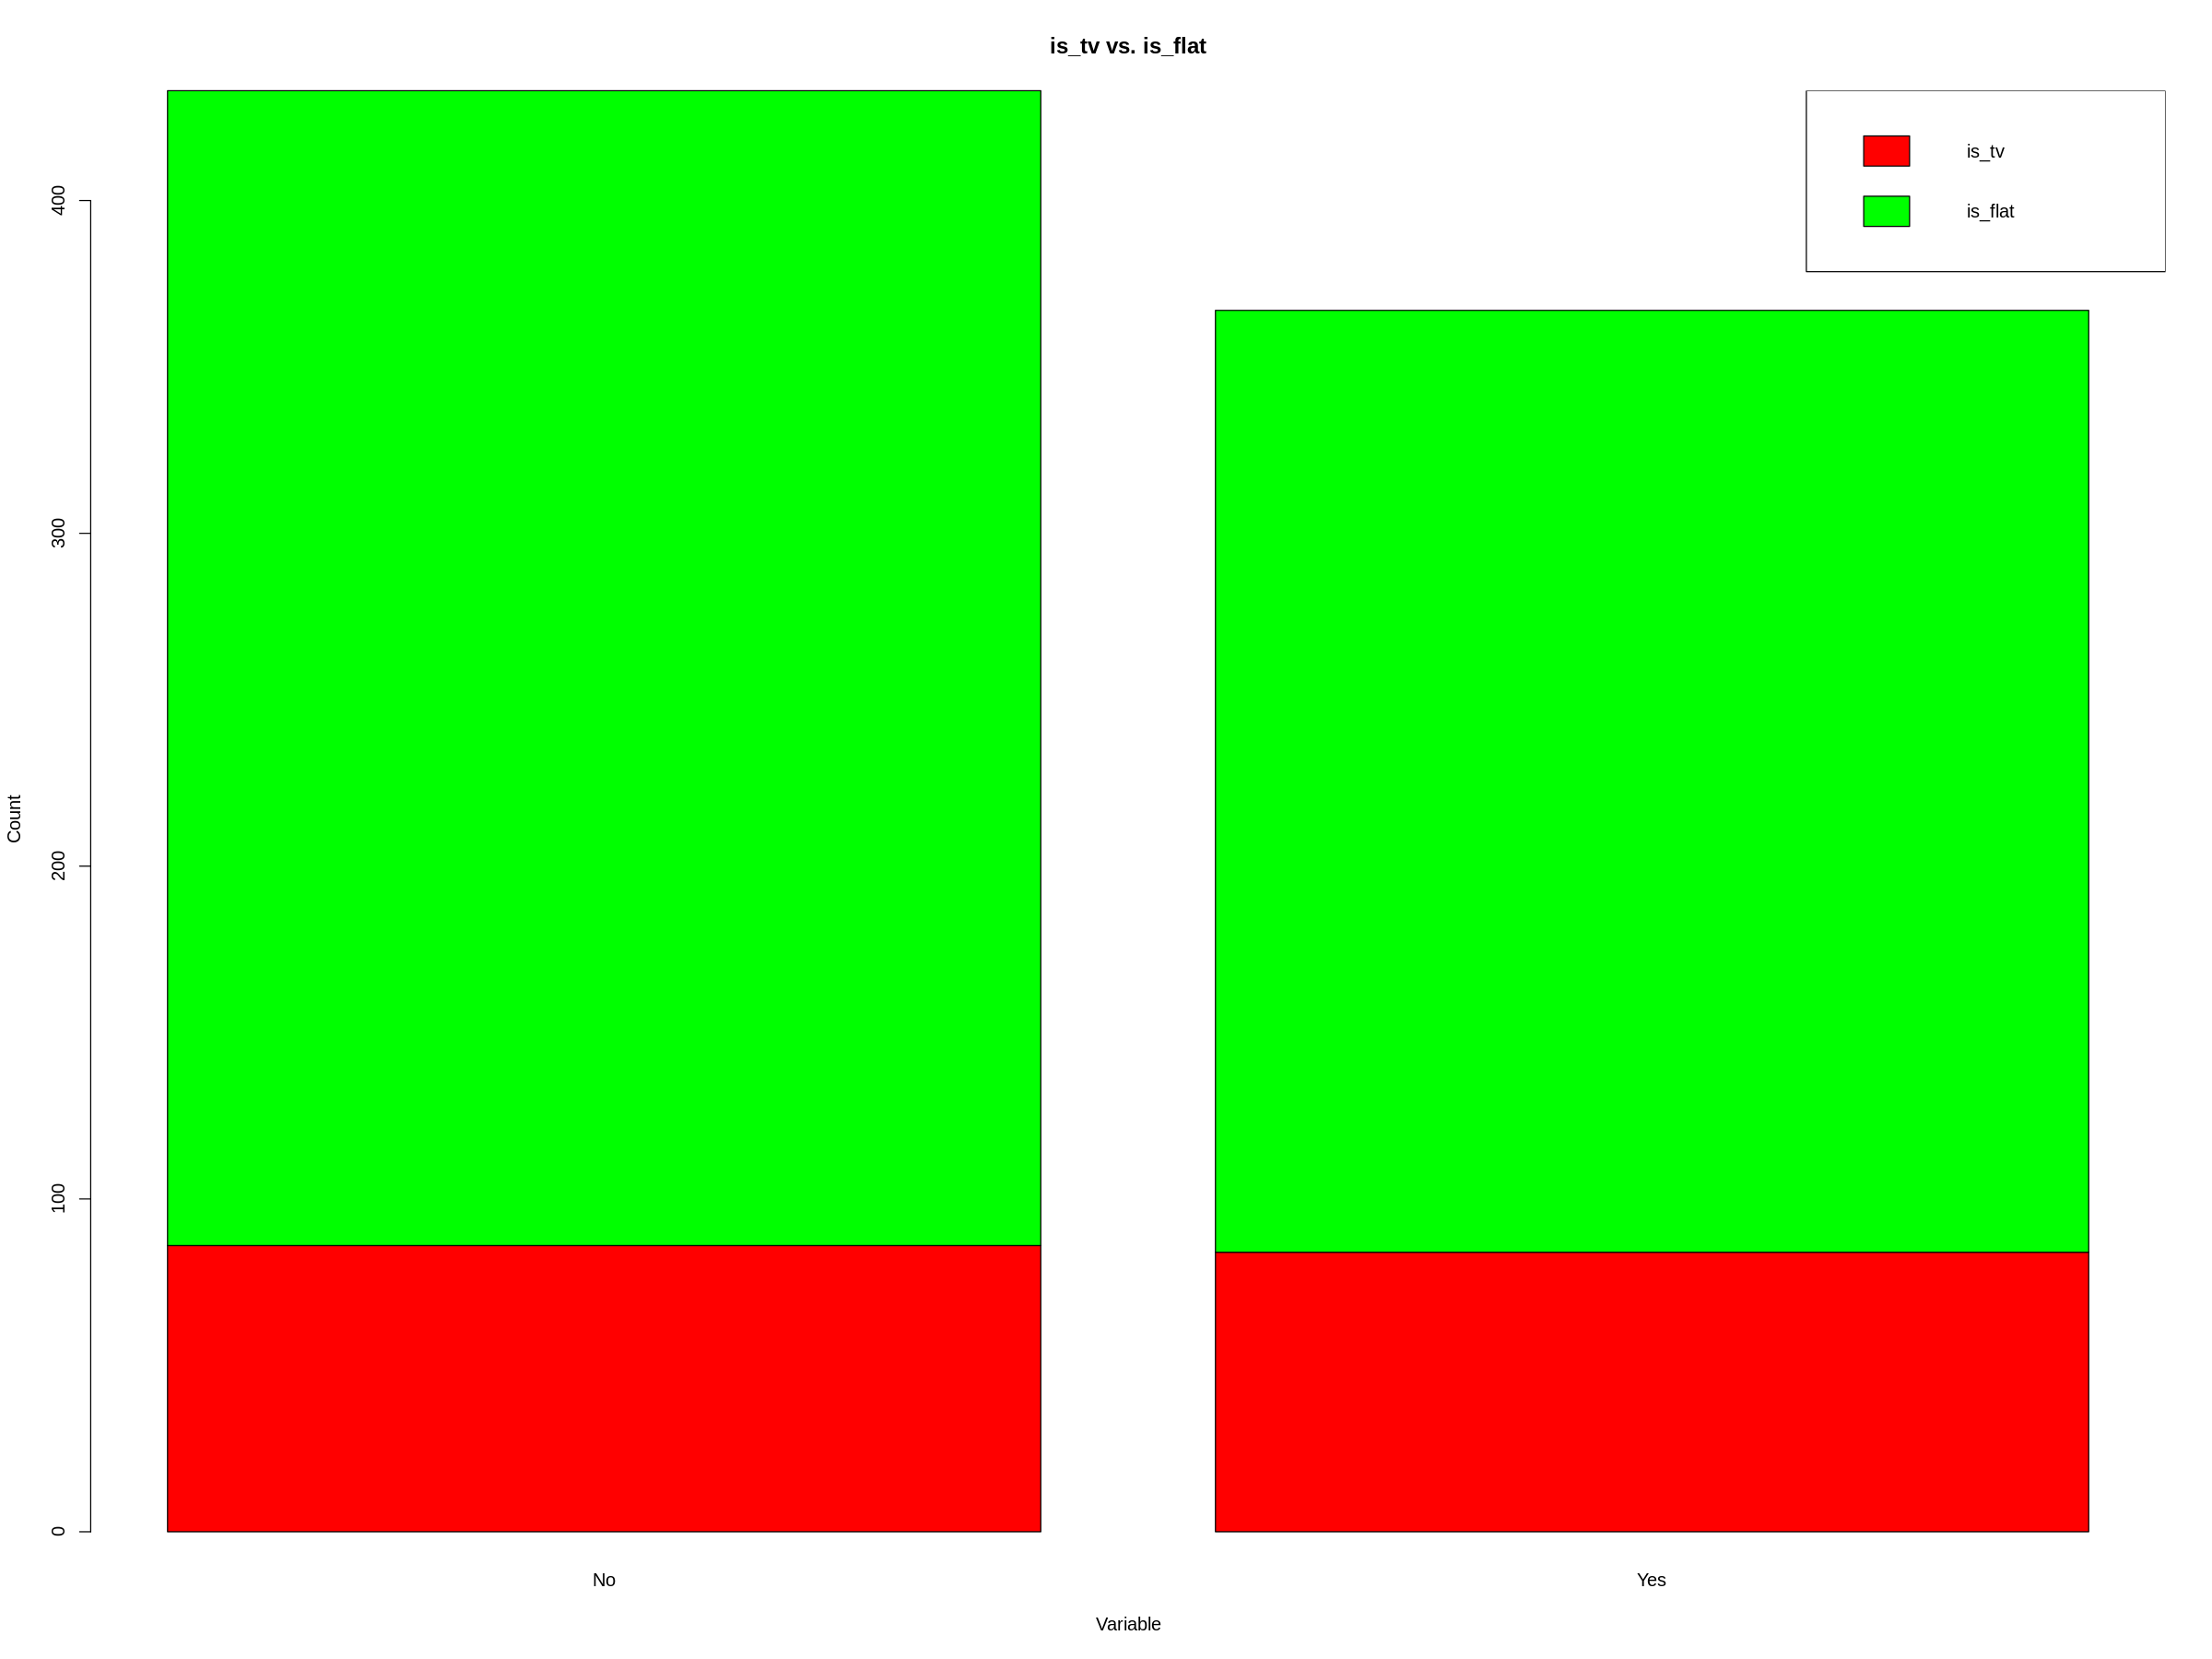

In [178]:
# Calculating the percentages of 'is_flat' & 'is_tv' to plot
table(df_train$is_tv)/nrow(df_train)*100
a <- table(df_train[,c('is_tv','is_flat')])
apply(a, 1, function(x) x/sum(x) * 100)

# Plotting
barplot(a, main='is_tv vs. is_flat', xlab='Variable', ylab='Count', col = c('red','green'))
legend('topright', c('is_tv','is_flat'), fill = c("red","green"))

__Observation from the plot:__

__1.__ Majority of the households are not flats and do not have TVs.



   No   Yes 
21.25 78.75 

,No,Yes
No,43.52941,40.79365
Yes,56.47059,59.20635


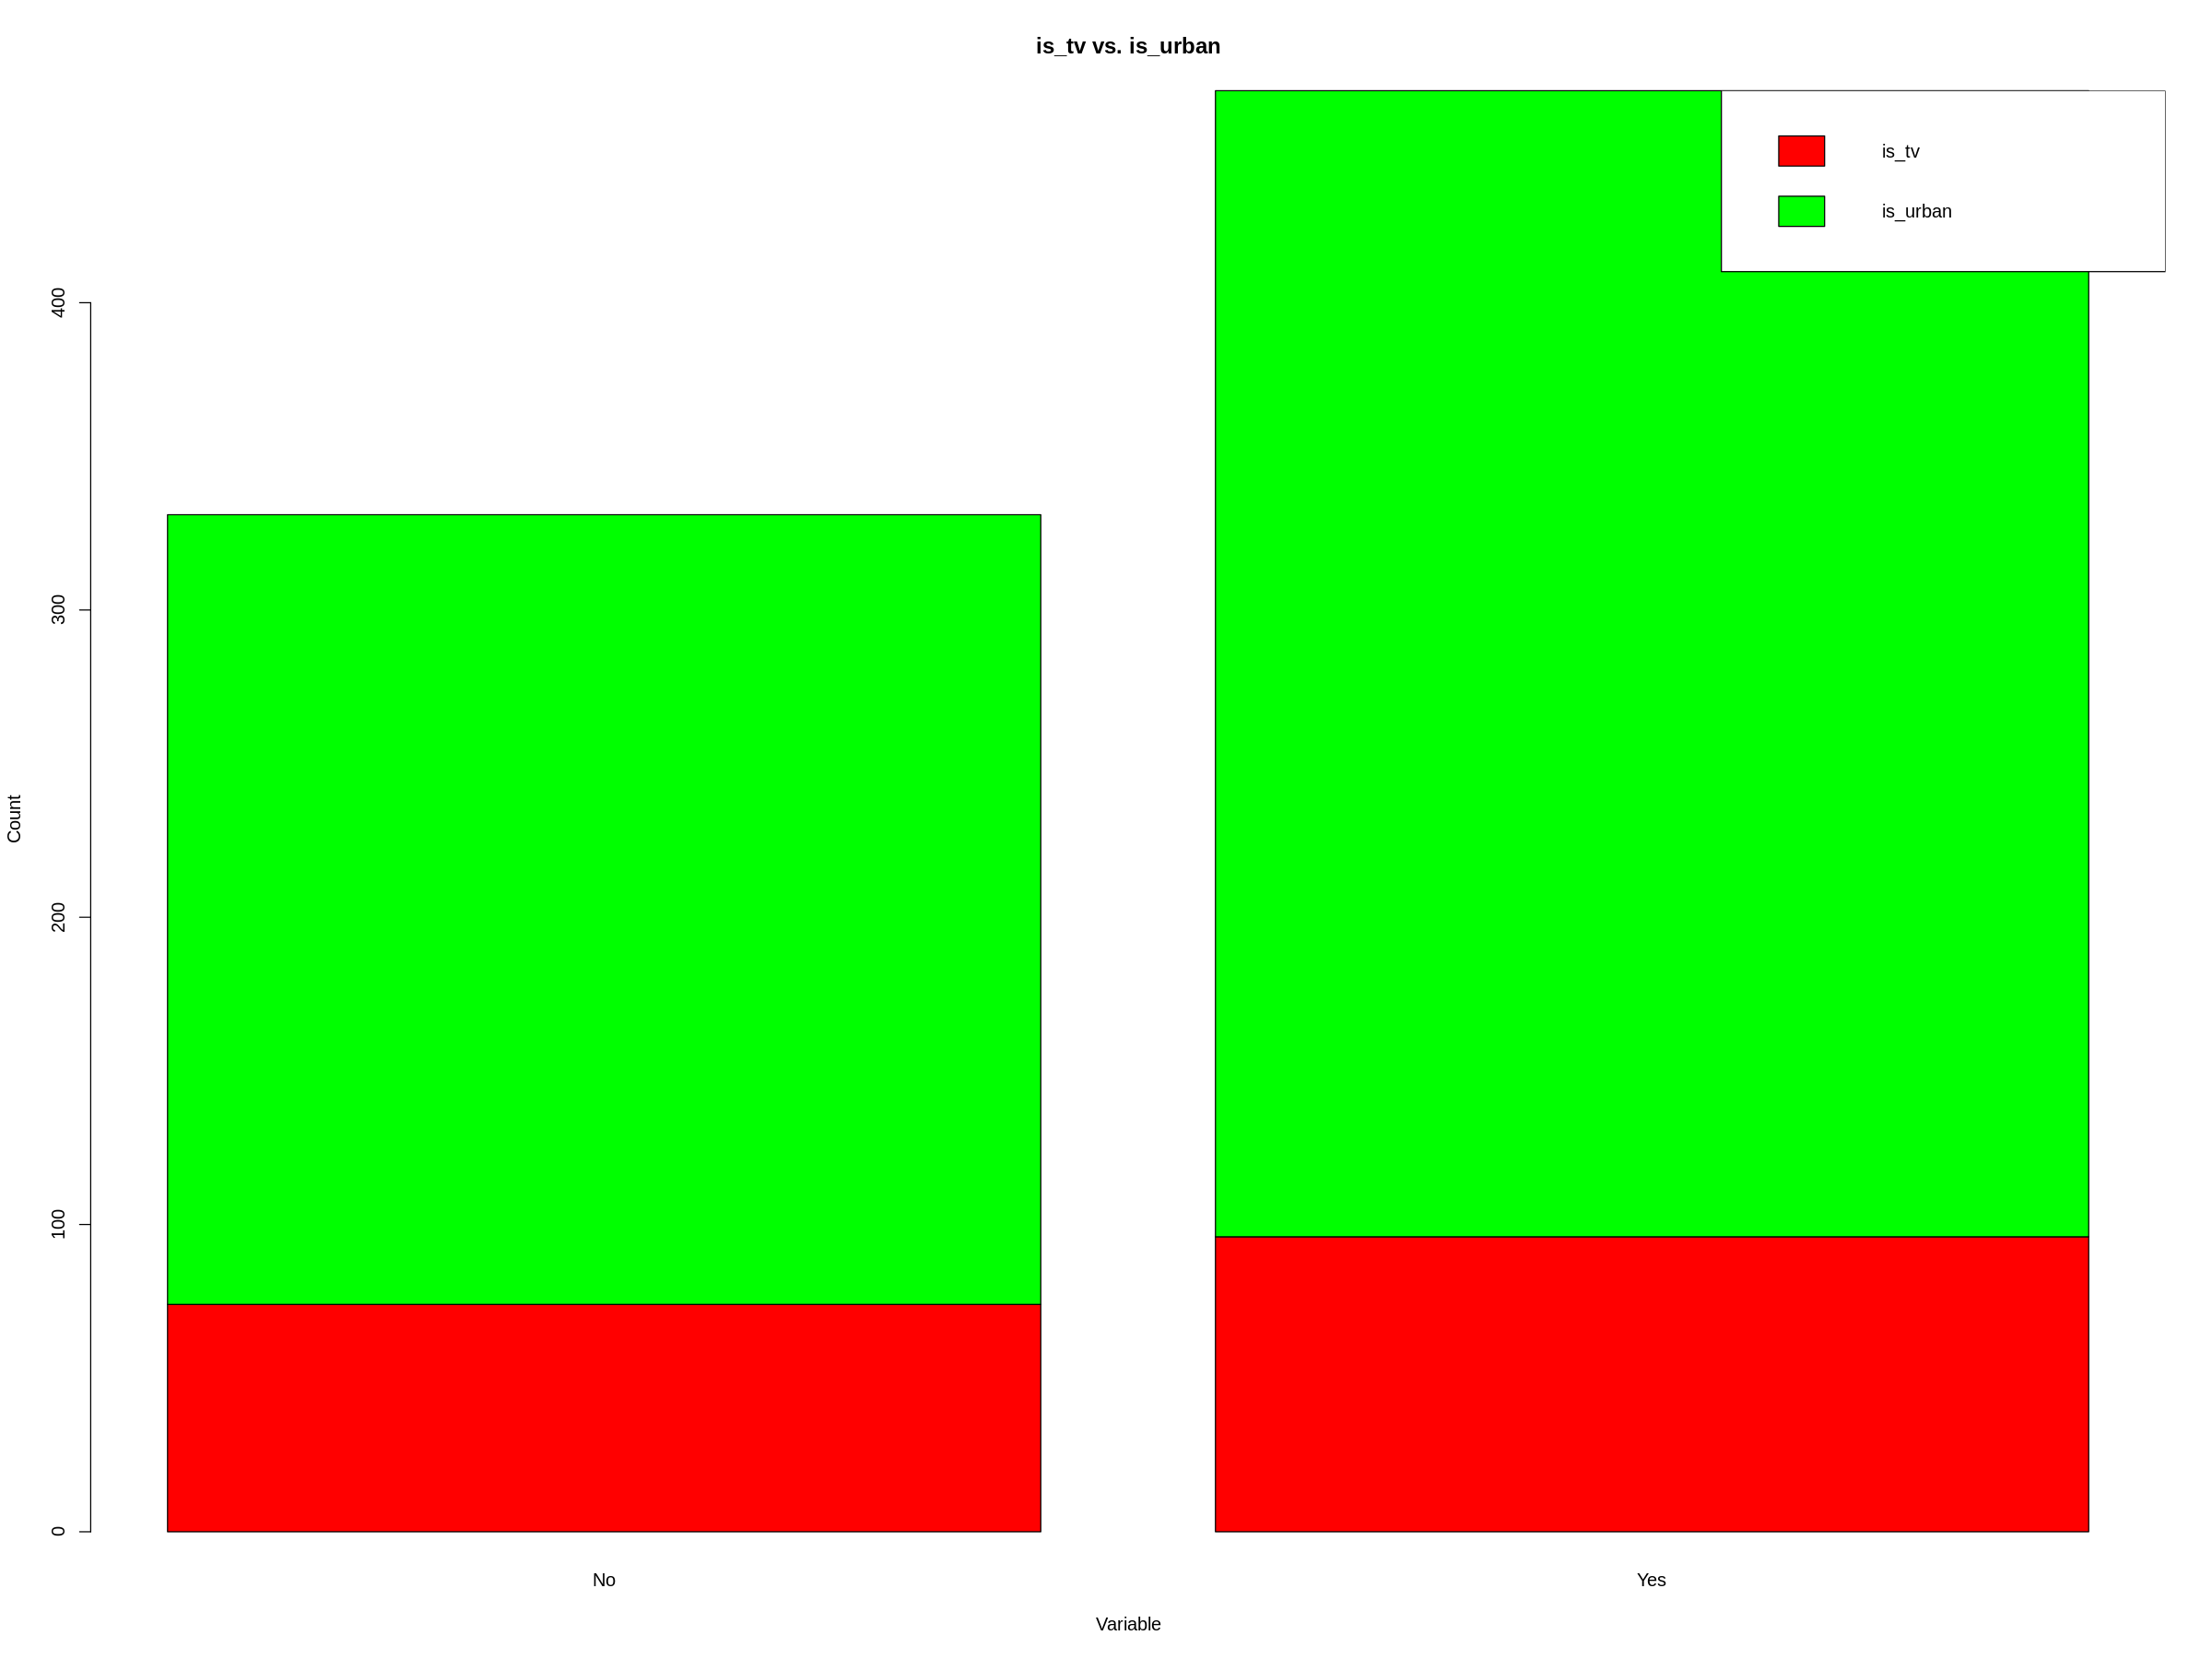

In [179]:
# Calculating the percentages of 'is_urban' & 'is_tv' to plot
table(df_train$is_tv)/nrow(df_train)*100
a <- table(df_train[,c('is_tv','is_urban')])
apply(a, 1, function(x) x/sum(x) * 100)

# Plotting
barplot(a, main='is_tv vs. is_urban', xlab='Variable', ylab='Count', col = c('red','green'))
legend('topright', c('is_tv','is_urban'), fill = c("red","green"))

__Observation from the plot:__

__1.__ Majority of the households are in urban areas.


In [180]:
# Number of household with TV
cat(crayon::bold("Number of households with TV out of 800"))
nrow(df_train[df_train$is_tv=='Yes',])

# Average Utility bill for a household with TV
cat(crayon::bold("Average Utility bill for a household with TV:"))
round(mean(df_train[df_train$is_tv=='Yes',]$amount_paid),2)

# Average Utility bill for a household without TV
cat(crayon::bold("Average Utility bill for a household without TV:"))
round(mean(df_train[df_train$is_tv=='No',]$amount_paid),2)

Number of households with TV out of 800

[1] 630

Average Utility bill for a household with TV:

[1] 120.93

Average Utility bill for a household without TV:

[1] 106

#### 'is_ac' - Whether the household have AC or more


    No    Yes 
64.875 35.125 

,No,Yes
No,63.74134,66.21253
Yes,36.25866,33.78747


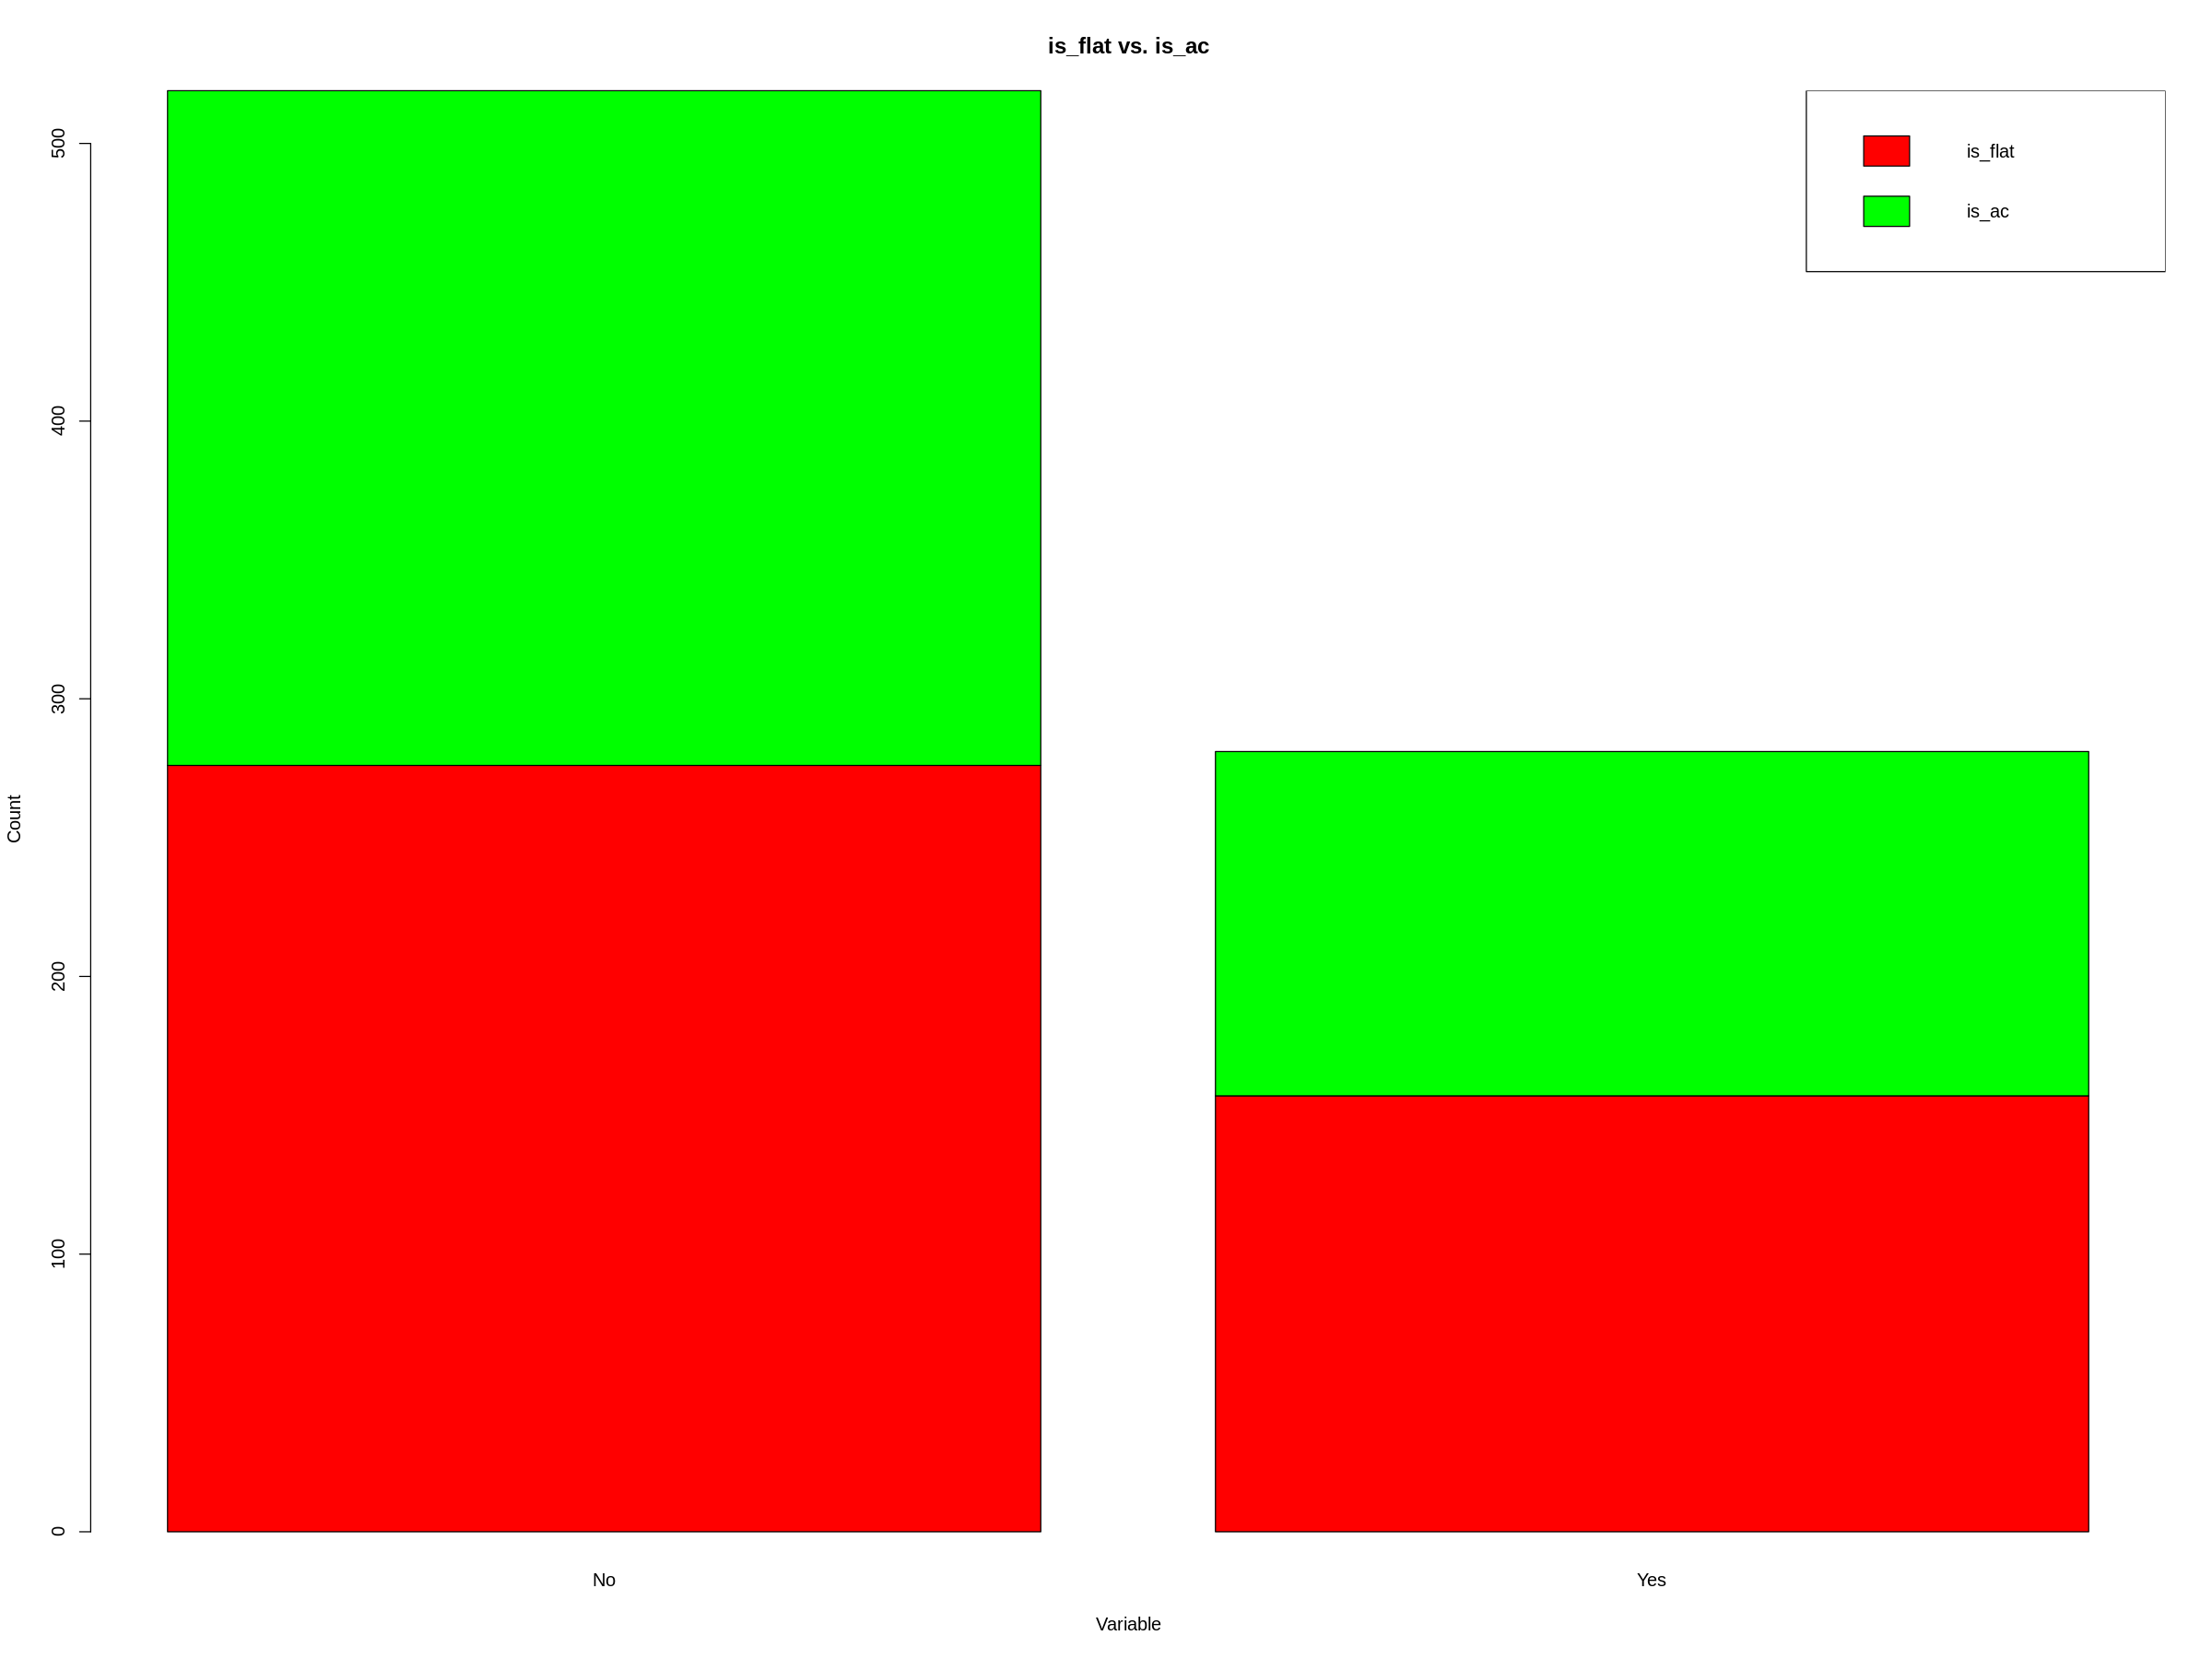

In [181]:
# Calculating the percentages of 'is_ac' & 'is_flat' to plot
table(df_train$is_ac)/nrow(df_train)*100
a <- table(df_train[,c('is_flat','is_ac')])
apply(a, 1, function(x) x/sum(x) * 100)

# Plotting
barplot(a, main='is_flat vs. is_ac', xlab='Variable', ylab='Count', col = c('red','green'))
legend('topright', c('is_flat','is_ac'), fill = c("red","green"))

__Observation from the plot:__

__1.__ Majority of the households neither have AC nor is a flat.




    No    Yes 
64.875 35.125 

,No,Yes
No,61.93353,66.95096
Yes,38.06647,33.04904


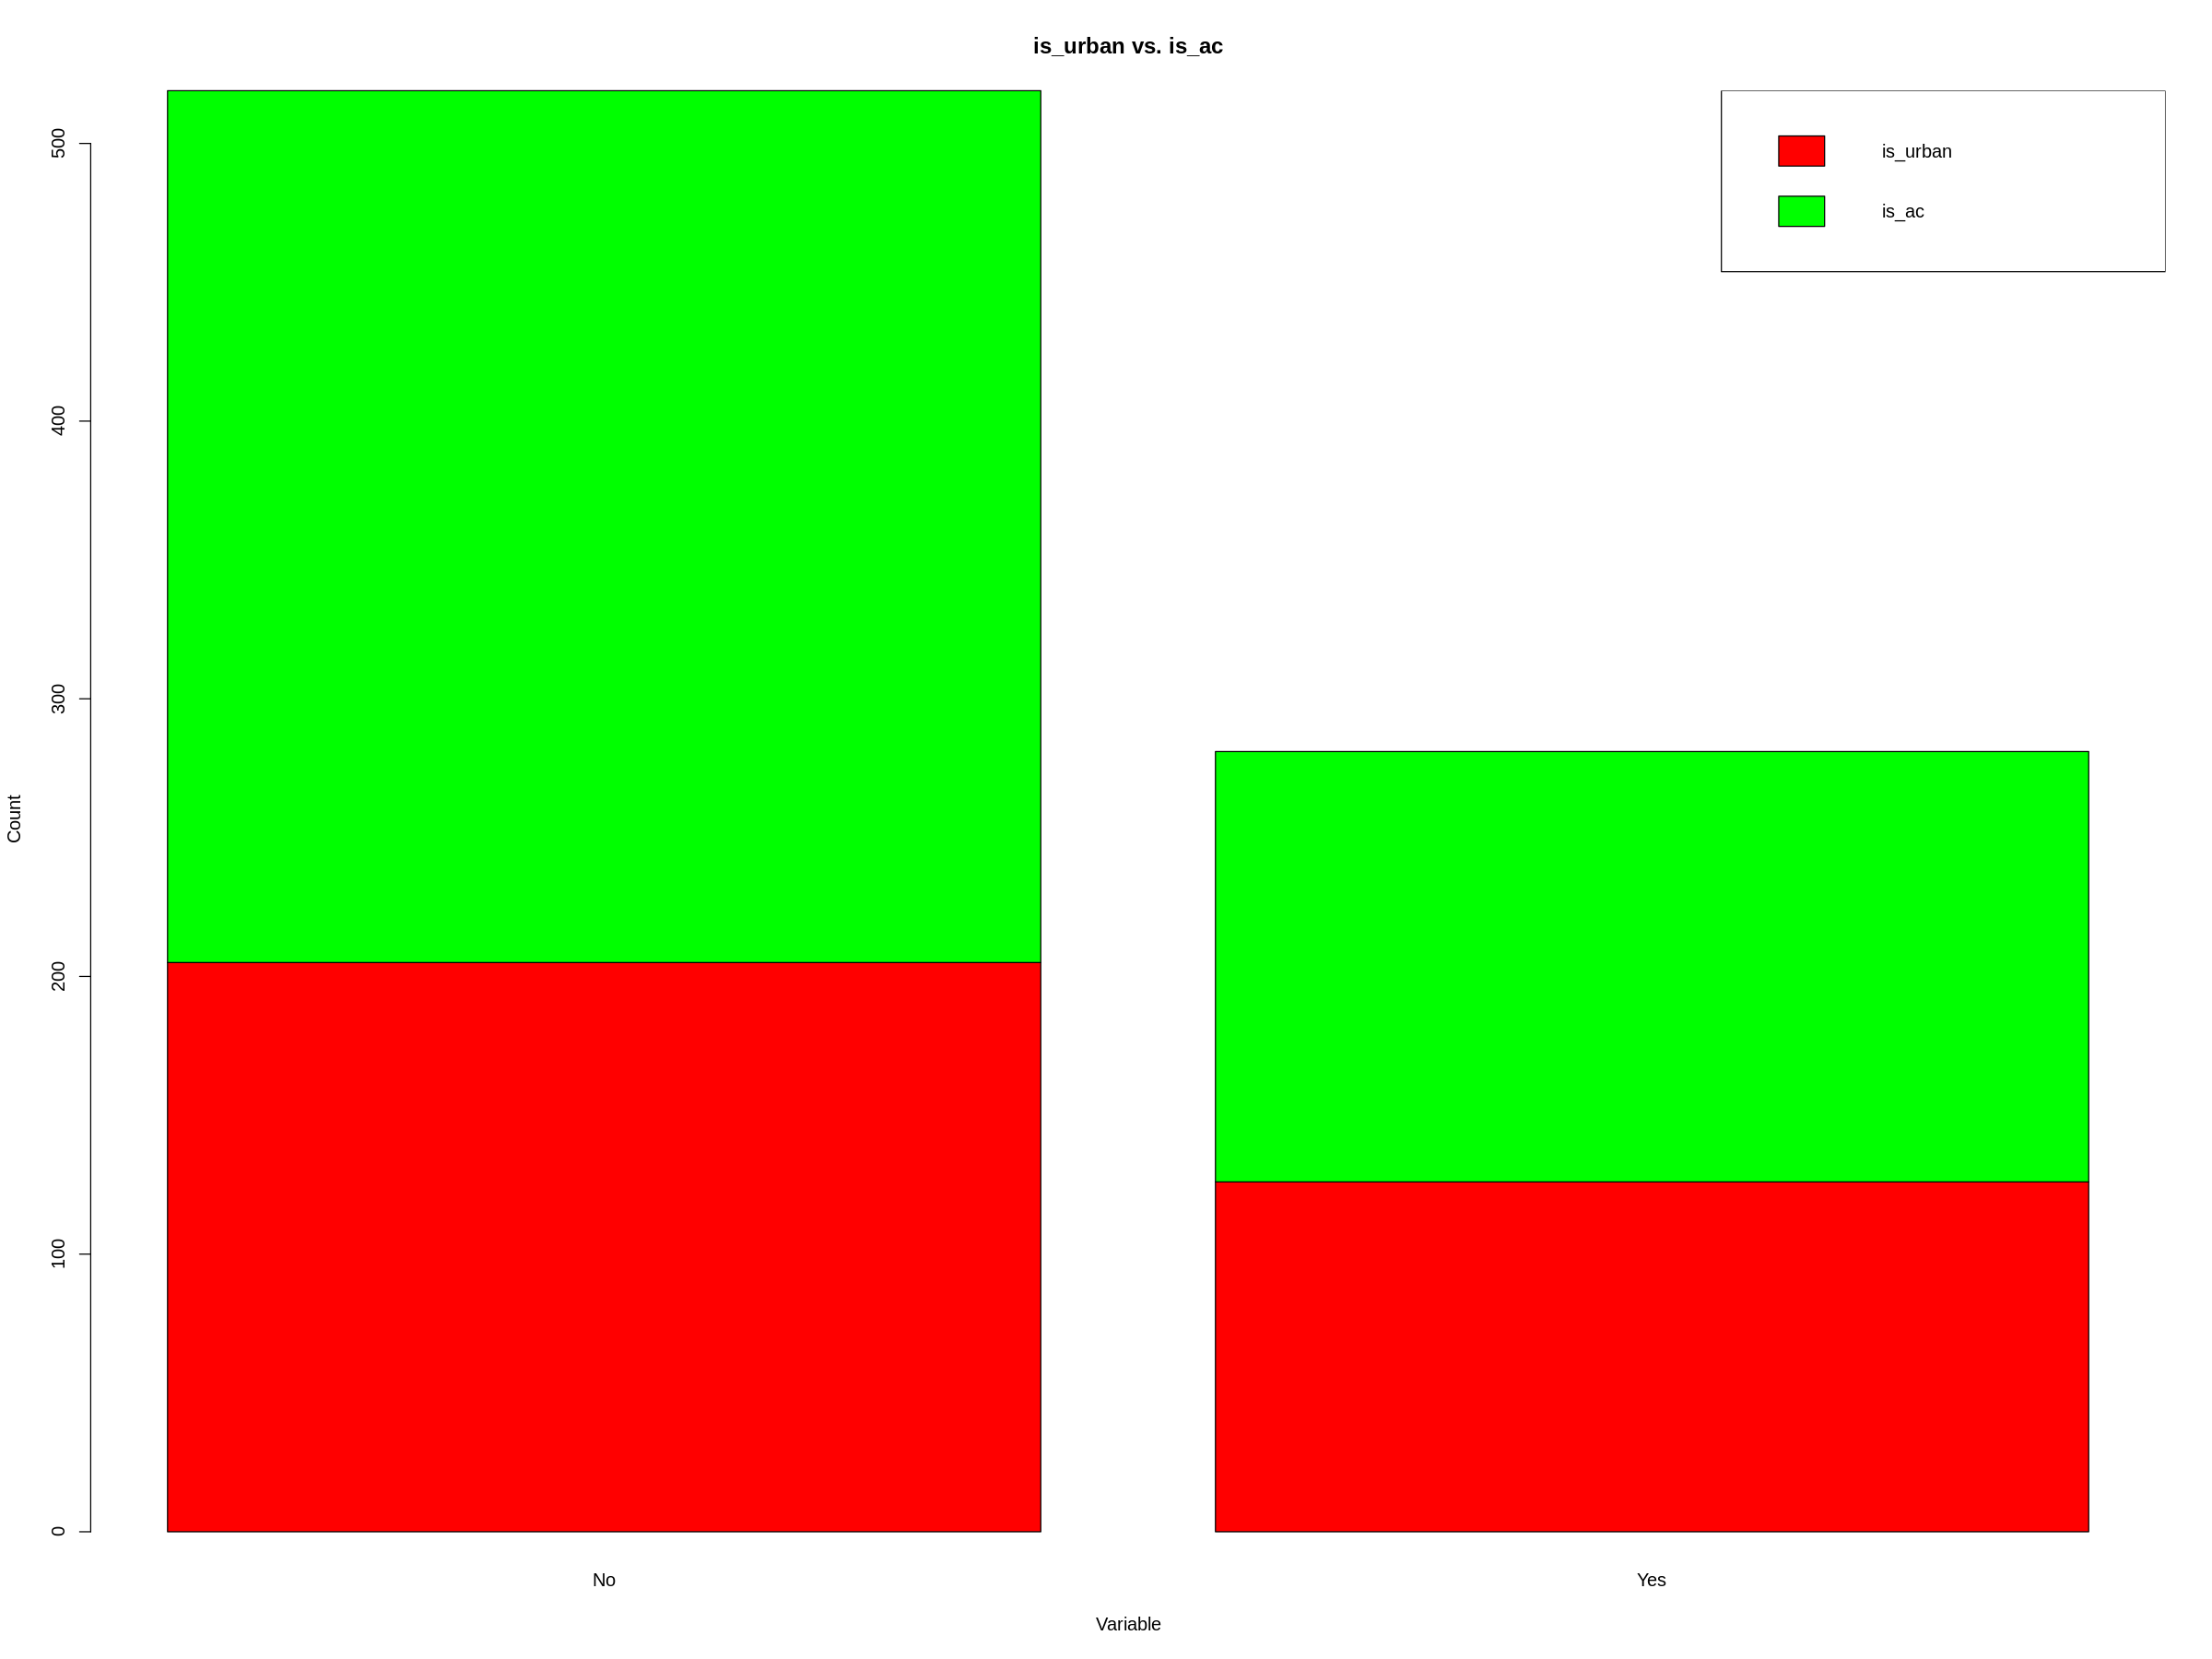

In [182]:
# Calculating the percentages of 'is_ac' & 'is_urban' to plot
table(df_train$is_ac)/nrow(df_train)*100
a <- table(df_train[,c('is_urban','is_ac')])
apply(a, 1, function(x) x/sum(x) * 100)

# Plotting
barplot(a, main='is_urban vs. is_ac', xlab='Variable', ylab='Count', col = c('red','green'))
legend('topright', c('is_urban','is_ac'), fill = c("red","green"))

__Observation from the plot:__

__1.__ Less number of households are in urban area and have an AC.


In [183]:
# Number of household with AC
cat(crayon::bold("Number of households with AC out of 800"))
nrow(df_train[df_train$is_ac=='Yes',])

# Average Utility bill for a household with AC
cat(crayon::bold("Average Utility bill for a household with AC:"))
round(mean(df_train[df_train$is_ac=='Yes',]$amount_paid),2)

# Average Utility bill for a household without AC
cat(crayon::bold("Average Utility bill for a household without AC:"))
round(mean(df_train[df_train$is_ac=='No',]$amount_paid),2)

Number of households with AC out of 800

[1] 281

Average Utility bill for a household with AC:

[1] 134.52

Average Utility bill for a household without AC:

[1] 108.69

#### 'is_flat' - Whether the household is a flat or otherwise


    No    Yes 
54.125 45.875 

,No,Yes
No,39.26097,43.86921
Yes,60.73903,56.13079


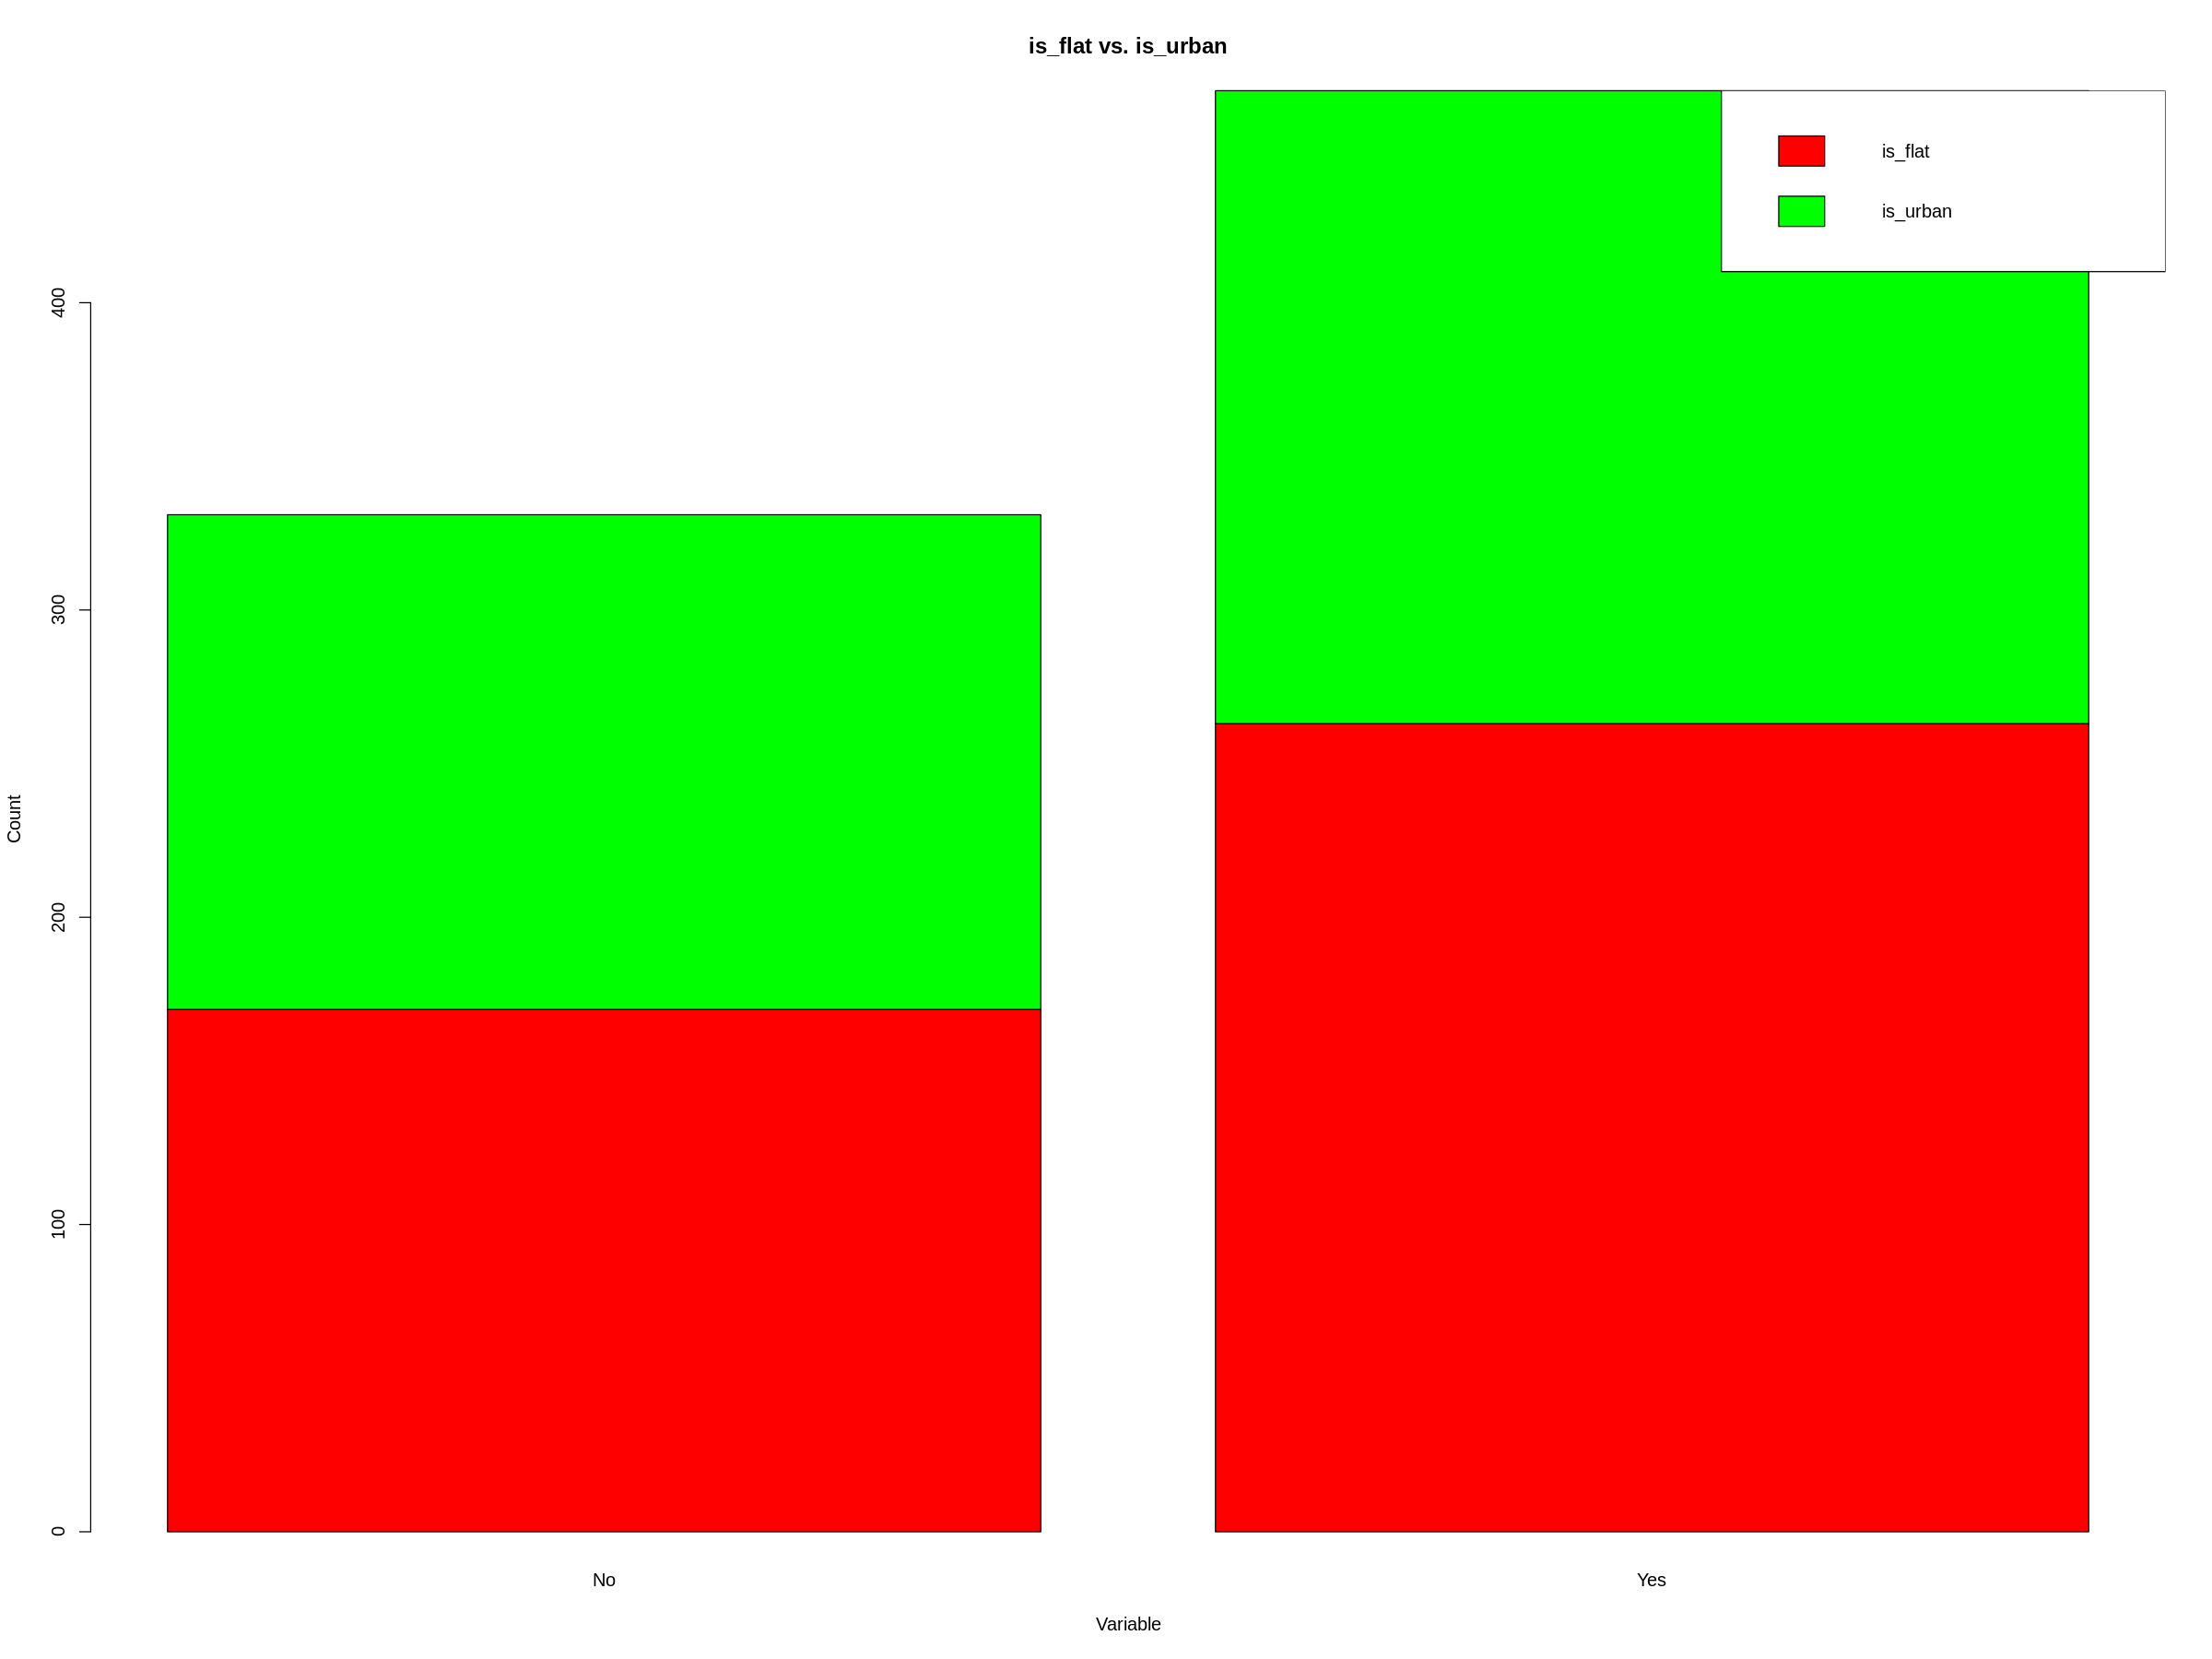

In [184]:
# Calculating the percentages of 'is_urban' & 'is_flat' to plot
table(df_train$is_flat)/nrow(df_train)*100
a <- table(df_train[,c('is_flat','is_urban')])
apply(a, 1, function(x) x/sum(x) * 100)

# Plotting
barplot(a, main='is_flat vs. is_urban', xlab='Variable', ylab='Count', col = c('red','green'))
legend('topright', c('is_flat','is_urban'), fill = c("red","green"))

__Observation from the plot:__

__1.__ Majority of the households who have their homes in urban areas have flats.


In [185]:
# Number of household is a flat
cat(crayon::bold("Number of flats out of 800"))
nrow(df_train[df_train$is_flat=='Yes',])

# Average Utility bill for a household is a flat
cat(crayon::bold("Average Utility bill for a flat:"))
round(mean(df_train[df_train$is_flat=='Yes',]$amount_paid),2)

# Average Utility bill for a household without AC
cat(crayon::bold("Average Utility bill for a household that is not a flat:"))
round(mean(df_train[df_train$is_flat=='No',]$amount_paid),2)

Number of flats out of 800

[1] 367

Average Utility bill for a flat:

[1] 121.01

Average Utility bill for a household that is not a flat:

[1] 115

#### 'is_urban' - Whether the household is a urban or country-side

In [186]:
# Number of household in urban areas
cat(crayon::bold("Number of households in urban areas out of 800"))
nrow(df_train[df_train$is_ac=='Yes',])

# Average Utility bill for a household in urban areas
cat(crayon::bold("Average Utility bill for a household in urban areas:"))
round(mean(df_train[df_train$is_ac=='Yes',]$amount_paid),2)

# Average Utility bill for a household in country
cat(crayon::bold("Average Utility bill for a household in country-side:"))
round(mean(df_train[df_train$is_ac=='No',]$amount_paid),2)

Number of households in urban areas out of 800

[1] 281

Average Utility bill for a household in urban areas:

[1] 134.52

Average Utility bill for a household in country-side:

[1] 108.69

In [187]:
# Relation between 2 or more categorical variables

# Number of household in urban areas with AC
cat(crayon::bold("Number of households with AC in urban areas out of 800"))
nrow(df_train[df_train$is_ac=='Yes' & df_train$is_urban=='Yes',])

# Average Utility bill for a household with AC in urban areas
cat(crayon::bold("\nAverage Utility bill for a household with AC in urban areas:"))
round(mean(df_train[df_train$is_ac=='Yes' & df_train$is_urban=='Yes',]$amount_paid),2)

# Average Utility bill for a household without AC in urban areas
cat(crayon::bold("\nAverage Utility bill for a household without AC in urban areas:"))
round(mean(df_train[df_train$is_ac=='No' & df_train$is_urban=='Yes',]$amount_paid),2)


# Number of household in urban areas with TV
cat(crayon::bold("\nNumber of households with TV in urban areas out of 800"))
nrow(df_train[df_train$is_tv=='Yes' & df_train$is_urban=='Yes',])

# Average Utility bill for a household with TV in urban areas
cat(crayon::bold("\nAverage Utility bill for a household with TV in urban areas:"))
round(mean(df_train[df_train$is_tv=='Yes' & df_train$is_urban=='Yes',]$amount_paid),2)

# Average Utility bill for a household without TV in urban areas
cat(crayon::bold("\nAverage Utility bill for a household without TV in urban areas:"))
round(mean(df_train[df_train$is_tv=='No' & df_train$is_urban=='Yes',]$amount_paid),2)

Number of households with AC in urban areas out of 800

[1] 155


Average Utility bill for a household with AC in urban areas:

[1] 156.96


Average Utility bill for a household without AC in urban areas:

[1] 128.39


Number of households with TV in urban areas out of 800

[1] 373


Average Utility bill for a household with TV in urban areas:

[1] 141.05


Average Utility bill for a household without TV in urban areas:

[1] 125.32

## 3. Methodology<a class="anchor" id="sec_4"></a>

The Exploratory Data Analysis done gave clear corrolations between the predictor and target variables. The target variable 'amount_paid' is highly corrolated with predictor variables like  _'is_urban'_, _'num_children'_ , _'is_ac'_, _'is_tv'_ and _'housearea'_ . This makes the predictor variables highly significant. So these variables must be there in the model.

The 2 models that is going to be built to predict the amount_paid for the test data are:
1. Linear Regression with Cross-Validation
2. Random Forests with Hyper-grid tuning

The Steps to be followed for Model Development are:

__Step 1: Build the dataset to be used by the Linear Regression and Random Forests__

_* For Linear Regression, the 'month' predictor will be converted into dichotomous through One-Hot-Encoding_

_* As the test data cannot be used for fine-tuning the model, the train data must be split into train data and validation data for Linear Regression_

_* The Split will be - Train data (60%), Validation Data (20%) and Test data (20%)_

_* The Categorical Variables from String ('Yes' / 'No') to Numerical 0 and 1 for the training, validation and testing dataset_

_* For Random Forests, the categorical data must be a factor as the model does not work with One Hot Encoder._

_* For Random Forests, there is no need for validation set. So the dataset can be split into 2 sets: Train dataset (80%) and Test dataset (20%)._

__Step 2: Model Development for Linear Regression__

_* Create a function to measure the RMSE._

_* Build a Full Linear Regression Model and measure the RMSE for training and validation dataset._

_* Build a Stepwise AIC for Full Linear Regression Model and measure the RMSE for training and validation dataset._

_* Based on RMSE, build a model for only the significant parameters and measure the RMSE for the training and validation dataset._

_* Based on RMSE, build a model for extended interactions along with existing features and measure the RMSE for the training and validation dataset._

_* Build a Cross-Validated model on the full model with K = 10 and measure the RMSE for the training and the testing dataset. This would be the final model for the linear regression._

__Step 3: Model Development for Random Forests__

_* Create a Hyper-grid for the Hypertuning_

_* Create a measure for Out-Of-Bag RMSE (OOB-RMSE)_

_* Training and Predicting the test target using the best hyper-parameters_

_* Calculating the RMSE Values for the RandomForest to check its performance_

## 4. Model Development <a class="anchor" id="sec_5"></a>

### Step 1: Building the dataset for the Models

### Step 1: Build the dataset to be used by the Linear Regression and Random Forests

Training Dataset

In [188]:
# Converting the Categorical Variables from String to Numerical 0 and 1 for the training dataset
df_train$is_tv <- ifelse(df_train$is_tv == 'Yes',1,0)
df_train$is_ac <- ifelse(df_train$is_ac == 'Yes',1,0)
df_train$is_flat <- ifelse(df_train$is_flat == 'Yes',1,0)
df_train$is_urban <- ifelse(df_train$is_urban == 'Yes',1,0)

Testing Dataset

In [189]:
# Converting the Categorical Variables from String to Numerical 0 and 1 for the testing dataset
df_test_data$is_tv <- ifelse(df_test_data$is_tv == 'Yes',1,0)
df_test_data$is_ac <- ifelse(df_test_data$is_ac == 'Yes',1,0)
df_test_data$is_flat <- ifelse(df_test_data$is_flat == 'Yes',1,0)
df_test_data$is_urban <- ifelse(df_test_data$is_urban == 'Yes',1,0)

#### Modelling can be done with the help of One Hot Encoding. The Categorical Variables are converted from 'Yes' & 'No' to 1 and 0.

#### Expanding the number of columns through One Hot Encoding of Categorical Variables where each class in a categorical variable is converted into separate dichotomous catergorical variables.

Training Dataset

In [190]:
train_dummy <- dummyVars('~.', data = df_train)
train_mod <- data.frame(predict(train_dummy, newdata = df_train))
head(train_mod)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month.1,month.2,month.3,month.4,month.5,month.6,month.7,month.8,month.9,month.10,amount_paid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6,701.89,0,1,1,16448.39,0,0,0,0,1,0,0,0,0,0,0,0,73.2025
2,3,5,1175.71,1,1,1,20081.92,0,1,0,0,0,0,0,0,0,0,1,0,170.1235
3,1,3,811.09,0,1,1,18199.03,1,0,0,0,0,0,0,0,0,0,0,1,104.5671
4,3,5,486.17,0,1,0,9439.84,0,0,0,1,0,0,0,0,0,0,0,0,39.7031
5,2,4,511.18,0,0,1,12366.32,0,1,0,0,0,0,0,0,1,0,0,0,82.5938
6,2,6,925.72,0,1,0,15360.92,0,0,0,0,0,0,0,0,0,0,0,1,69.6282


Testing Dataset

In [191]:
test_dummy <- dummyVars('~.', data = df_test_data)
test_mod <- data.frame(predict(test_dummy, newdata = df_test_data))
head(test_mod)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month.1,month.2,month.3,month.4,month.5,month.6,month.7,month.8,month.9,month.10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,7,786.06,0,1,0,17934.95,2,1,0,0,0,1,0,0,0,0,0,0
2,2,9,1113.99,1,1,0,14046.89,2,0,0,0,0,0,0,1,0,0,0,0
3,2,5,697.17,0,1,1,8902.19,2,1,1,0,0,0,0,0,0,0,0,0
4,2,6,979.89,1,1,0,7261.18,3,1,0,0,1,0,0,0,0,0,0,0
5,1,5,729.06,1,1,0,11228.29,1,1,1,0,0,0,0,0,0,0,0,0
6,1,5,1023.66,0,1,0,6413.32,1,1,0,0,0,0,0,0,0,0,0,1


#### Splitting the Training Dataset to Train and Validation Dataset

As we cannot use the testing data for modelling, we have to split the training dataset into training dataset and validation dataset. The Validation set will be used as a test set for model development.

In [192]:
train_mod_val <- train_mod[1:600,]
val_mod <- train_mod[601:800,]

Splitting the Training Dataset to Train data and Target data for Cross-validation in the later stage

In [193]:
# Splitting the training data to data and target dataframes for cross-validation
train_mod_data <- train_mod[,-ncol(train_mod)]
train_mod_target <- as.data.frame(train_mod[,ncol(train_mod)])

val_mod_data <- val_mod[,-ncol(val_mod)]
val_mod_target <- as.data.frame(val_mod[,ncol(val_mod)])


We will use the train data for training and validation data for testing the models.

### Step 2: Building a Full Model
#### Linear Regression
Building a full model to identify the most significant variables that affect the model.

In [194]:
lm_full_model <- lm(amount_paid ~ ., train_mod_val)
summary(lm_full_model)


Call:
lm(formula = amount_paid ~ ., data = train_mod_val)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.0444 -10.4719   0.1024  10.2652  25.4883 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        24.1574359  4.2552997   5.677 2.17e-08 ***
num_rooms          -0.0505147  0.5993445  -0.084  0.93286    
num_people          1.2144705  0.2855852   4.253 2.46e-05 ***
housearea           0.0084188  0.0037202   2.263  0.02400 *  
is_ac              32.4398564  1.0612013  30.569  < 2e-16 ***
is_tv              14.9129133  1.2814528  11.638  < 2e-16 ***
is_flat            11.7631832  1.0234412  11.494  < 2e-16 ***
ave_monthly_income  0.0005187  0.0001067   4.861 1.50e-06 ***
num_children       18.6459443  0.5442471  34.260  < 2e-16 ***
is_urban           50.2843710  1.0298128  48.829  < 2e-16 ***
month.1            -4.7856929  2.2751780  -2.103  0.03586 *  
month.2            -3.5851970  2.0972

Producing the diagnostic plots of the full model

NULL

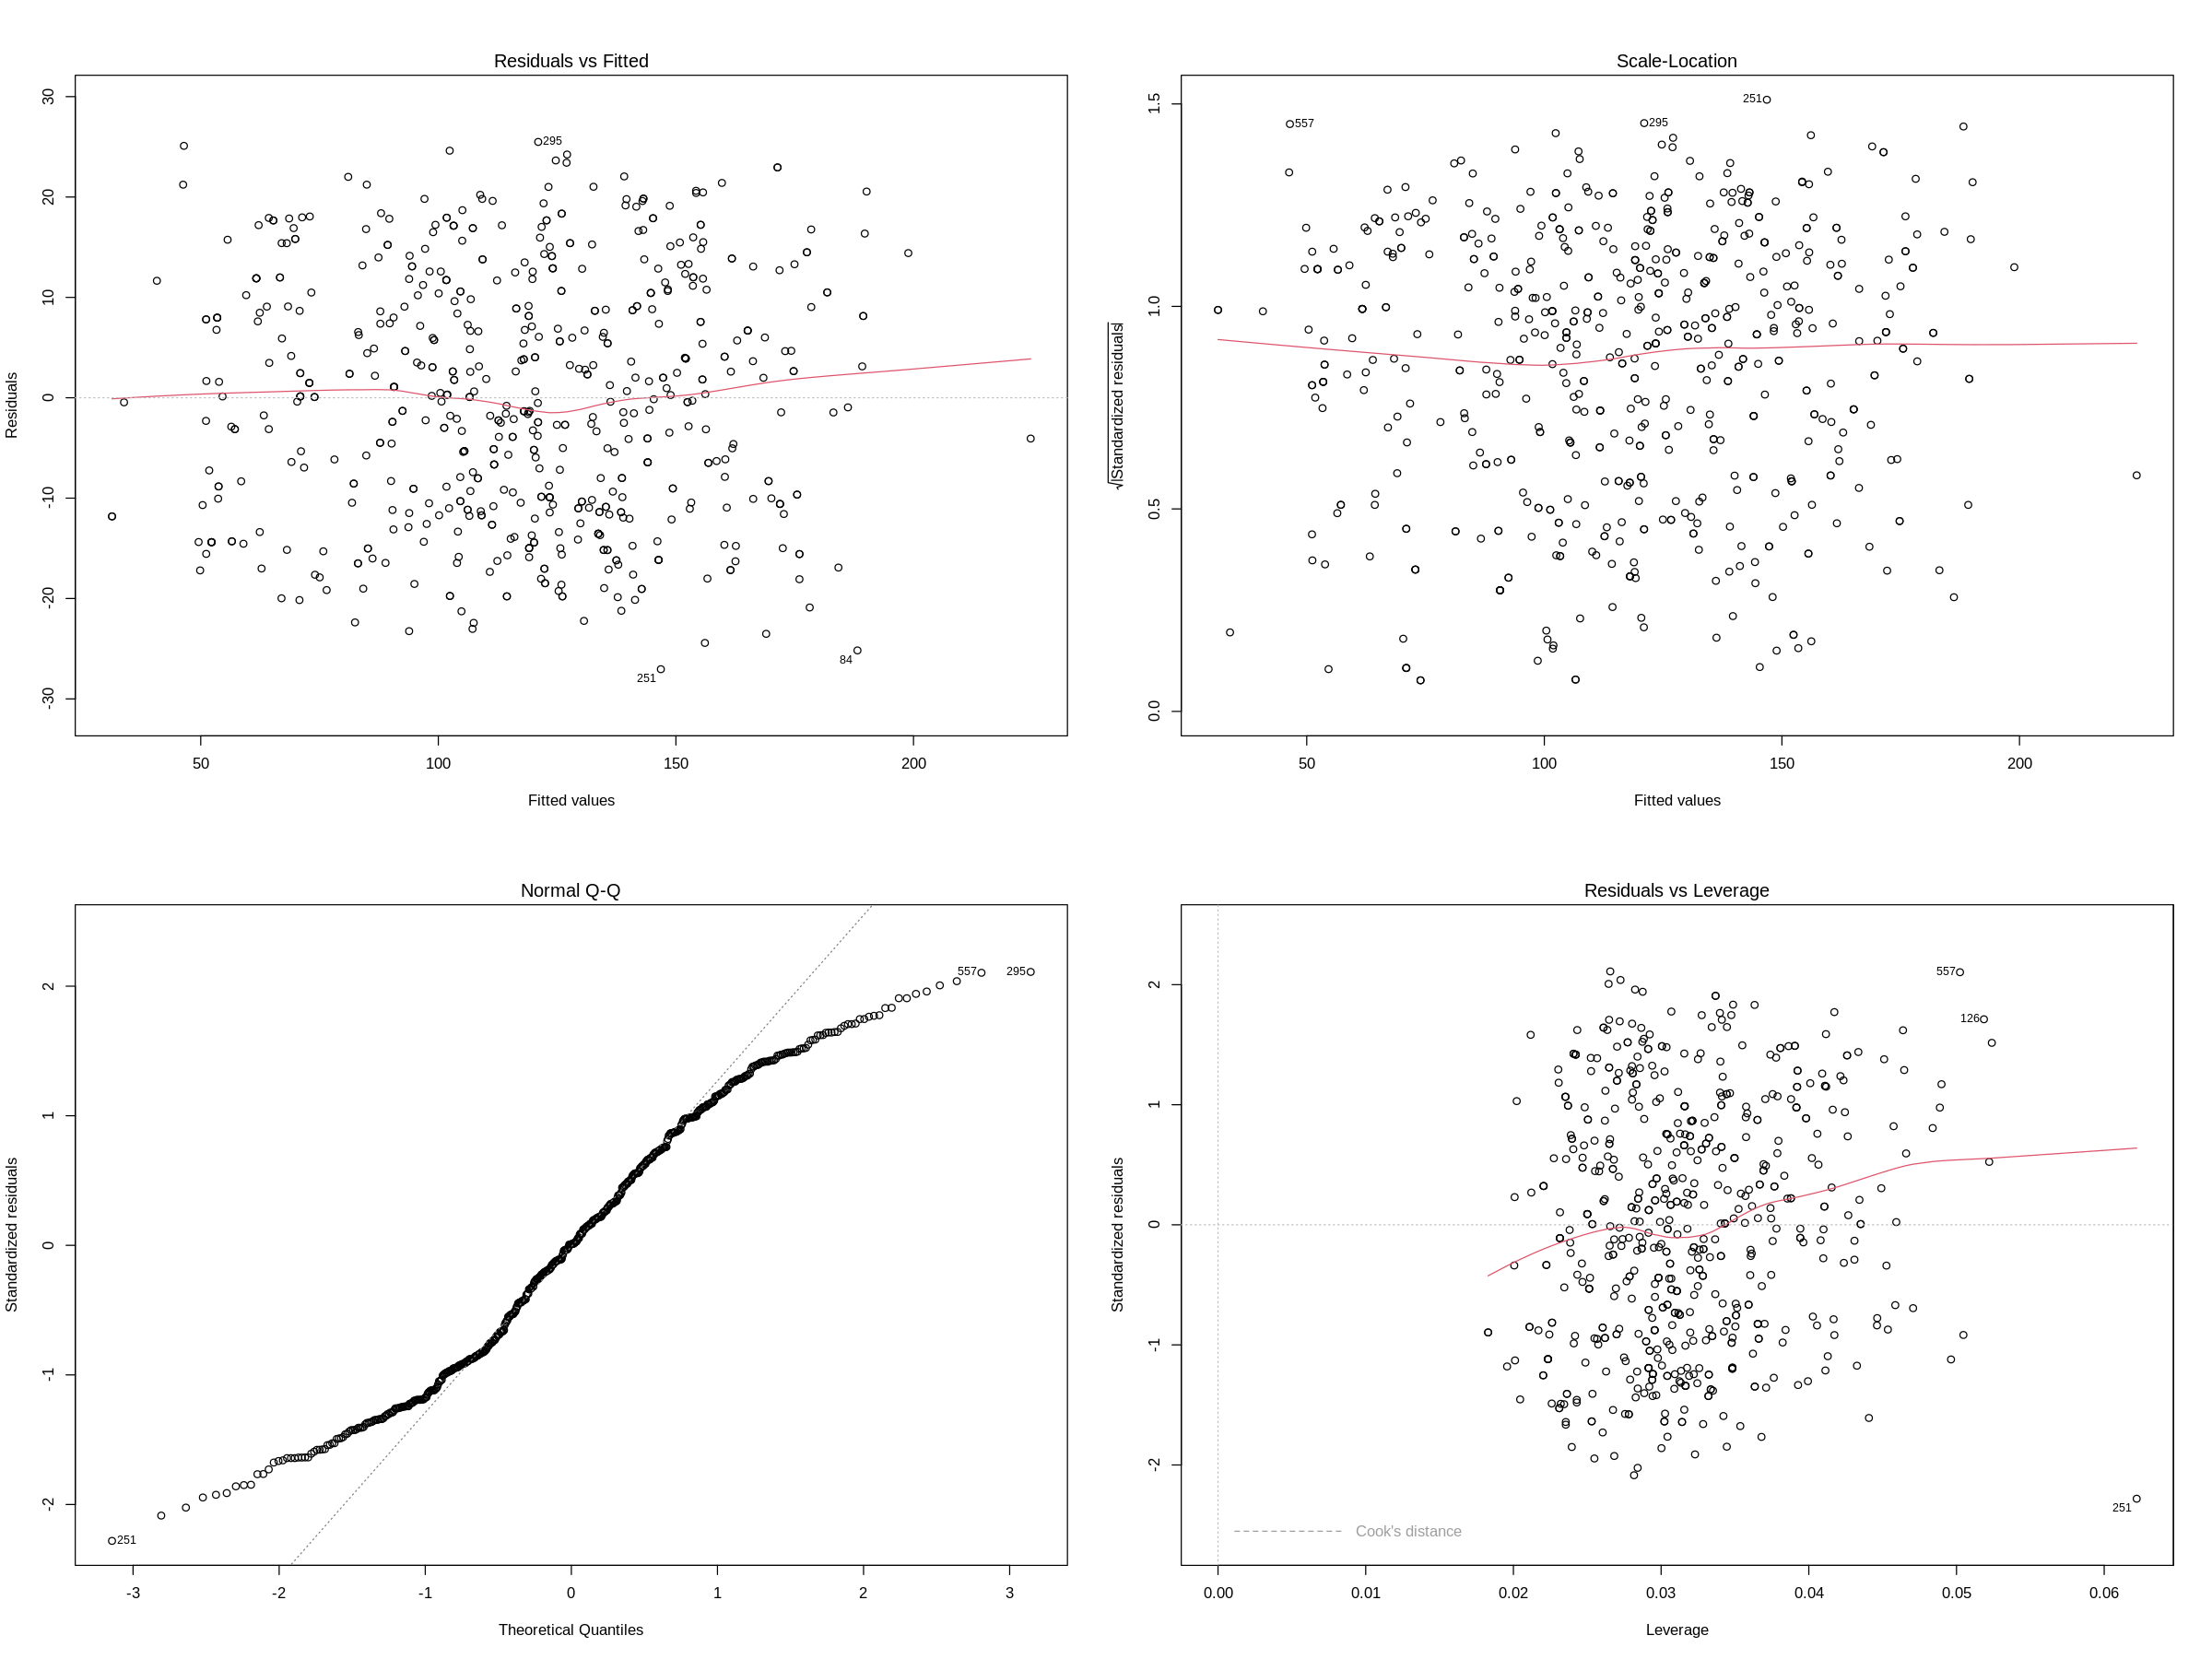

In [195]:
par(mfcol=c(2,2)) 
plot(lm_full_model) + theme(text = element_text(size = 20))

#### Observations from the above plot:
__1. The residual vs fitted plot:__ This plot is used to check the linear assumption. The above plot clearly shows the equally spread residualsaround a horizontal line without distinct patterns. This is a good indication of linear relationships among the variables and the model has captured it.

__2. Q-Q plot:__ The Q-Q plot shows that whether the residuals are normally distributed. In the above plot, the residuals are following the line to a certain extent. 

__3. Scale-Location plot:__ It is used to check the assumption of equal variance if the residuals are spread equally along the range of predictors. From the above plot, the residuals are randomly spread which means that the residuals have similar variance.

__4. Residual-Leverage plot:__ This plot is used to identify the samples that are influential in a linear regression analysis. This can be identified using Cook's distance. From the above plot, there are some influential samples which are located in the lower right corner which has great influence on a regression line. But it is not clear regarding the Cook's distance line in the 4th plot. To identify the samples which has higher influence over the regression line, there is a need to check the Cook's distance plot as follows:

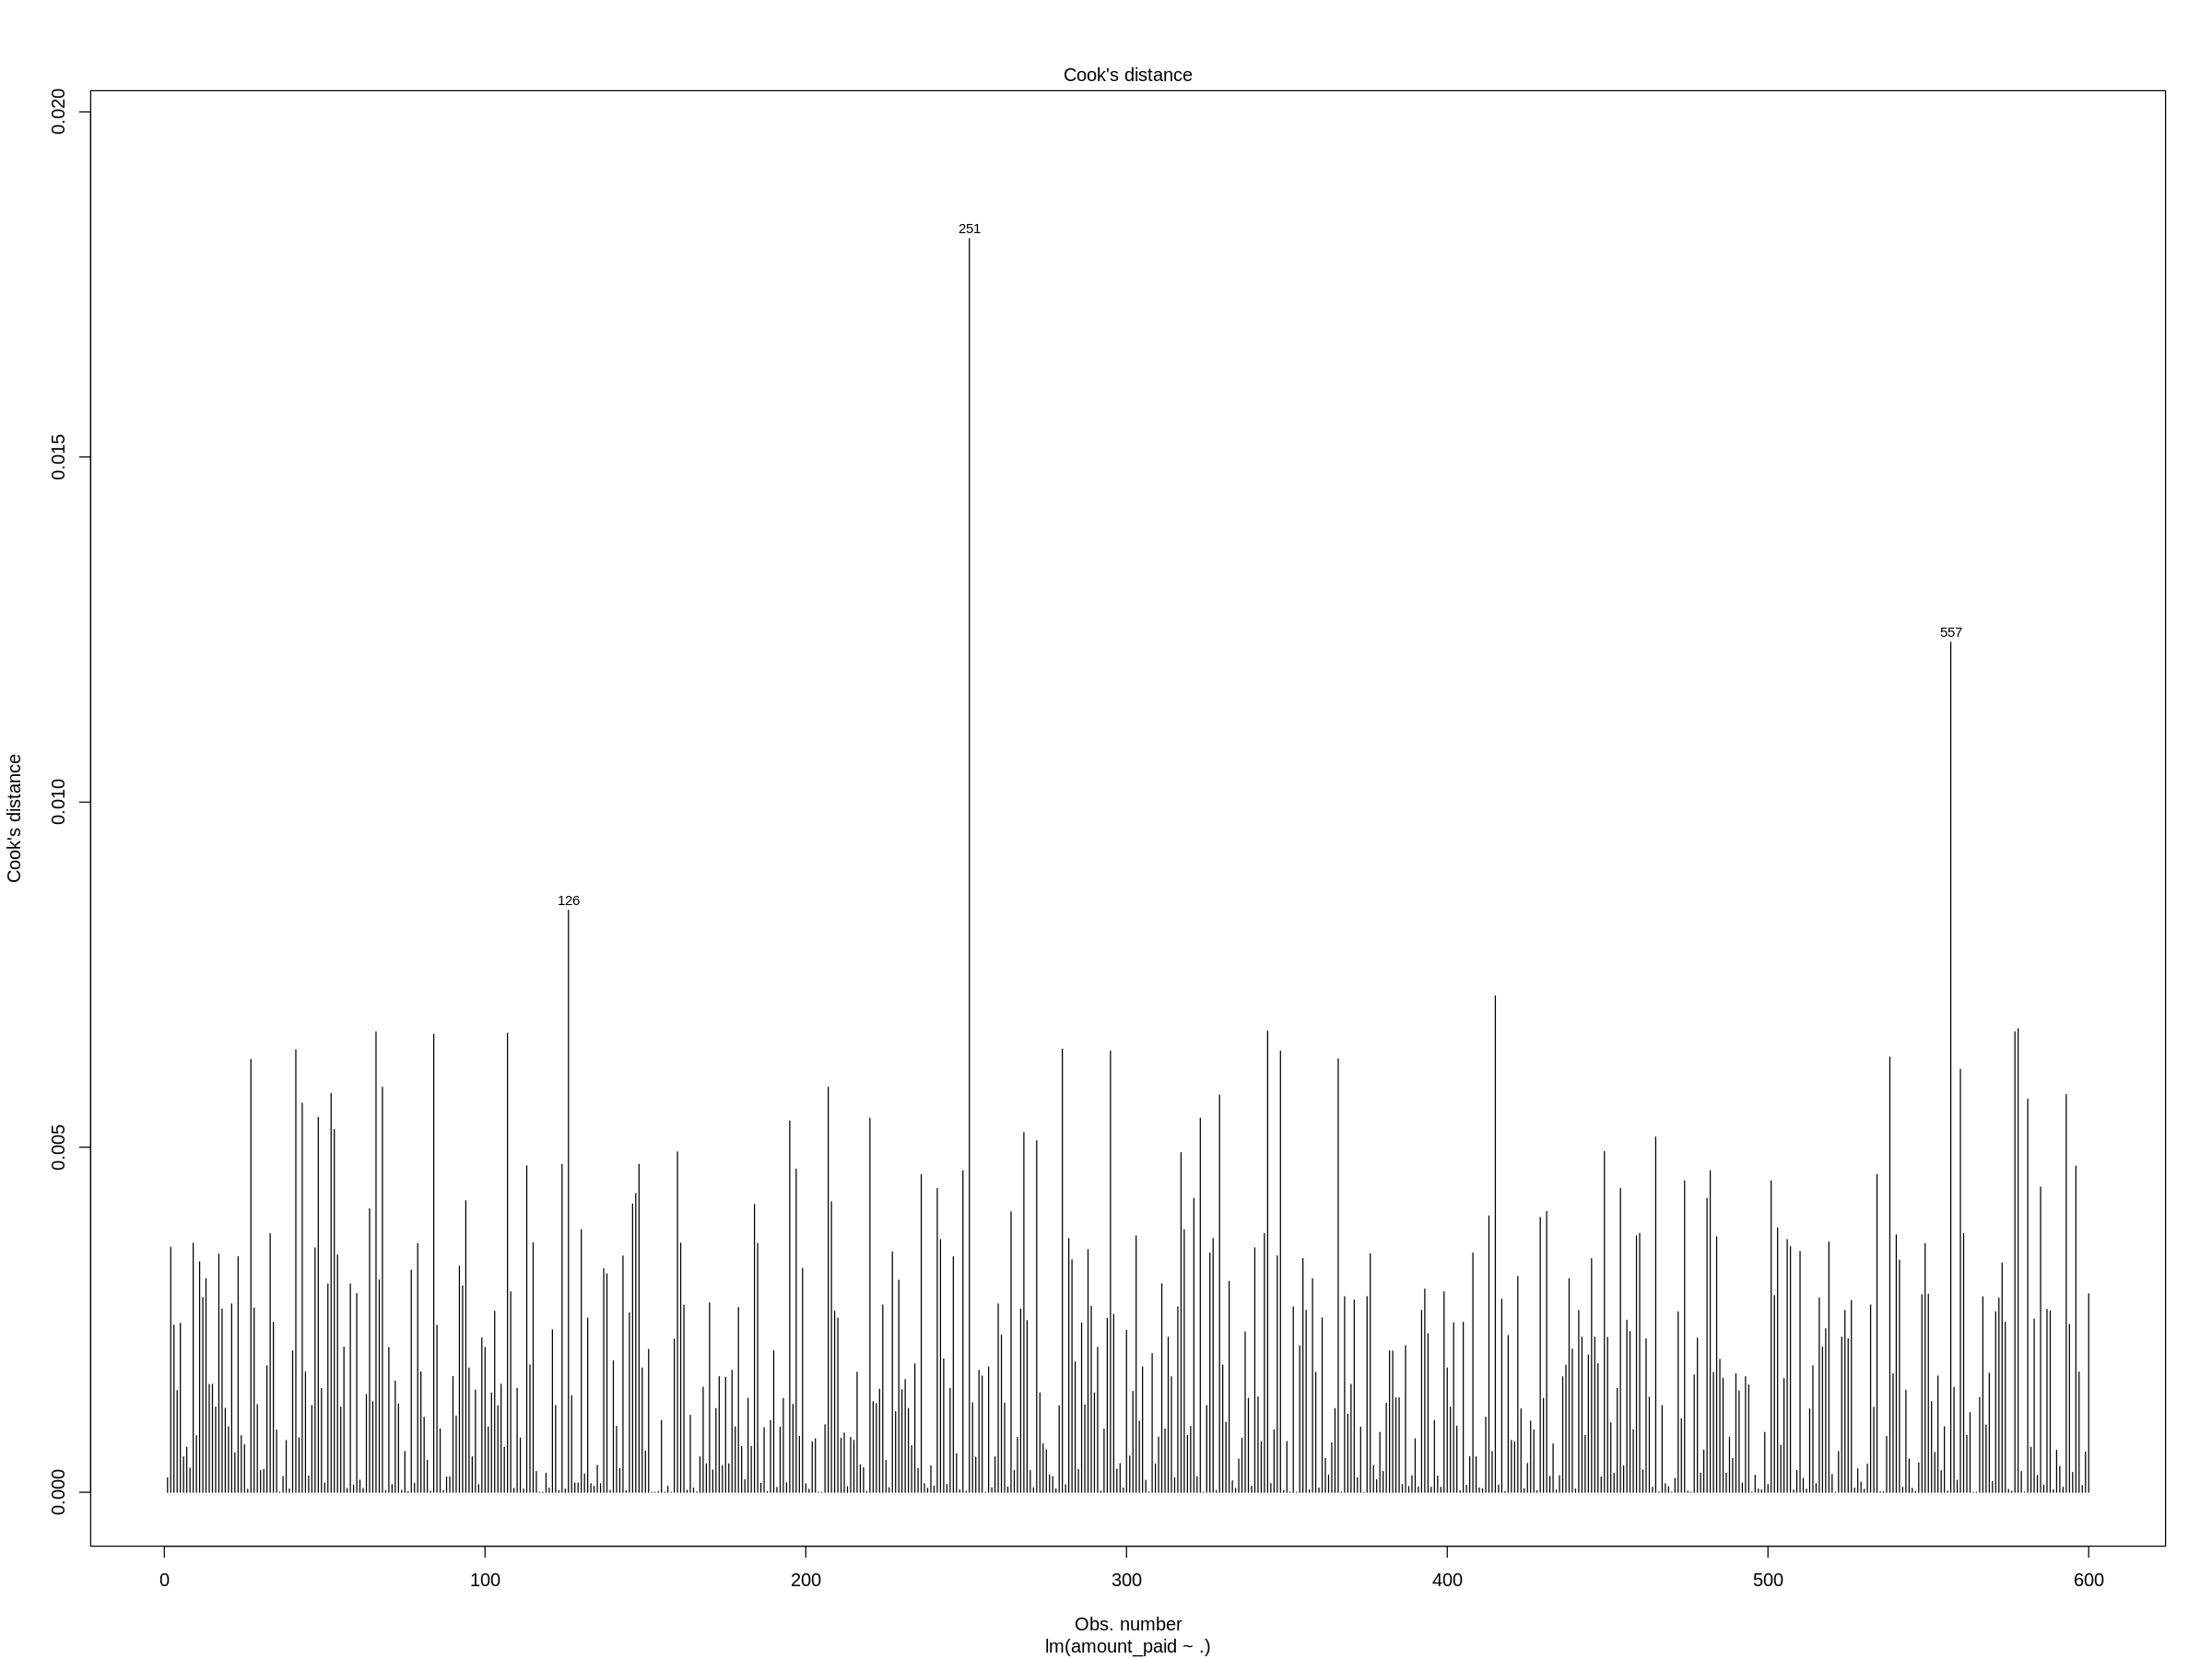

In [196]:
plot(lm_full_model,which = 4)

From the above plot and the diagnostic plots of the full model, we can see that there are 3 outliers in the dataset which have higher Cook's distance compared to the other models. But from the diagnostic plots of the full model, the Cook's distance line is not in the vicinity of the points in the plot at all. Let's use the <a href="http://artax.karlin.mff.cuni.cz/r-help/library/art/html/outlierTest.html"><font color="blue">outlierTest()</font></a> function to do an outlier test. The function will report the Bonferroni p-values for studentized residuals in linear regression models.

In [197]:
outlierTest(lm_full_model, cutoff=0.05, digits = 1)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
251 -2.289409           0.022414           NA

So, we can safely infer that there are no outliers that need to be removed from the dataset.

Influencial Data Points

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
251,-2.289409,0.06220029,0.018164219
295,2.116431,0.02655720,0.006393424
344,1.517053,0.05239207,0.006682098
557,2.109694,0.05023723,0.012317536


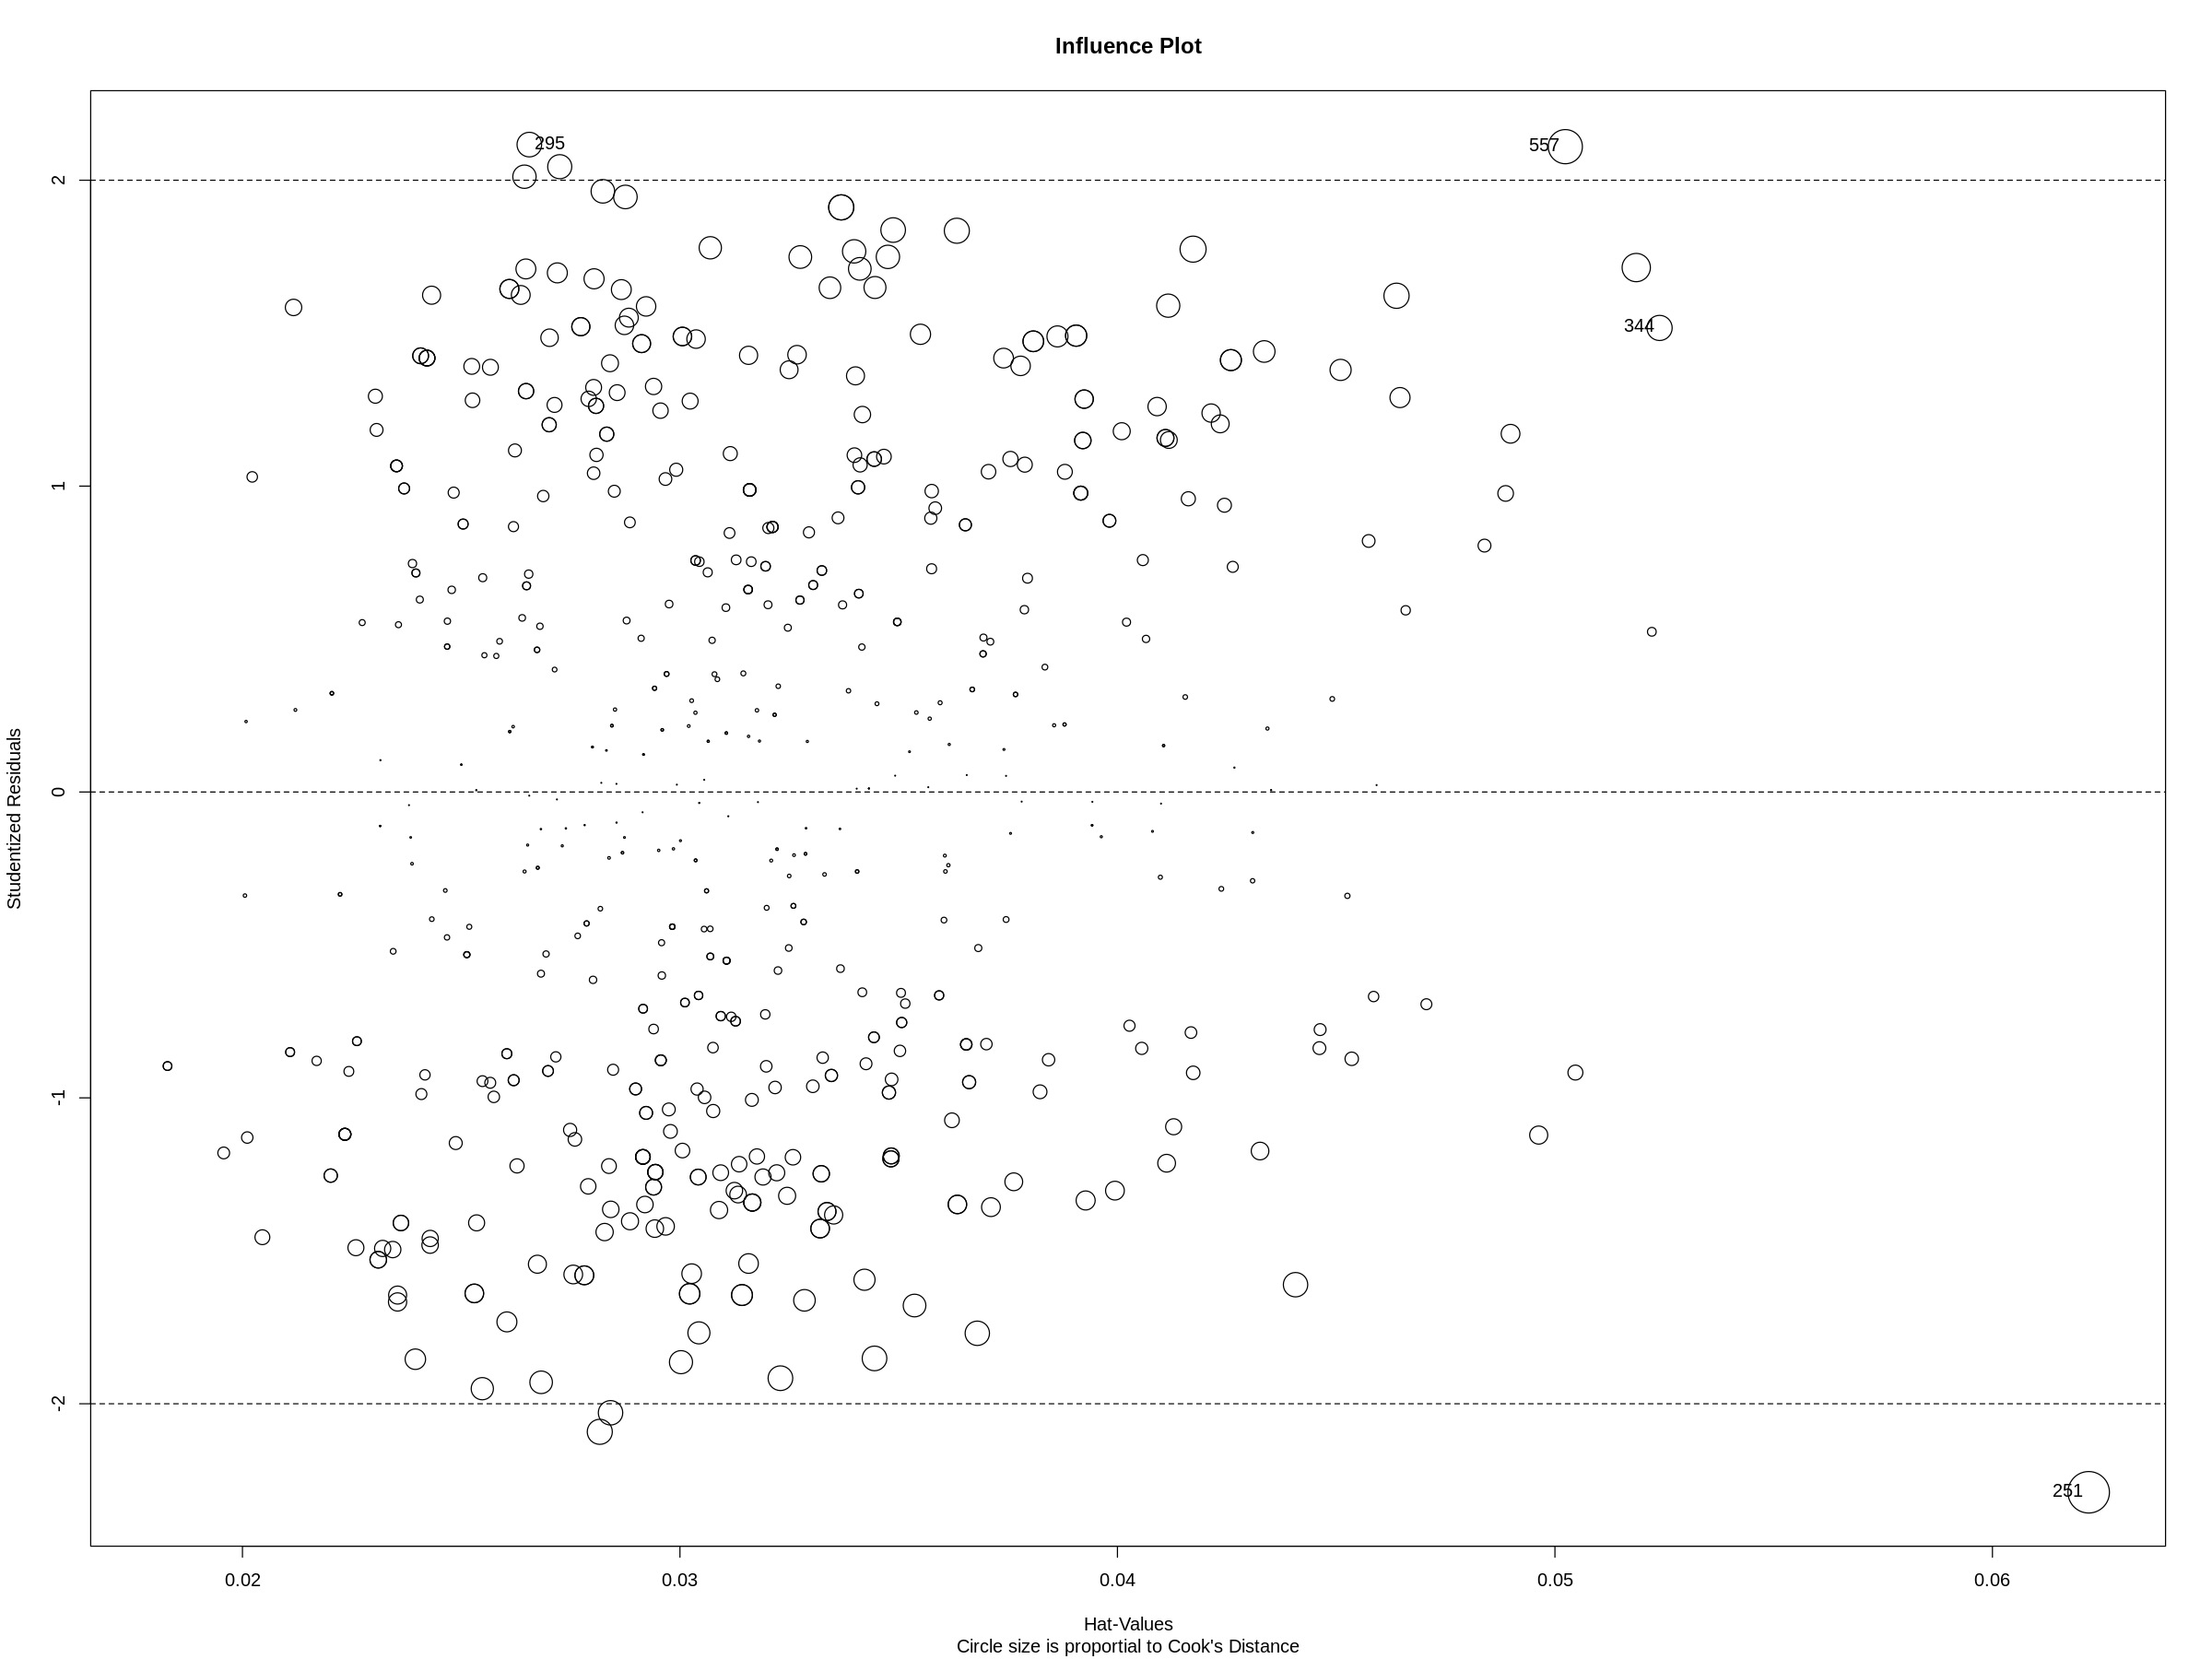

In [198]:
influencePlot(lm_full_model, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

There are 3 points that are influencial data-points in the dataset that affect the regression line. But as the numbers are less than 0.05, these points are not considered to be outliers, so they need not be removed.

#### Predicting the amount_paid for the test data and calculate the errors

In [199]:
# Predicting the amount_paid for the validation dataset and the train dataset
val_pred <- as.data.frame(round(as.double(predict(lm_full_model,val_mod_data)),3))
val_mod_target <- round(val_mod_target,3)

train_pred <- as.data.frame(round(as.double(predict(lm_full_model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [200]:
# Creating a RMSE function to calculate RMSE
rmse_func <- function(data,target){
  error <- data.frame(1:nrow(data))
  for(i in 1:nrow(data)){
    error[i,] <- data[i,] - target[i,]
  }
  rmse_error <- sqrt(colMeans(error**2)/nrow(data))
  return (rmse_error)
}

# Calling the RMSE function
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - Full Model is for validation dataset: "))
rmse_func(val_pred,val_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - Full Model is for training dataset: "))
rmse_func(train_pred,train_mod_target)


The RMSE for the Multiple Linear Regression - Full Model is for validation dataset: 

X1.nrow.data. 
    0.8916155


The RMSE for the Multiple Linear Regression - Full Model is for training dataset: 

X1.nrow.data. 
    0.4309901

The RMSE calculated above seems to be very high. We need to check whether this reduces when we reduce do a Stepwise AIC function.

Performing the stepwise AIC function to identify important features for the model.

In [201]:
# Executing the stepwise function AIC to the lm_full_model
step_full_model <- stepAIC(lm_full_model, trace = 0)
summary(step_full_model)


Call:
lm(formula = amount_paid ~ num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban + 
    month.1 + month.2 + month.3 + month.4 + month.5 + month.6 + 
    month.7 + month.8 + month.9, data = train_mod_val)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.1495 -10.5390   0.0757  10.2684  25.4974 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        24.0166173  3.9102354   6.142 1.51e-09 ***
num_people          1.2140840  0.2853047   4.255 2.43e-05 ***
housearea           0.0084504  0.0036981   2.285  0.02267 *  
is_ac              32.4411958  1.0601768  30.600  < 2e-16 ***
is_tv              14.9160844  1.2798073  11.655  < 2e-16 ***
is_flat            11.7640643  1.0225145  11.505  < 2e-16 ***
ave_monthly_income  0.0005190  0.0001065   4.874 1.41e-06 ***
num_children       18.6461996  0.5437742  34.290  < 2e-16 ***
is_urban           50.2888456  1.0275658  48.940  < 2e-16 ***
mon

Comparing the statistics of the lm_full_model and new_model (Stepwise AIC), the output is rather same with similar p-value and Multiple R squared of 0.88 on both the models.

Checking whether the RMSE for the step function is an improvement.

In [202]:
# Predicting the amount_paid for the test dataset
val_pred_step_full_model <- as.data.frame(round(as.double(predict(step_full_model,val_mod_data)),3))
val_mod_target <- round(val_mod_target,3)

train_pred_step_full_model <- as.data.frame(round(as.double(predict(step_full_model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [203]:
# Calling the RMSE function
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - Step-wise for Full Model for the validation set is: "))
rmse_func(val_pred_step_full_model,val_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - Step-wise for Full Model for the training set is: "))
rmse_func(train_pred_step_full_model,train_mod_target)


The RMSE for the Multiple Linear Regression - Step-wise for Full Model for the validation set is: 

X1.nrow.data. 
    0.8913029


The RMSE for the Multiple Linear Regression - Step-wise for Full Model for the training set is: 

X1.nrow.data. 
    0.4309507

There is no change in RMSE by doing a step-wise model. The significant parameters are found out to be: num_people, house_area, is_ac, is_tv, is_flat, ave_monthly_income, num_children and is_urban. Lets check out a model with only these parameters.

In [204]:
sig_param_model <- lm(amount_paid ~ num_people + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, train_mod_val)
summary(sig_param_model)


Call:
lm(formula = amount_paid ~ num_people + is_ac + is_tv + is_flat + 
    ave_monthly_income + num_children + is_urban, data = train_mod_val)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.4447 -10.3846   0.0734   9.8223  27.1693 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.584e+01  2.483e+00  10.408  < 2e-16 ***
num_people         1.260e+00  2.814e-01   4.476 9.12e-06 ***
is_ac              3.259e+01  1.063e+00  30.667  < 2e-16 ***
is_tv              1.574e+01  1.250e+00  12.595  < 2e-16 ***
is_flat            1.179e+01  1.014e+00  11.627  < 2e-16 ***
ave_monthly_income 5.151e-04  1.060e-04   4.859 1.51e-06 ***
num_children       1.877e+01  5.439e-01  34.510  < 2e-16 ***
is_urban           5.024e+01  1.023e+00  49.136  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 592 degrees of freedom
Multiple R-squared:  0.8854,	Adjusted R-squared:  0.8841 
F-s

The model is not improved in any way. Lets Check the RMSE.

In [205]:
# Predicting the amount_paid for the test dataset
val_pred_sig_param_model <- as.data.frame(round(as.double(predict(sig_param_model,val_mod_data)),3))
val_mod_target <- round(val_mod_target,3)

train_pred_sig_param_model <- as.data.frame(round(as.double(predict(sig_param_model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [206]:
# Calling the RMSE function to calculate the RMSE
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - only significant parameters of the validation set is: "))
rmse_func(val_pred_sig_param_model,val_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - only significant parameters for the training set is: "))
rmse_func(train_pred_sig_param_model,train_mod_target)


The RMSE for the Multiple Linear Regression - only significant parameters of the validation set is: 

X1.nrow.data. 
    0.8996449


The RMSE for the Multiple Linear Regression - only significant parameters for the training set is: 

X1.nrow.data. 
    0.4362717

There is a slight increase in RMSE value. So we have to model with other parameters.



Performing ANOVA to compare the full model and the step full model from stepwise function. 

In [207]:
# Performing anova with Chi-squared test to compare the lm_full_model and the new_model
anova(lm_full_model,step_full_model, test='F')

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,581,87082.60,NA,NA,NA,NA
2,582,87083.66,-1,-1.064724,0.007103655,0.9328603


The p-value is quite large, so we cannot reject the null hypothesis. It is not statistically significant that the difference between the full model and the new model with stepwise function strongly associated with response. In regard to the interpretability of the model, we'd prefer a model with less predictors.

#### Applying the interactions between variables (:) as the additional predictors to the existing prerdictor variables in the linear regression model.

In [208]:
lm_full_ext_model <- lm(amount_paid ~ . + .:., data = train_mod_val)
summary(lm_full_ext_model)


Call:
lm(formula = amount_paid ~ . + .:., data = train_mod_val)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.308  -7.356  -0.262   6.605  32.911 

Coefficients: (55 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -9.050e-01  2.649e+01  -0.034 0.972758    
num_rooms                       -5.323e+00  6.242e+00  -0.853 0.394207    
num_people                       6.353e+00  2.618e+00   2.426 0.015627 *  
housearea                        7.981e-02  2.622e-02   3.044 0.002465 ** 
is_ac                            1.526e+01  1.032e+01   1.479 0.139798    
is_tv                            7.766e+00  1.327e+01   0.585 0.558780    
is_flat                          2.307e+01  1.008e+01   2.289 0.022507 *  
ave_monthly_income               2.625e-04  9.673e-04   0.271 0.786194    
num_children                     2.236e+01  5.423e+00   4.122 4.45e-05 ***
is_urban                         1

From the first look, the model performance has improved compared to the Linear regression full model with actual predictors (lm_full_model). The number of significant variables has also decreased significantly. 

Lets check the RMSE for the above model.

In [209]:
# Predicting the amount_paid for the test dataset
val_pred_ext_model <- as.data.frame(round(as.double(predict(lm_full_ext_model,val_mod_data)),3))
val_mod_target <- round(val_mod_target,3)

train_pred_ext_model <- as.data.frame(round(as.double(predict(lm_full_ext_model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [210]:
# Calling the RMSE function to calculate the RMSE
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - extended predictors - of the validation set is: "))
rmse_func(val_pred_ext_model,val_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - extended predictors - for the training set is: "))
rmse_func(train_pred_ext_model,train_mod_target)


The RMSE for the Multiple Linear Regression - extended predictors - of the validation set is: 

X1.nrow.data. 
    0.9399805


The RMSE for the Multiple Linear Regression - extended predictors - for the training set is: 

X1.nrow.data. 
    0.3838692

In the above model, the Training error has reduced from 0.43 to 0.38, but it only helps in more overfitting as the testing error has increased from 0.86 to 0.94. So, we need to lessen the number of predictors to generalize the training model. This will not solve the issue completely. But, One step at a time.


Now we will apply the step function to these predictors to arrive at the most significant features.

In [211]:
# Executing the stepwise function AIC to the lm_full_model
new_ext_model <- stepAIC(lm_full_ext_model, trace = 0)
summary(new_ext_model)


Call:
lm(formula = amount_paid ~ num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month.1 + month.2 + month.3 + month.4 + month.5 + 
    month.6 + month.7 + month.8 + month.9 + num_rooms:is_tv + 
    num_rooms:ave_monthly_income + num_rooms:is_urban + num_rooms:month.3 + 
    num_rooms:month.4 + num_rooms:month.5 + num_rooms:month.7 + 
    num_people:housearea + num_people:is_flat + num_people:ave_monthly_income + 
    num_people:is_urban + num_people:month.2 + num_people:month.5 + 
    num_people:month.9 + housearea:is_flat + housearea:ave_monthly_income + 
    housearea:num_children + housearea:is_urban + housearea:month.4 + 
    housearea:month.5 + housearea:month.7 + housearea:month.8 + 
    is_ac:is_tv + is_ac:is_flat + is_ac:ave_monthly_income + 
    is_ac:num_children + is_ac:is_urban + is_ac:month.1 + is_ac:month.3 + 
    is_ac:month.4 + is_ac:month.5 + is_ac:month.6 + is_ac:month.7 + 
    is_ac:month.9 + i

From the above statistics of the stepwise function, the Adjusted R squared has decresed but the Multiple R squared has increased compared to the previous full model. The residual standard error has reduced slightly and the significant features have increased. The features with high significance to the target variable is found out to be 'is_ac', 'is_flat', 'num_children', 'is_urban', and the interaction between 'housearea' and 'num_children'.

In [212]:
# Predicting the amount_paid for the test dataset
val_pred_new_ext_model <- as.data.frame(round(as.double(predict(new_ext_model,val_mod_data)),3))
val_mod_target <- round(val_mod_target,3)

train_pred_new_ext_model <- as.data.frame(round(as.double(predict(new_ext_model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [213]:
# Calling the RMSE function to calculate the RMSE
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - extended predictors - of the validation set is: "))
rmse_func(val_pred_new_ext_model,val_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression - extended predictors - for the training set is: "))
rmse_func(train_pred_new_ext_model,train_mod_target)


The RMSE for the Multiple Linear Regression - extended predictors - of the validation set is: 

X1.nrow.data. 
    0.9280505


The RMSE for the Multiple Linear Regression - extended predictors - for the training set is: 

X1.nrow.data. 
    0.3890194

The RMSE error has increased. We have to now execute a Cross-Validation technique. on the best from the above models. 

lm_full_model has the best model so far with:

R-squared = 0.88

Adjusted R-Squared = 0.88

Training RMSE = 0.43

Testing RMSE = 0.89

### Create a Cross-Validation Function to stabilize the RMSE.

In [214]:
# Setting seed
set.seed(1234)

# Defining Train control as Cross-validation and value of K equal to 10
train_control <- trainControl(method = "cv", number = 10)

# Training the model by assigning sales column as targetvariable and rest other column as independant variable
model <- train(amount_paid ~ ., data = train_mod, method = "lm", trControl = train_control)
summary(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.945 -10.453   0.228   9.630  24.523 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.262e+01  3.719e+00   6.084 1.84e-09 ***
num_rooms           3.738e-01  5.183e-01   0.721  0.47097    
num_people          1.167e+00  2.526e-01   4.618 4.52e-06 ***
housearea           1.000e-02  3.216e-03   3.110  0.00194 ** 
is_ac               3.134e+01  9.201e-01  34.061  < 2e-16 ***
is_tv               1.519e+01  1.096e+00  13.866  < 2e-16 ***
is_flat             1.194e+01  8.876e-01  13.449  < 2e-16 ***
ave_monthly_income  4.596e-04  9.238e-05   4.976 8.00e-07 ***
num_children        1.858e+01  4.789e-01  38.801  < 2e-16 ***
is_urban            5.068e+01  8.913e-01  56.861  < 2e-16 ***
month.1            -3.147e+00  2.003e+00  -1.571  0.11656    
month.2            -3.419e+00  1.816e+00  -1.882  0.06017 . 

In [215]:
print(model)

Linear Regression 

800 samples
 19 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 722, 720, 720, 720, 720, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  12.45156  0.8796276  10.53845

Tuning parameter 'intercept' was held constant at a value of TRUE


In [216]:
# Predicting the amount_paid for the test dataset
val_pred_cv_model <- as.data.frame(round(as.double(predict(model,val_mod_data)),3))
val_mod_target <- round(val_mod_target,3)

train_pred_cv_model <- as.data.frame(round(as.double(predict(model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [217]:
# Calling the RMSE function to calculate the RMSE
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression of the validation set is: "))
rmse_func(val_pred_cv_model,val_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression for the training set is: "))
rmse_func(train_pred_cv_model,train_mod_target)


The RMSE for the Multiple Linear Regression of the validation set is: 

X1.nrow.data. 
    0.8713401


The RMSE for the Multiple Linear Regression for the training set is: 

X1.nrow.data. 
    0.4295348

This is the best model that we can build with Linear Regression. Now we'll use this model to predict the "amount_paid" from the test data.

In [218]:
# Predicting the amount_paid for the validation dataset and the train dataset
test_pred <- as.data.frame(round(as.double(predict(model,test_mod)),3))
test_mod_target <- round(df_test_target,3)

train_pred <- as.data.frame(round(as.double(predict(model,train_mod_data)),3))
train_mod_target <- round(train_mod_target,3)

In [219]:
# Calling the RMSE function to calculate the RMSE
cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression of the TESTING set is: "))
rmse_func(test_pred,test_mod_target)

cat(crayon::bold("\nThe RMSE for the Multiple Linear Regression for the TRAINING set is: "))
rmse_func(train_pred_cv_model,train_mod_target)


The RMSE for the Multiple Linear Regression of the TESTING set is: 

X1.nrow.data. 
    0.8690203


The RMSE for the Multiple Linear Regression for the TRAINING set is: 

X1.nrow.data. 
    0.4295348

### Step 3: Model development for Random Forests

As the Random Forest Machine Learning model does not work well with One-Hot Encoding of categorical variables, the variables 'is_tv', 'is_ac', 'is_flat', 'is_urban' and 'month' will be converted into factors.

Now we need to tune the hyper parameters to feed to the model.

### Tuning the hyper-parameters by Grid Search
The Random Forest function in R takes multiple parameters. 

**We will focus on parameters like:**

**data**
an optional data frame containing the variables in the model. By default the variables are taken from the 
environment which randomForest is called from.

**ntree**
Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted 
at least a few times.

**x, formula**
a data frame or a matrix of predictors, or a formula describing the model to be fitted (for the print method, an               randomForest object).

**y**
A response vector. If a factor, classification is assumed, otherwise regression is assumed. If omitted, randomForest will run in unsupervised mode.

**mtry**
Number of variables randomly sampled as candidates at each split. Note that the default values are different for 
classification (sqrt(p) where p is number of variables in x) and regression (p/3)

**sampsize**
Size(s) of sample to draw. For classification, if sampsize is a vector of the length the number of strata, then sampling is stratified by strata, and the elements of sampsize indicate the numbers to be drawn from the strata.

**nodesize**
Minimum size of terminal nodes. Setting this number larger causes smaller trees to be grown (and thus take less time). Note that the default values are different for classification (1) and regression (5).

**subset**
an index vector indicating which rows should be used. (NOTE: If given, this argument must be named.)

**replace**
Should sampling of cases be done with or without replacement?

**maxnodes**
Maximum number of terminal nodes trees in the forest can have. If not given, trees are grown to the maximum possible (subject to limits by nodesize). If set larger than maximum possible, a warning is issued.

**importance**
Should importance of predictors be assessed?


**The rest of the parameters that are not used in this experiment are:**

**na.action**
A function to specify the action to be taken if NAs are found. (NOTE: If given, this argument must be named.)

**xtest**
a data frame or matrix (like x) containing predictors for the test set.

**ytest**
response for the test set.

**weights**
A vector of length same as y that are positive weights used only in sampling data to grow each tree (not used in any other calculation)

**localImp**
Should casewise importance measure be computed? (Setting this to TRUE will override importance.)

**nPerm**
Number of times the OOB data are permuted per tree for assessing variable importance. Number larger than 1 gives slightly more stable estimate, but not very effective. Currently only implemented for regression.

**proximity**
Should proximity measure among the rows be calculated?

**oob.prox**
Should proximity be calculated only on `out-of-bag` data?

**norm.votes**
If TRUE (default), the final result of votes are expressed as fractions. If FALSE, raw vote counts are returned (useful for combining results from different runs). Ignored for regression.

**do.trace**
If set to TRUE, give a more verbose output as randomForest is run. If set to some integer, then running output is printed for every do.trace trees.

**keep.forest**
If set to FALSE, the forest will not be retained in the output object. If xtest is given, defaults to FALSE.

**corr.bias**
perform bias correction for regression? Note: Experimental. Use at your own risk.

**keep.inbag**
Should an n by ntree matrix be returned that keeps track of which samples are `in-bag` in which trees (but not how many times, if sampling with replacement)

Source: R Documentation. URL: https://www.rdocumentation.org/packages/randomForest/versions/4.7-1/topics/randomForest

To perform the grid search, first we want to construct our grid of hyperparameters. We’re going to search across 192 different models with varying mtry, minimum node size, and sample size.
Source: URL: https://uc-r.github.io/random_forests

In [220]:
# Changing the categorical values from Double to String in the training dataset
df_train$is_ac <- ifelse(df_train$is_ac == 1, 'Yes', 'No')
df_train$is_tv <- ifelse(df_train$is_tv == 1, 'Yes', 'No')
df_train$is_flat <- ifelse(df_train$is_flat == 1, 'Yes', 'No')
df_train$is_urban <- ifelse(df_train$is_urban == 1, 'Yes', 'No')

# Changing the categorical values from Double to String in the testing dataset
df_test_data$is_ac <- ifelse(df_test_data$is_ac == 1, 'Yes', 'No')
df_test_data$is_tv <- ifelse(df_test_data$is_tv == 1, 'Yes', 'No')
df_test_data$is_flat <- ifelse(df_test_data$is_flat == 1, 'Yes', 'No')
df_test_data$is_urban <- ifelse(df_test_data$is_urban == 1, 'Yes', 'No')

In [221]:
head(df_train_data)

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,701.89,0,1,1,16448.39,0,0,3
3,5,1175.71,1,1,1,20081.92,0,1,9
1,3,811.09,0,1,1,18199.03,1,0,10
3,5,486.17,0,1,0,9439.84,0,0,2
2,4,511.18,0,0,1,12366.32,0,1,7
2,6,925.72,0,1,0,15360.92,0,0,10


In [222]:
head(df_train)

num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<dbl>
1,6,701.89,No,Yes,Yes,16448.39,0,No,3,73.2025
3,5,1175.71,Yes,Yes,Yes,20081.92,0,Yes,9,170.1235
1,3,811.09,No,Yes,Yes,18199.03,1,No,10,104.5671
3,5,486.17,No,Yes,No,9439.84,0,No,2,39.7031
2,4,511.18,No,No,Yes,12366.32,0,Yes,7,82.5938
2,6,925.72,No,Yes,No,15360.92,0,No,10,69.6282


In [223]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  mtry = seq(2, 7, by = 1),
  ntree = c(500,1000),
  node_size  = seq(2, 9, by = 2),
  sampe_size = c(.55, .632, .70, .80),
  OOB_RMSE   = 0
)

In [224]:
# Number of Combinations
nrow(hyper_grid)

[1] 192

In [225]:
head(hyper_grid)

,mtry,ntree,node_size,sampe_size,OOB_RMSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,500,2,0.55,0
2,3,500,2,0.55,0
3,4,500,2,0.55,0
4,5,500,2,0.55,0
5,6,500,2,0.55,0
6,7,500,2,0.55,0


To perform the grid search, first we want to construct our grid of hyperparameters. We’re going to search across 192 different models with varying mtry, minimum node size, and sample size. Source: URL: https://uc-r.github.io/random_forests

Let’s create a baseline for comparison by using the recommend defaults for each parameter and mtry=floor(sqrt(ncol(x))).

In [226]:
# Iterating thro different combinations of hyper-grid dataframe
for(i in 1:nrow(hyper_grid)) {
  
  # Use the Ranger Function to train model with different combinations
  model <- ranger(
    formula         = amount_paid ~ ., 
    data            = df_train, 
    num.trees       = hyper_grid$ntree[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    seed            = 123
  )
  
  # Add OOB error to grid
  hyper_grid$OOB_RMSE[i] <- sqrt(model$prediction.error)
}

hyper_grid %>% 
  dplyr::arrange(OOB_RMSE) %>%
  head(10)

,mtry,ntree,node_size,sampe_size,OOB_RMSE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,1000,2,0.8,10.89520
2,7,1000,2,0.8,10.91813
3,6,500,2,0.8,10.93996
4,7,500,2,0.8,10.95787
5,5,1000,2,0.8,10.97638
6,5,500,2,0.8,10.98218
7,6,1000,4,0.8,11.02561
8,6,1000,2,0.7,11.04730
9,6,500,2,0.7,11.06278


Training the dataset using the Random Forest ML Model

In [227]:
# Building the final random forest model based on the top hyper parameters from the hypergrid calculated above
fin.model <- randomForest(amount_paid ~ ., data = df_train, mtry = 6,
                          ntree = 1000, node_size = 2, sampe_size = 0.8, importance = TRUE)

Predicting the data in the test dataset directly.

In [228]:
# Predicting the amount_paid for the validation dataset and the train dataset
test_pred <- as.data.frame(round(as.double(predict(fin.model,df_test_data)),3))
test_target <- round(df_test_target,3)

train_pred <- as.data.frame(round(as.double(predict(fin.model,df_train[,1:10])),3))
train_target <- round(df_train_target,3)

In [229]:
# Calling the RMSE function to calculate the RMSE
cat(crayon::bold("\nThe RMSE for the RandomForest Regression of the TESTING set is: "))
rmse_func(test_pred,test_target)

cat(crayon::bold("\nThe RMSE for the RandomForest Regression for the TRAINING set is: "))
rmse_func(train_pred,train_target)


The RMSE for the RandomForest Regression of the TESTING set is: 

X1.nrow.data. 
    0.6563577


The RMSE for the RandomForest Regression for the TRAINING set is: 

X1.nrow.data. 
    0.1725635

## 5. Results and discussion <a class="anchor" id="sec_6"></a>

__The RMSE values of Multiple Linear Regression modelled with Cross-Validation:__

_Test set: 0.865510604527755_

_Train set: 0.430359205500911_

__The RMSE values of Random Forest - Regression:__

_Test set: 0.656357704342685_

_Train set: 0.172563504714569_

## 6. Conclusion<a class="anchor" id="sec_7"></a>

The above results clearly proves that the RandomForest outperforms over the Linear Regression with Cross-validation. This is because of the fact that Random Forests are an ensemble of Decision trees and Decision trees works much better with a dataset having a combination of categorical and continuous variables/predictors. Decision trees have a problem of overfitting, but a Random forest will have a generalized fit reducing both the training and testing errors.

## 7. References <a class="anchor" id="sec_8"></a>

[1] 'StackOverFlow'. URL: https://stackoverflow.com/

[2] 'FIT5149 - Tutorials - Week 1, Week 2, Week 3, Week 4' Jupyter Notebooks

[3] 'FIT5197 - Tutorials & Assignments of Student ID:32374089 (Self)

[4] 'R Documentation'. URL: https://rdocumentation.org/